Linear Regression(1 Feature)

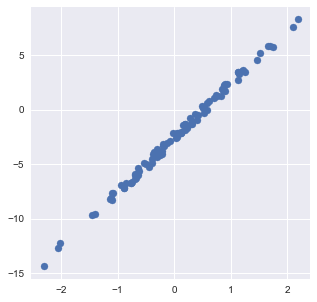

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use('seaborn')

# set params
N=100
lr=0.01
t_w, t_b= 5, -3
w, b = np.random.uniform(-3, 3, 2)

# generate dataset
x_data = np.random.randn(N, )
y_data = x_data*t_w + t_b

# noise
y_data += 0.9*np.random.rand(N, )

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x_data, y_data)

Linear Regression (n features)

<ipython-input-24-c2f649af9f19>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 1, figsize=(20, 10))


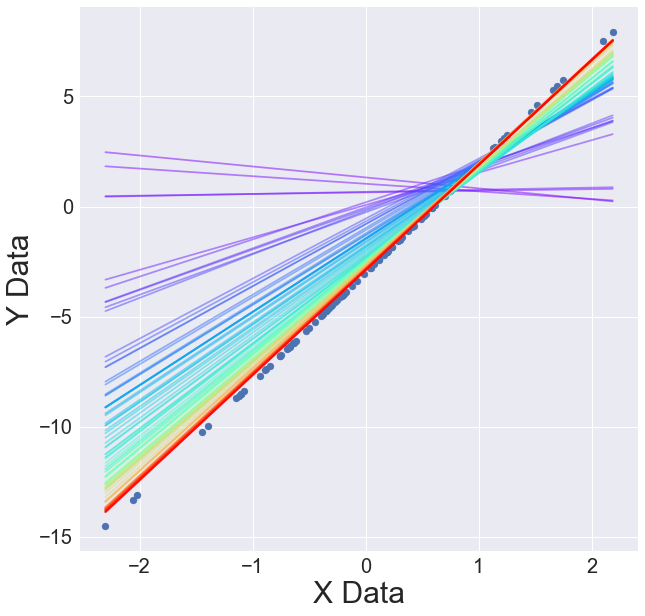

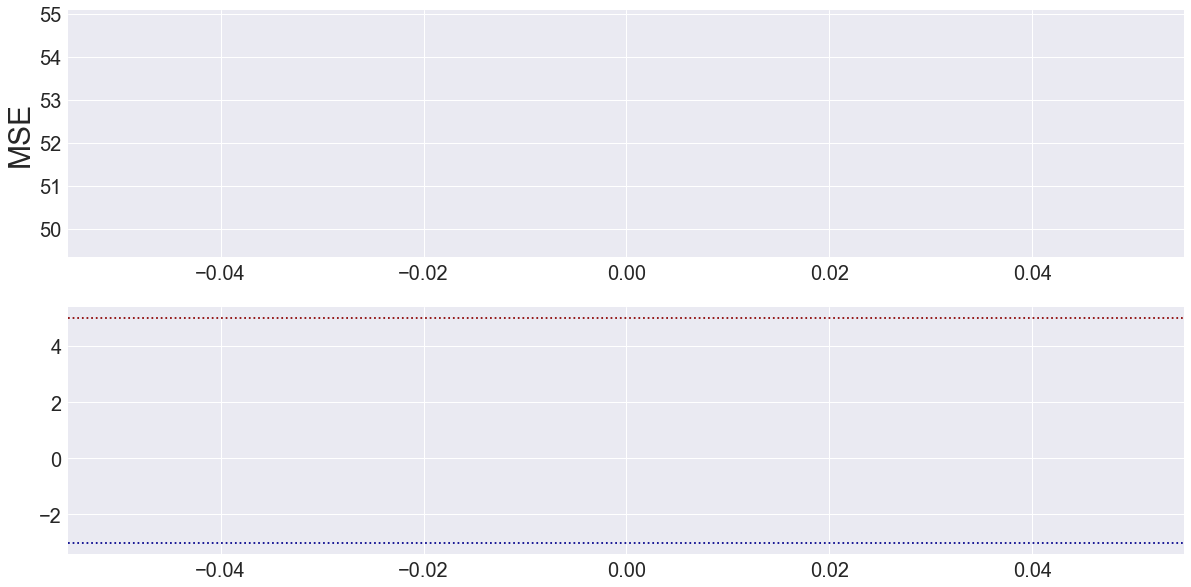

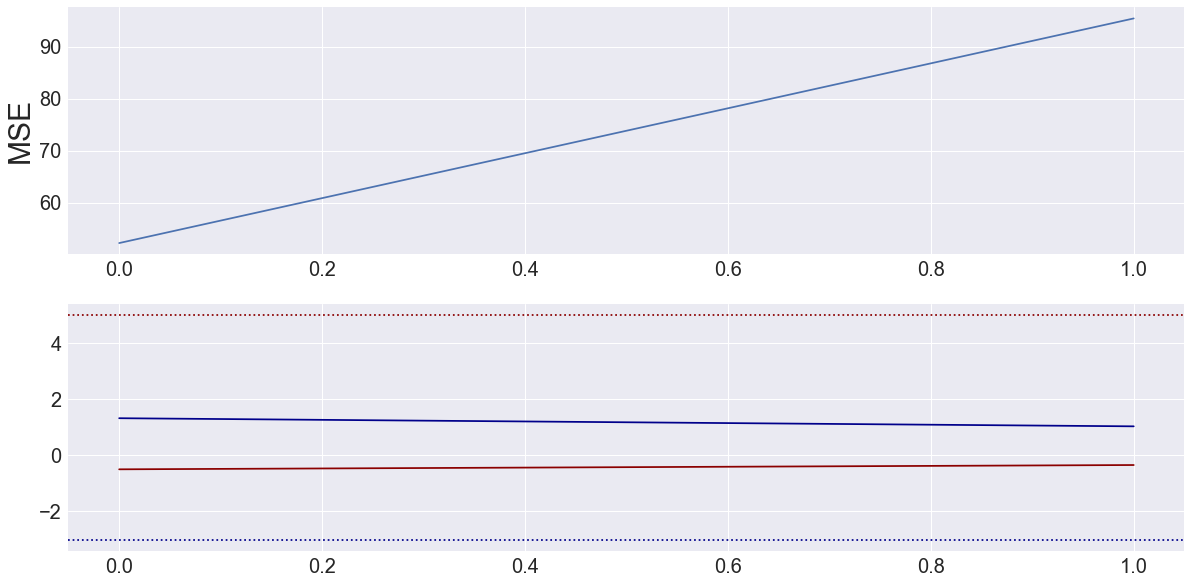

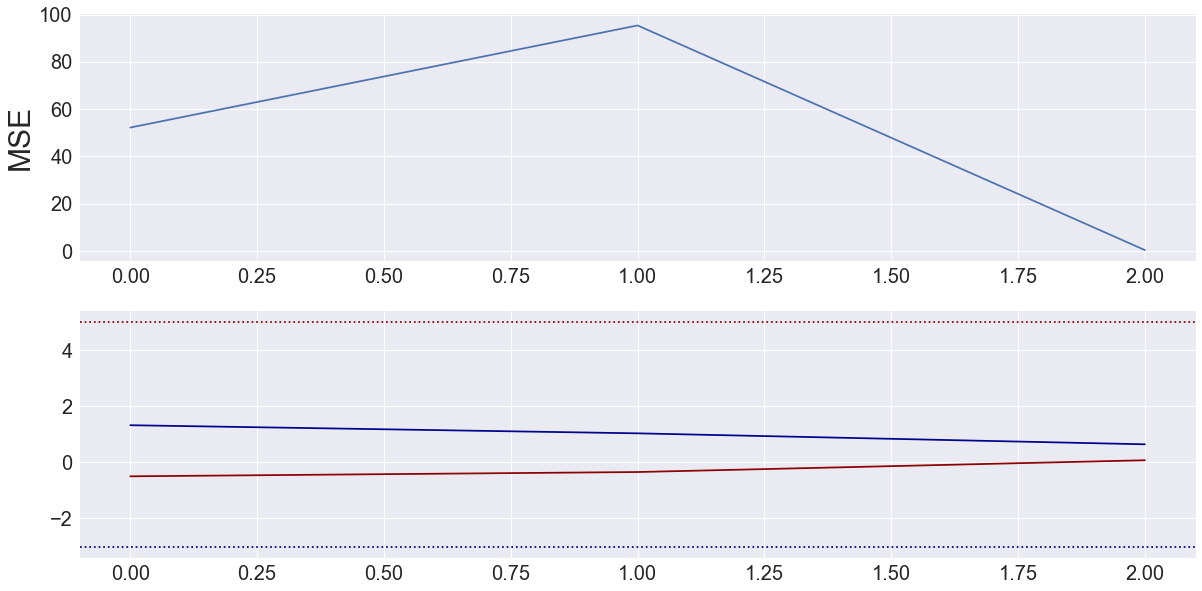

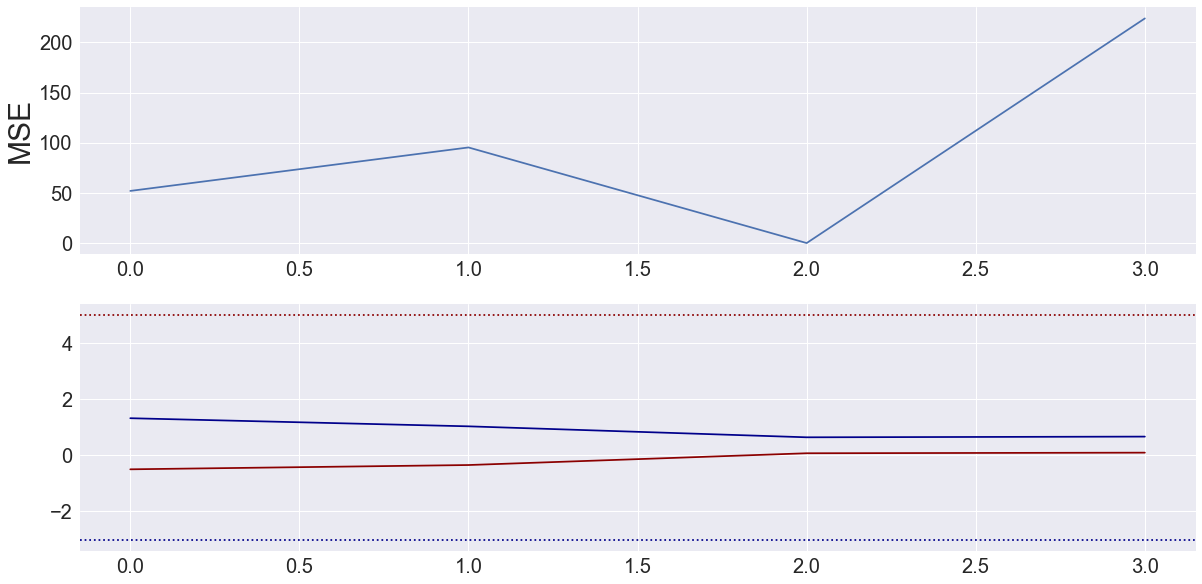

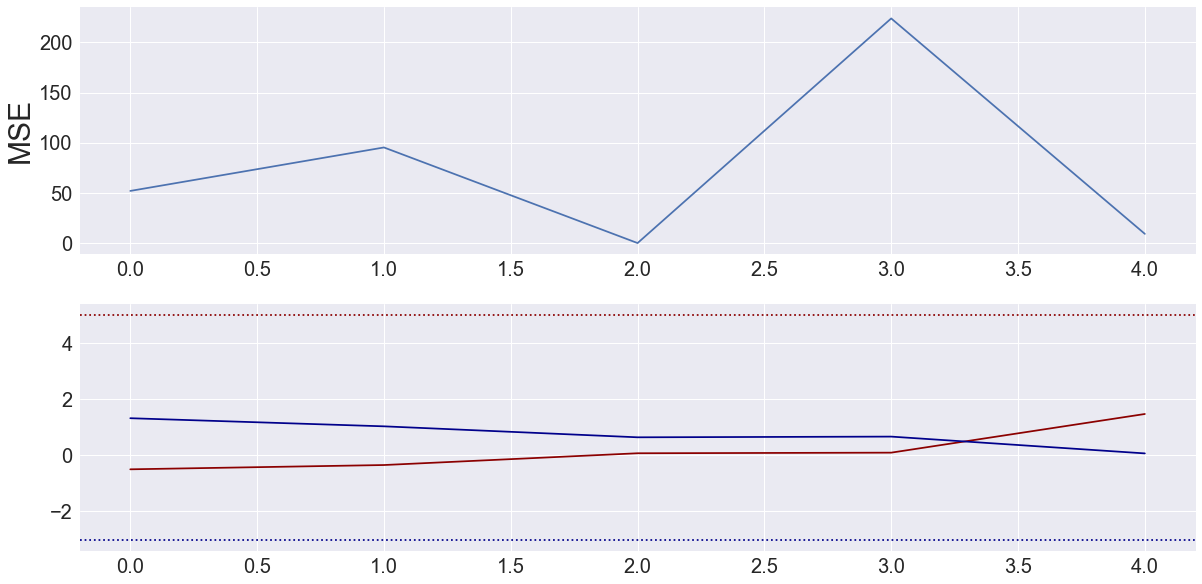

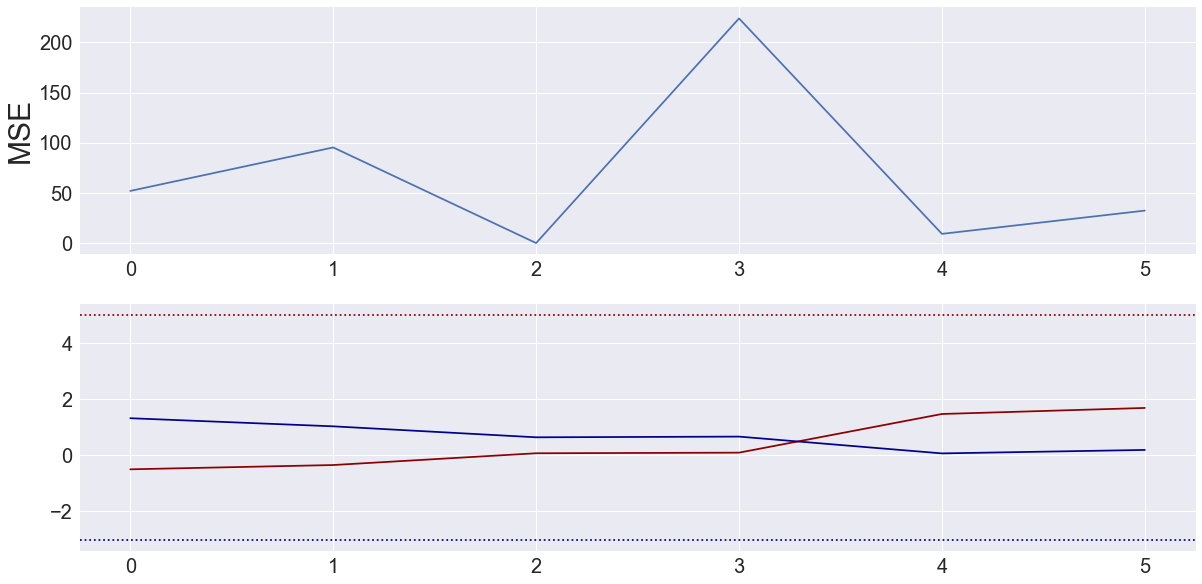

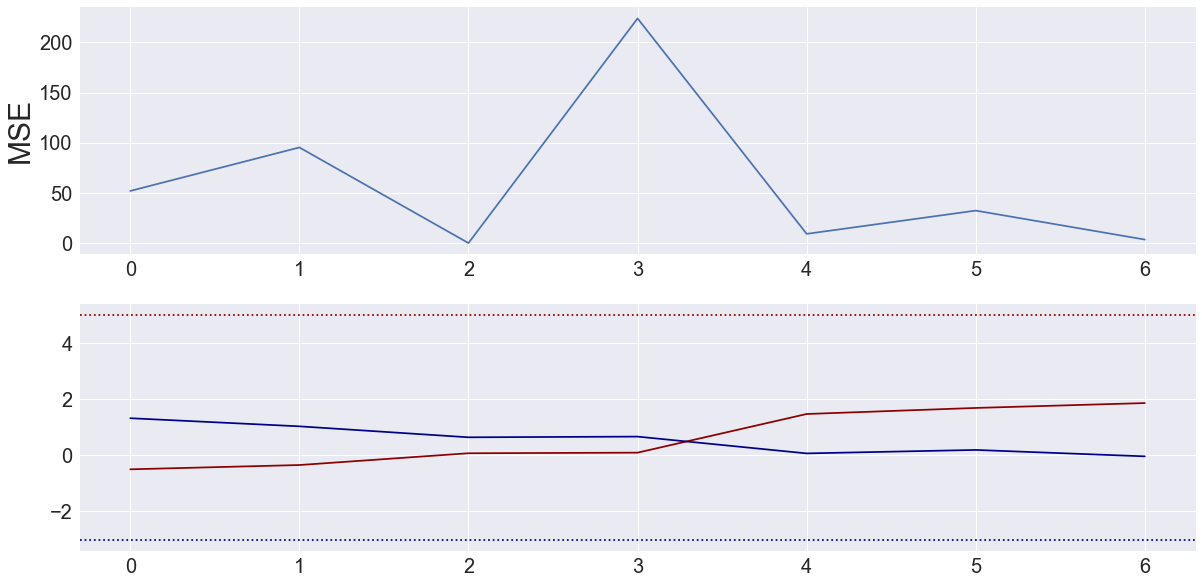

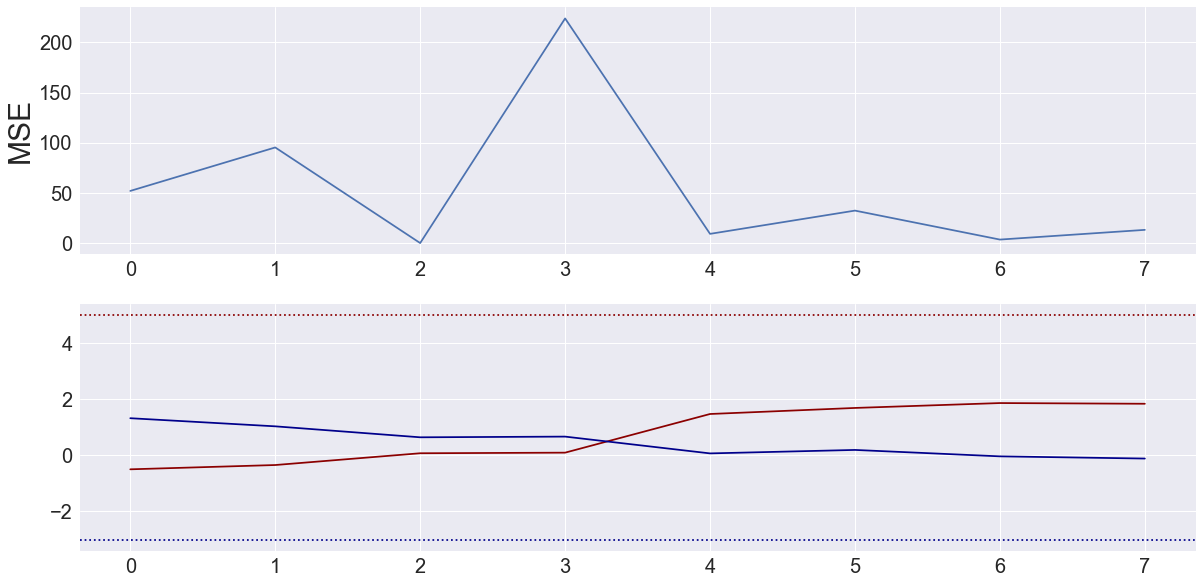

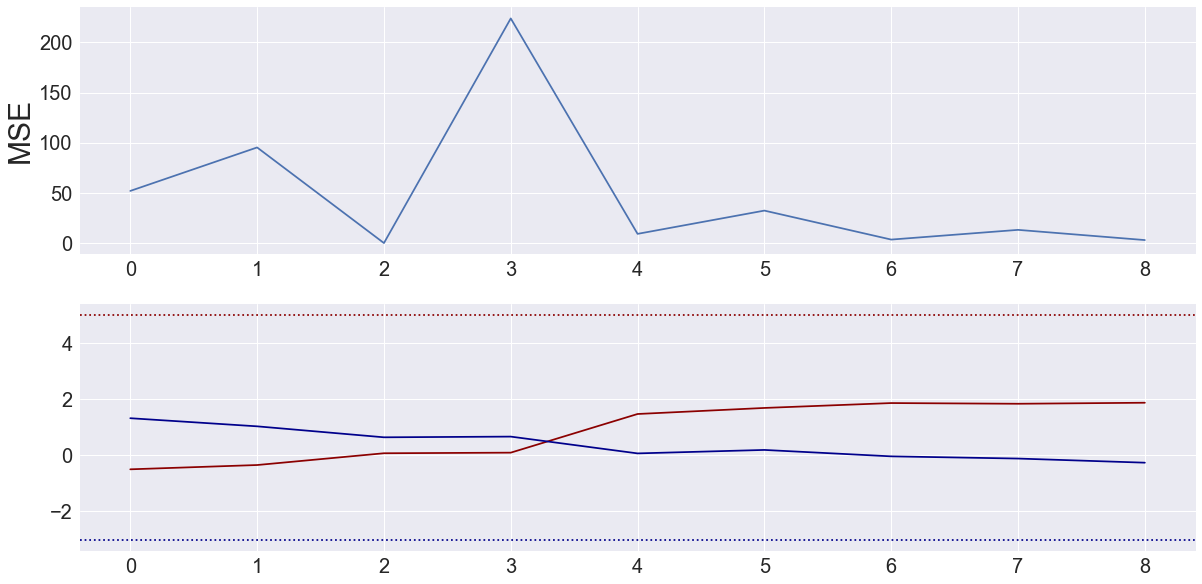

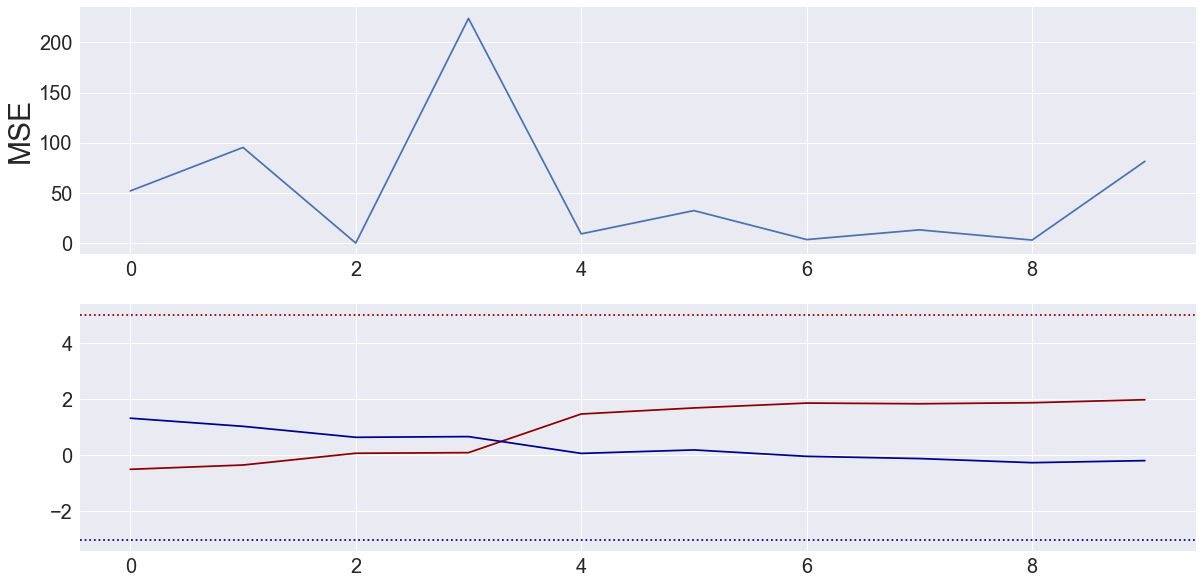

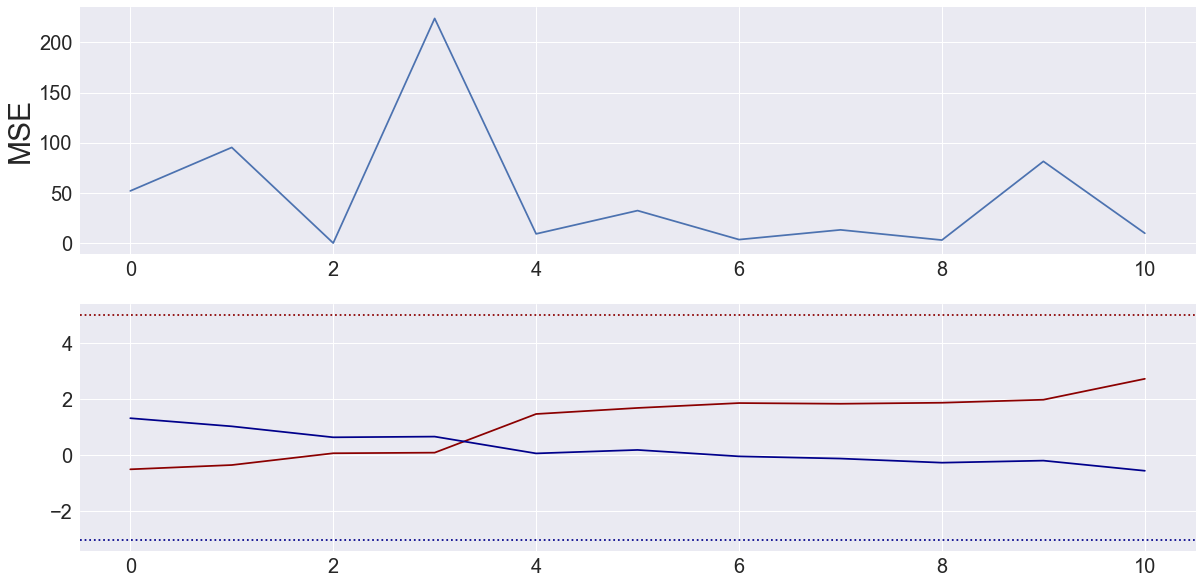

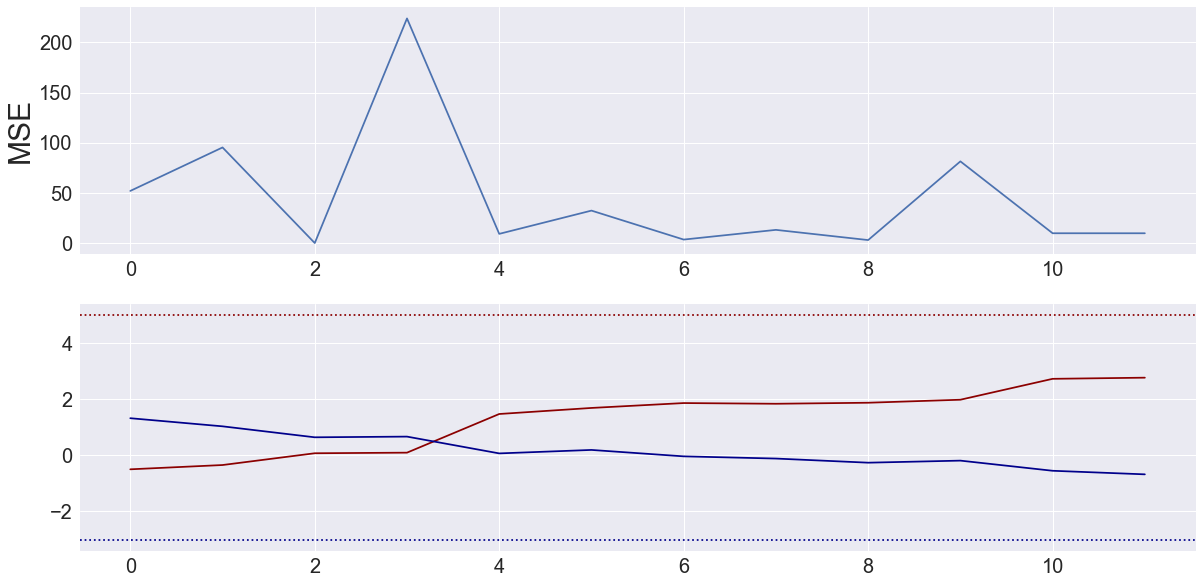

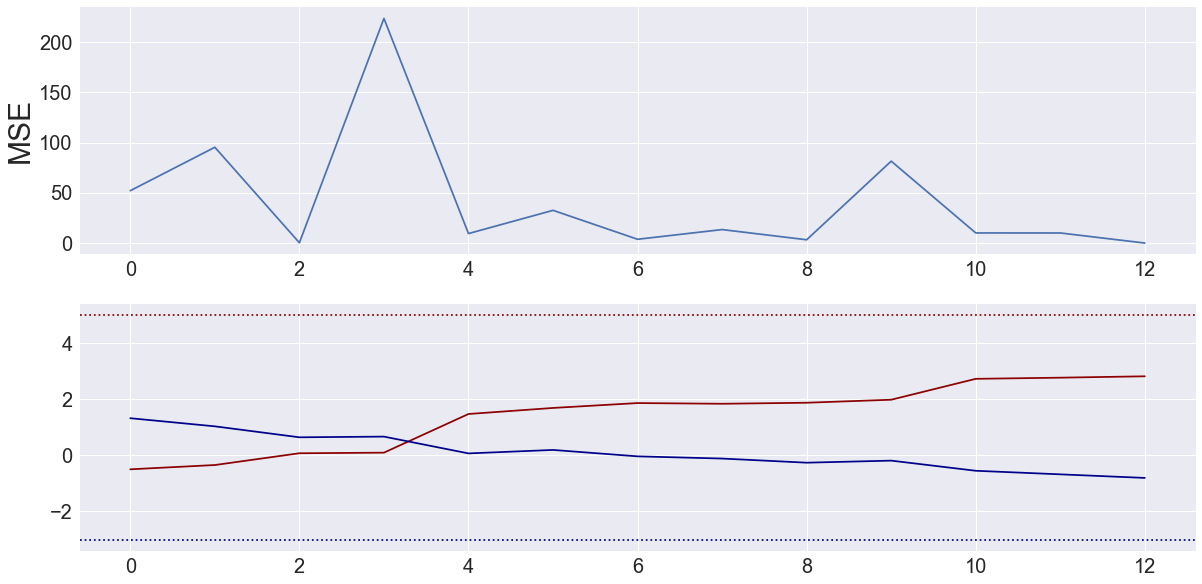

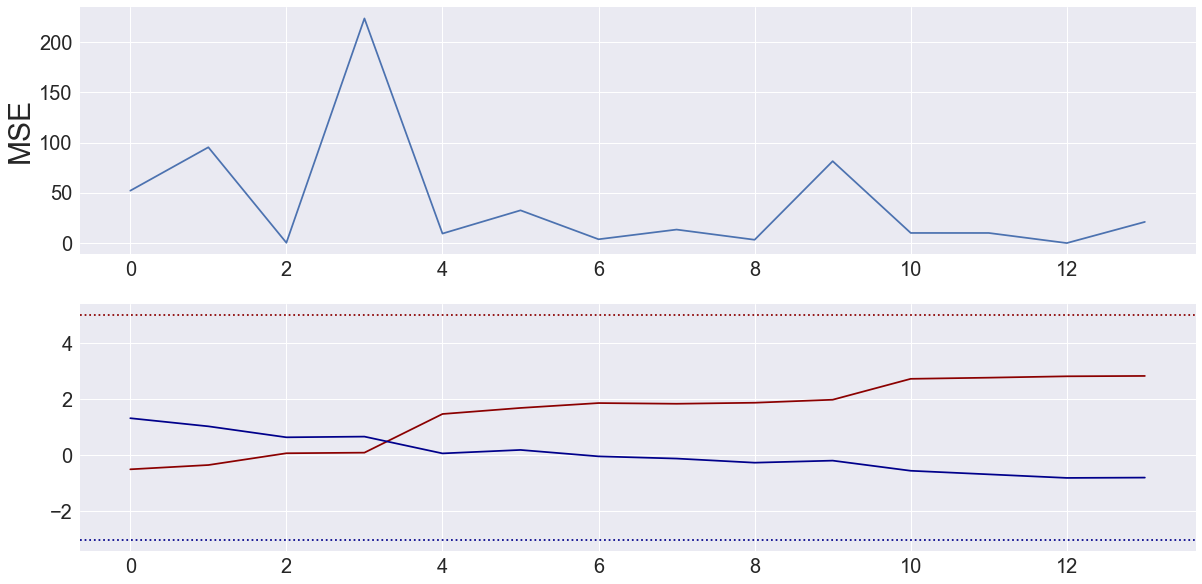

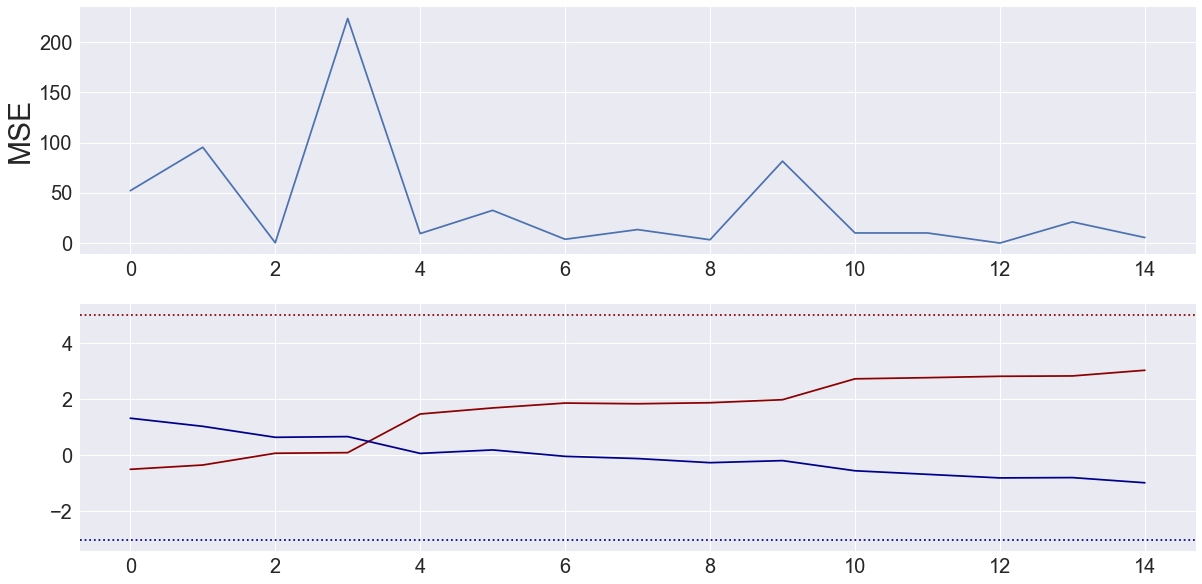

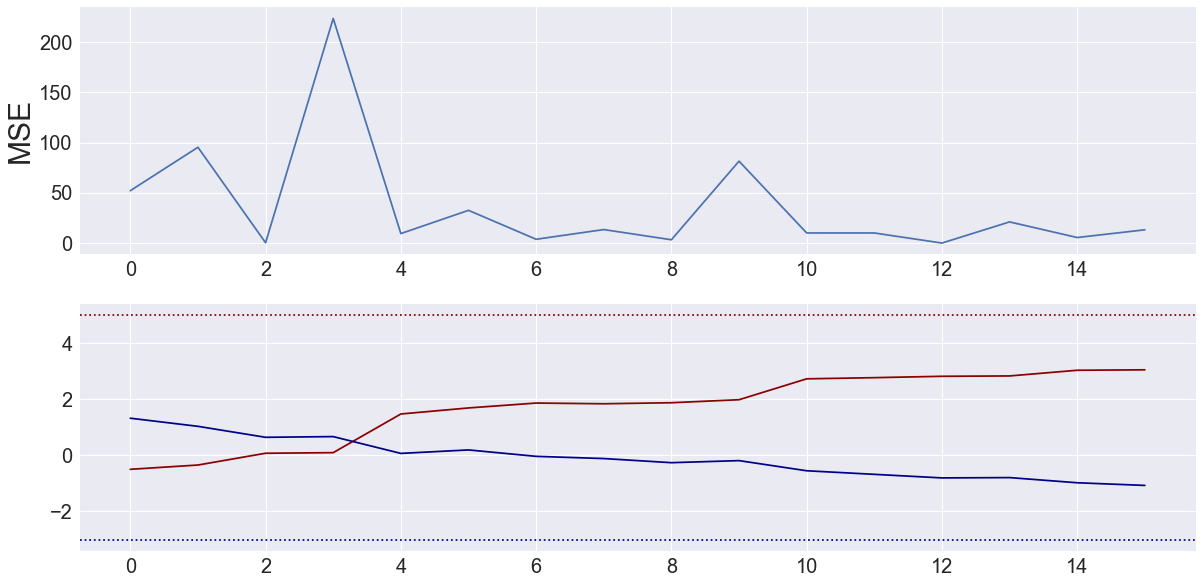

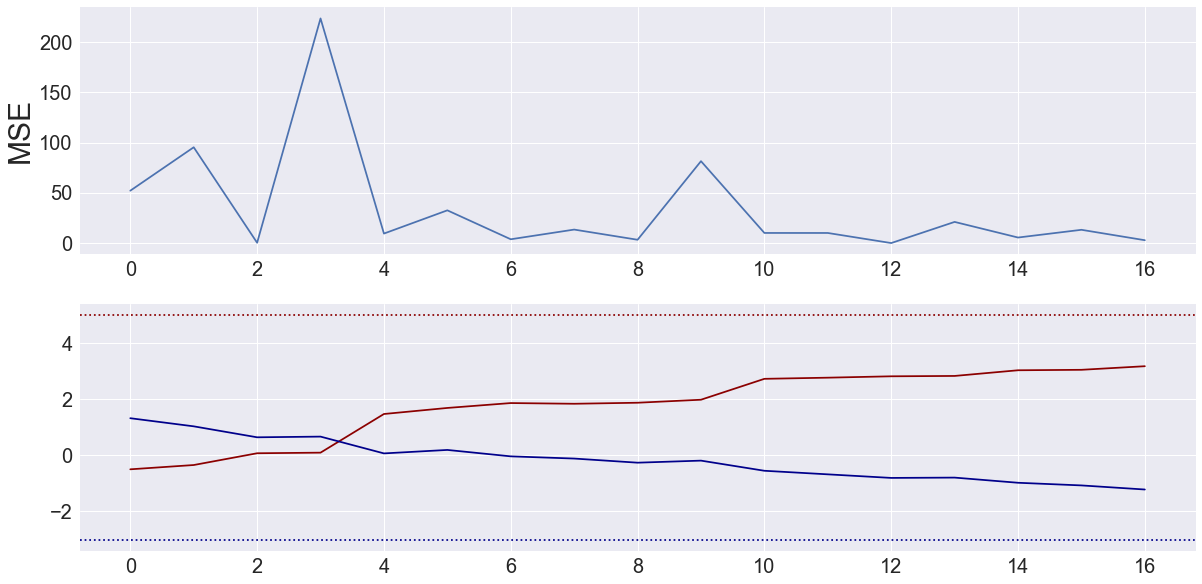

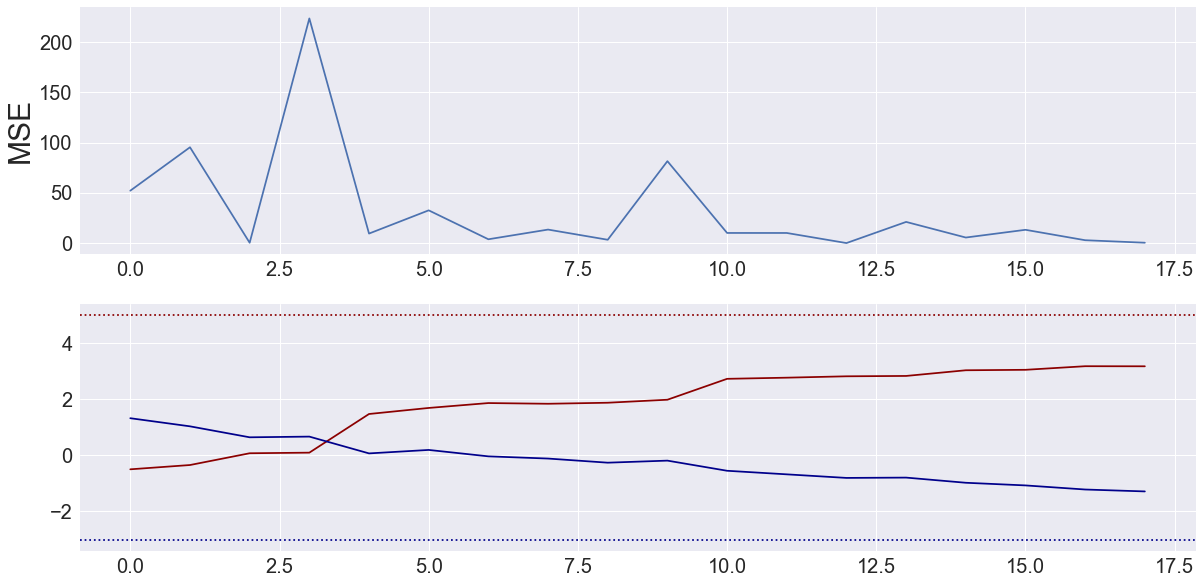

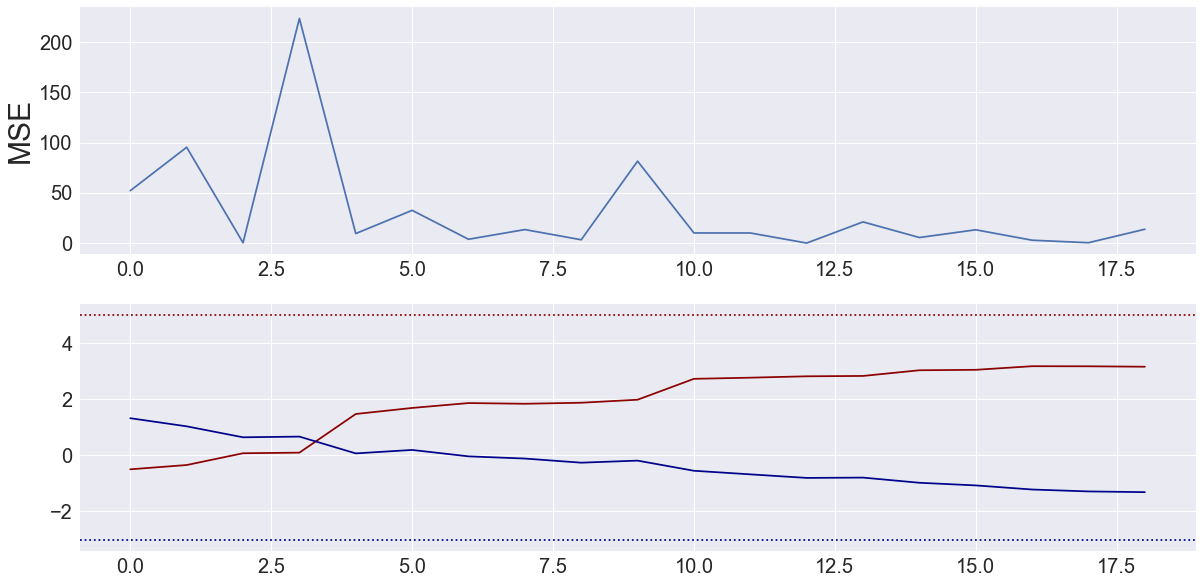

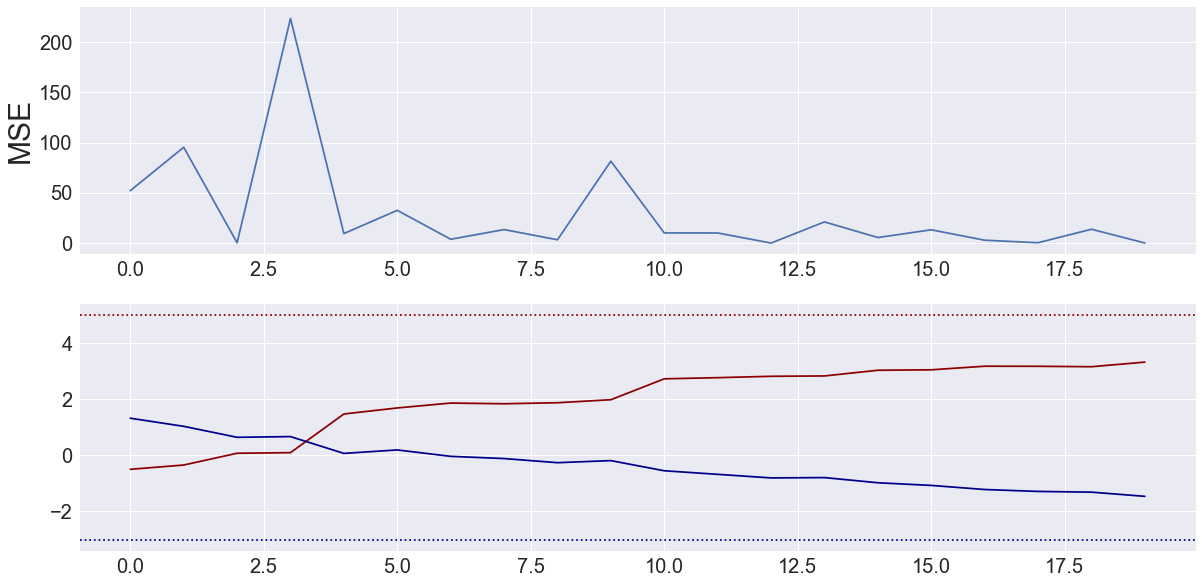

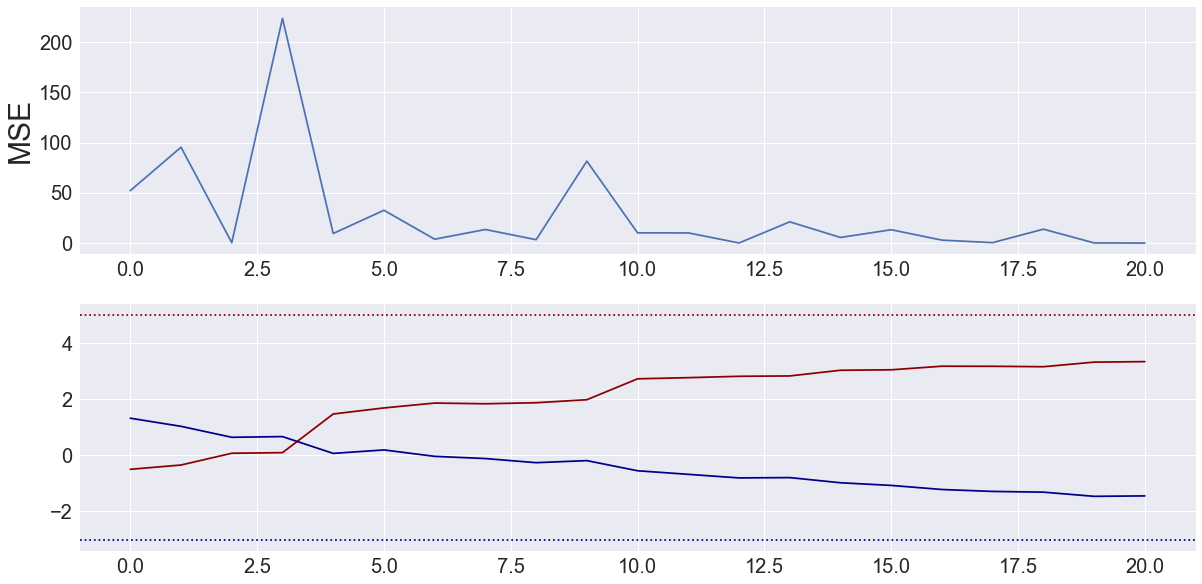

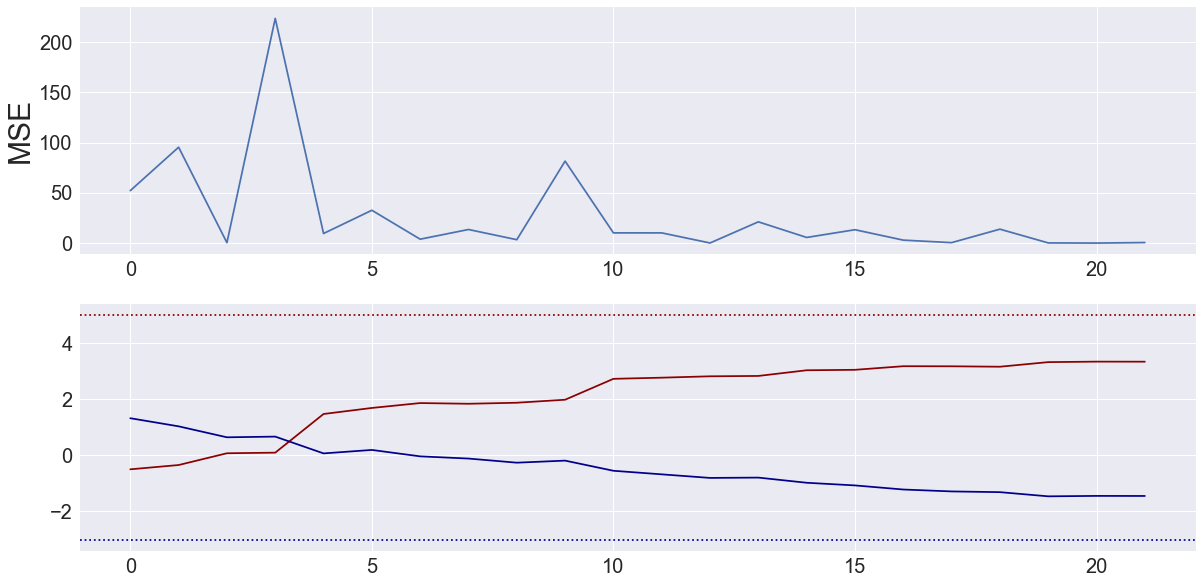

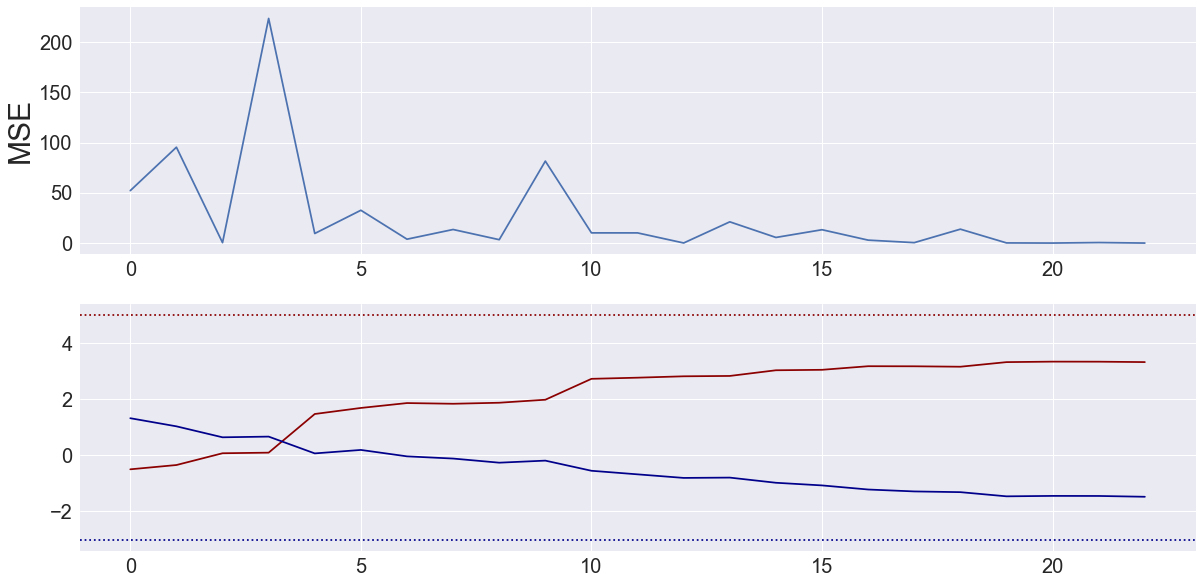

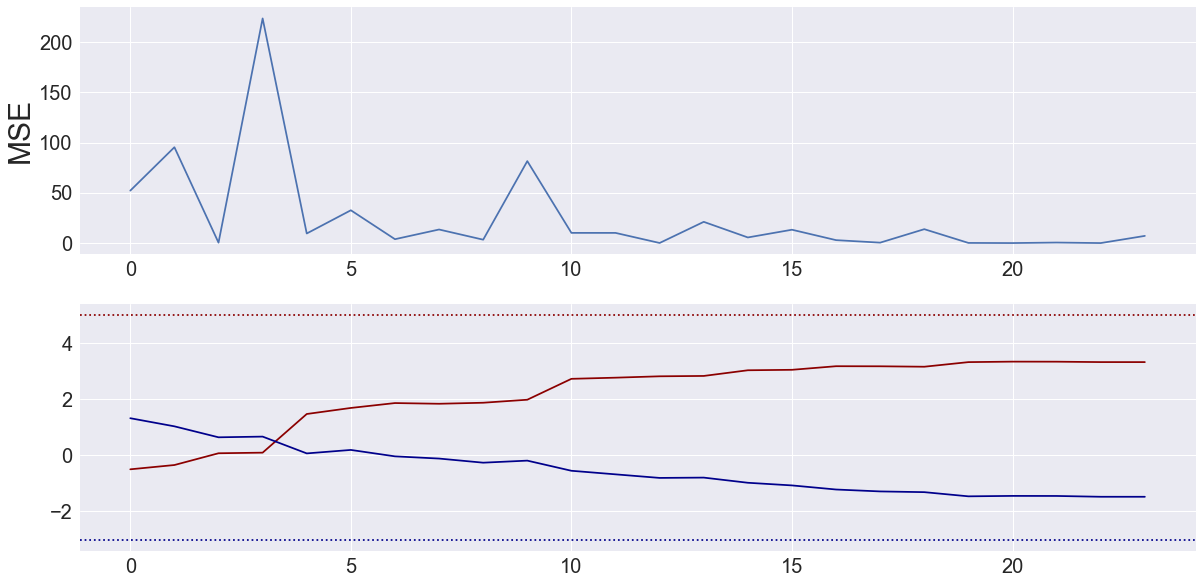

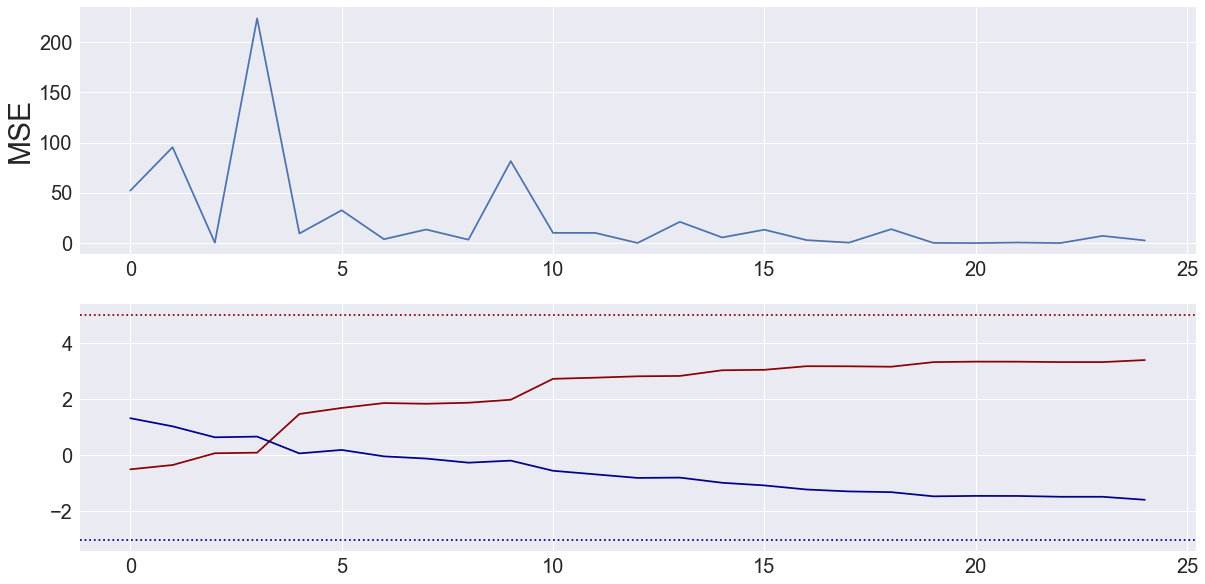

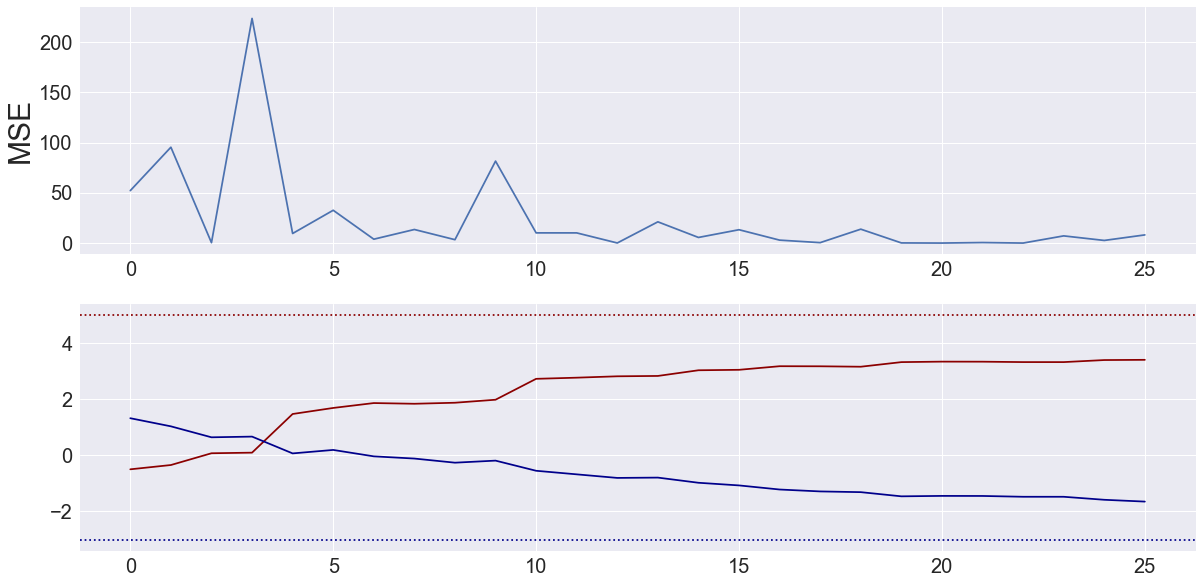

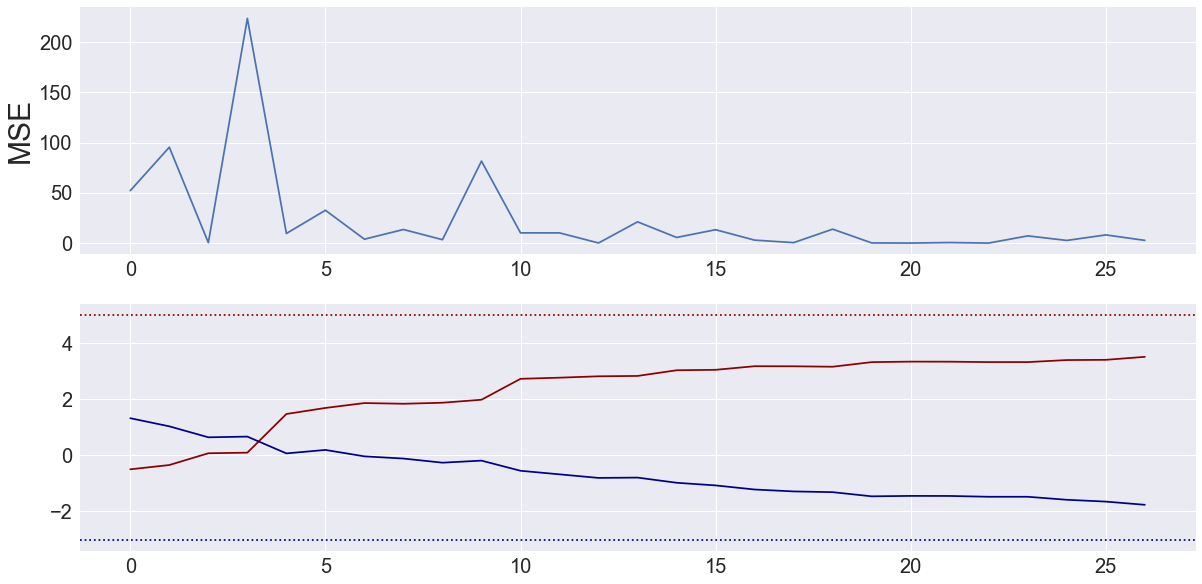

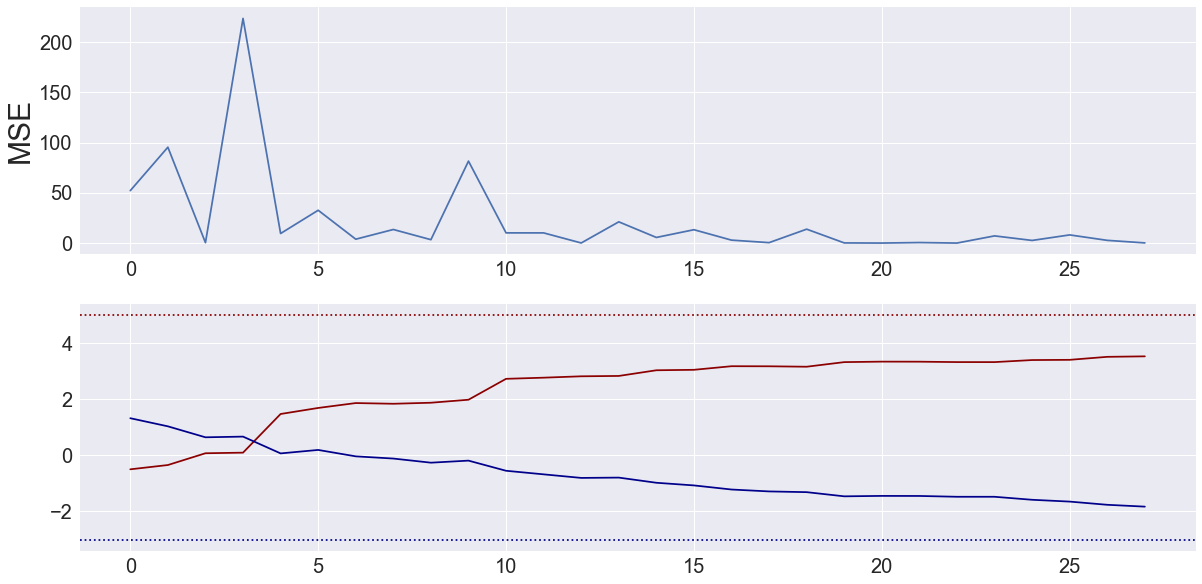

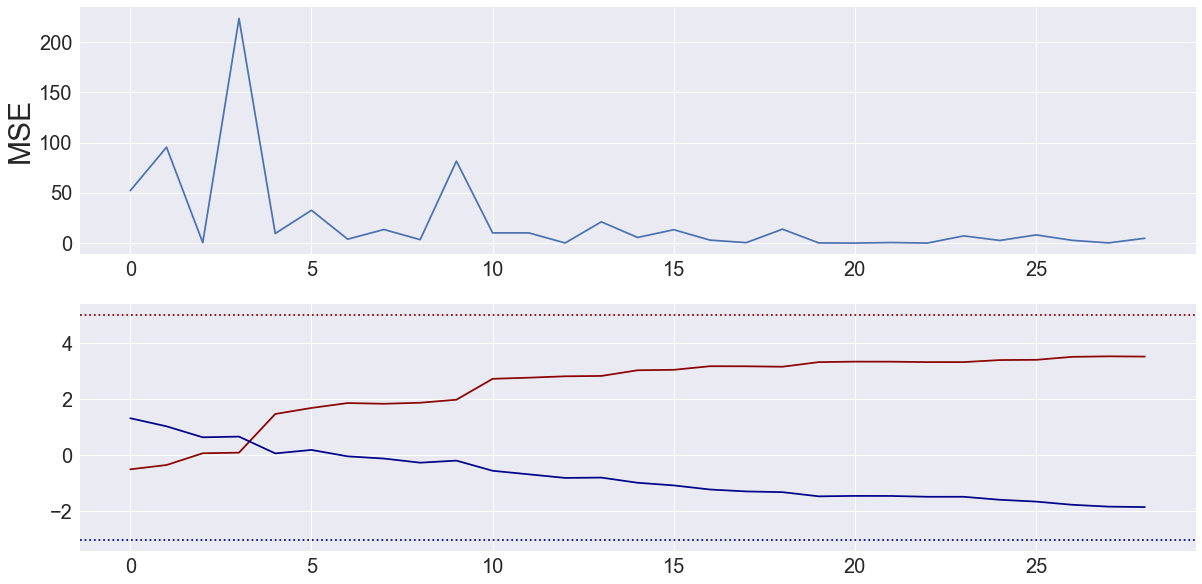

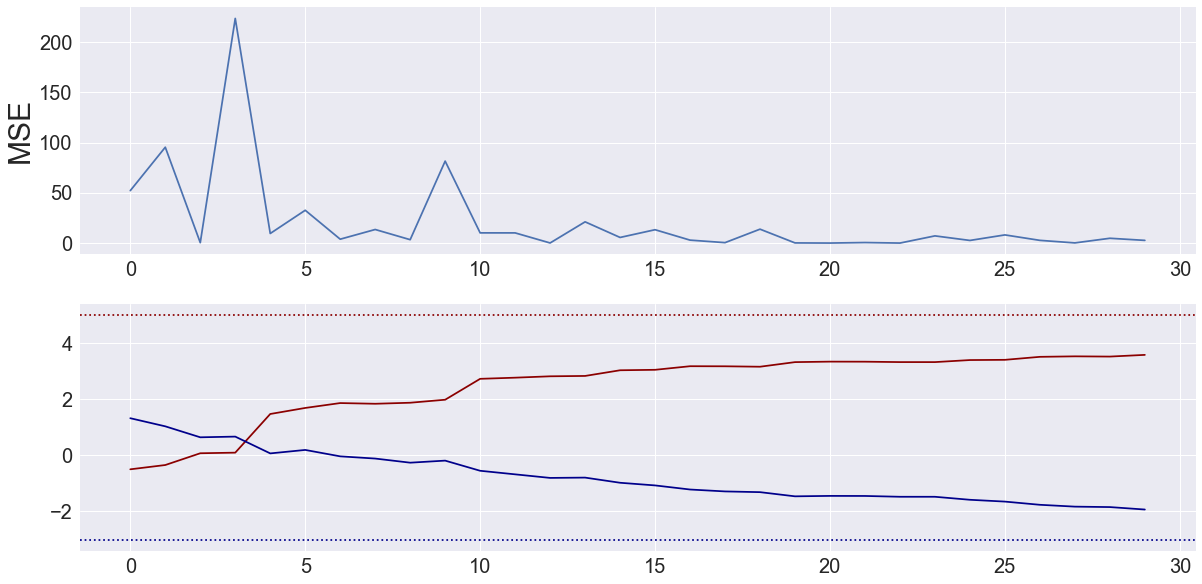

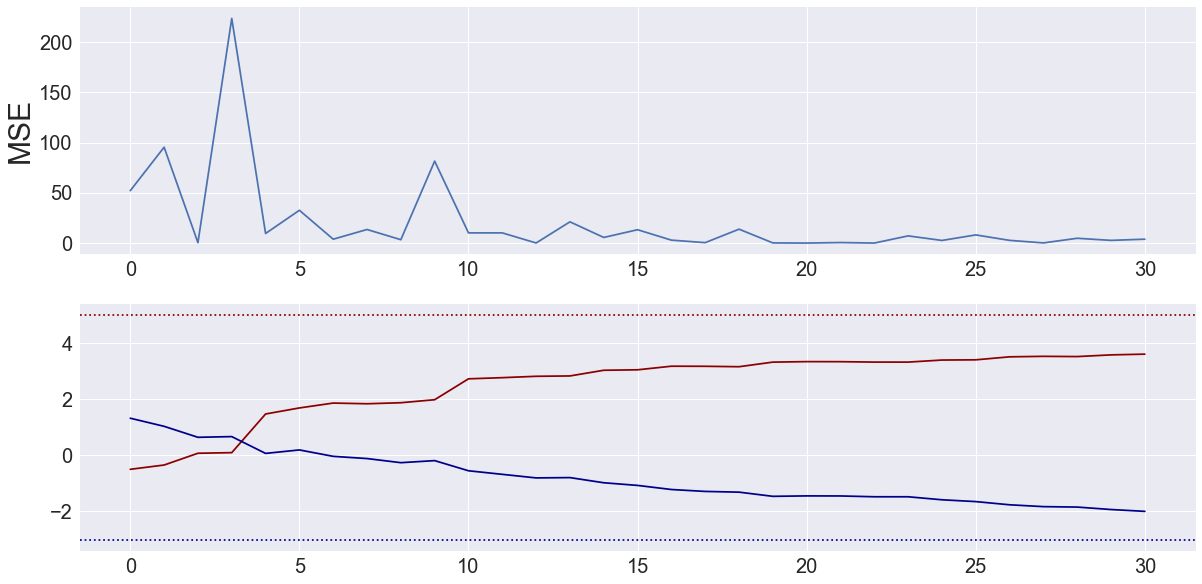

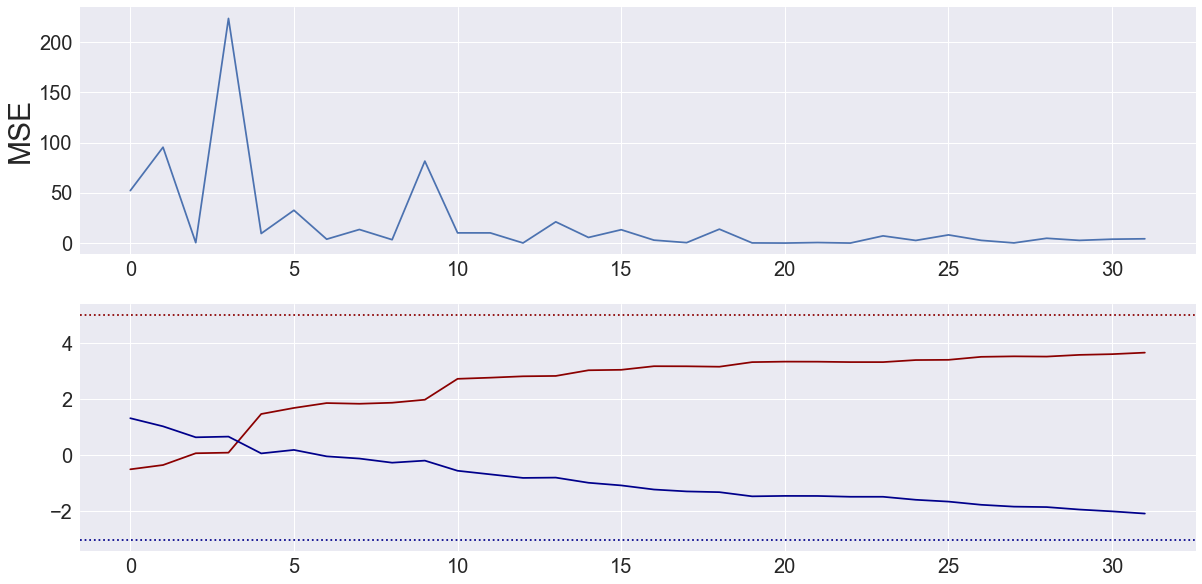

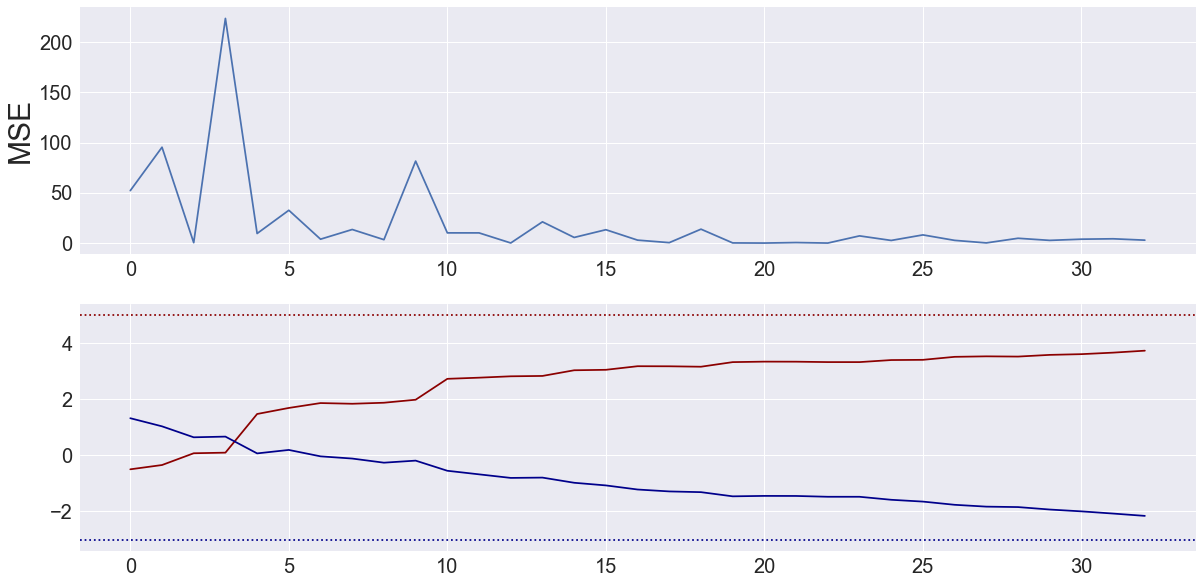

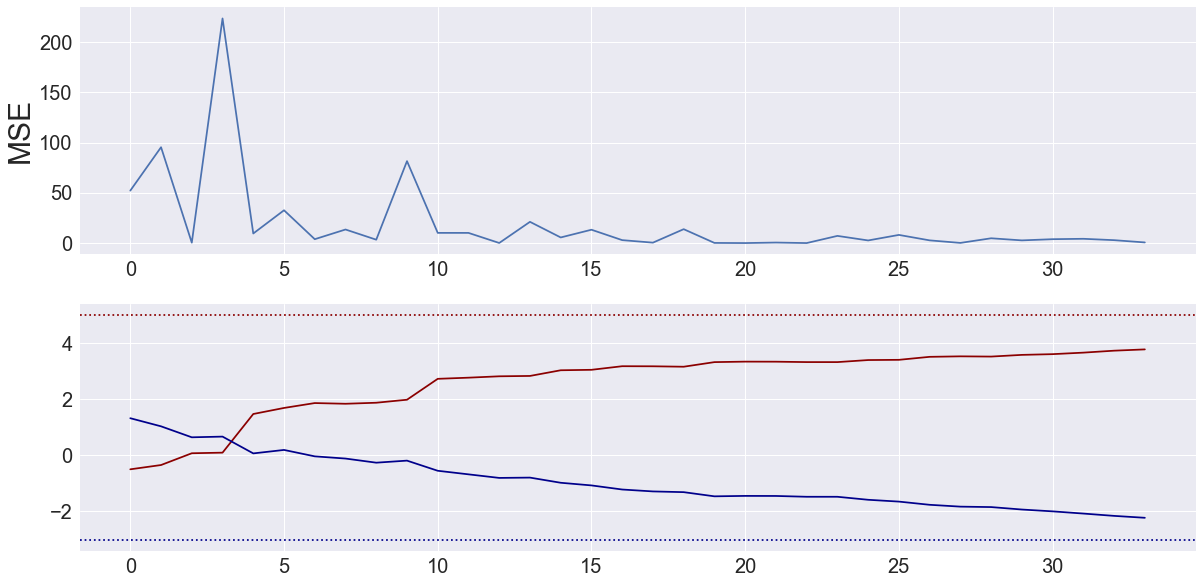

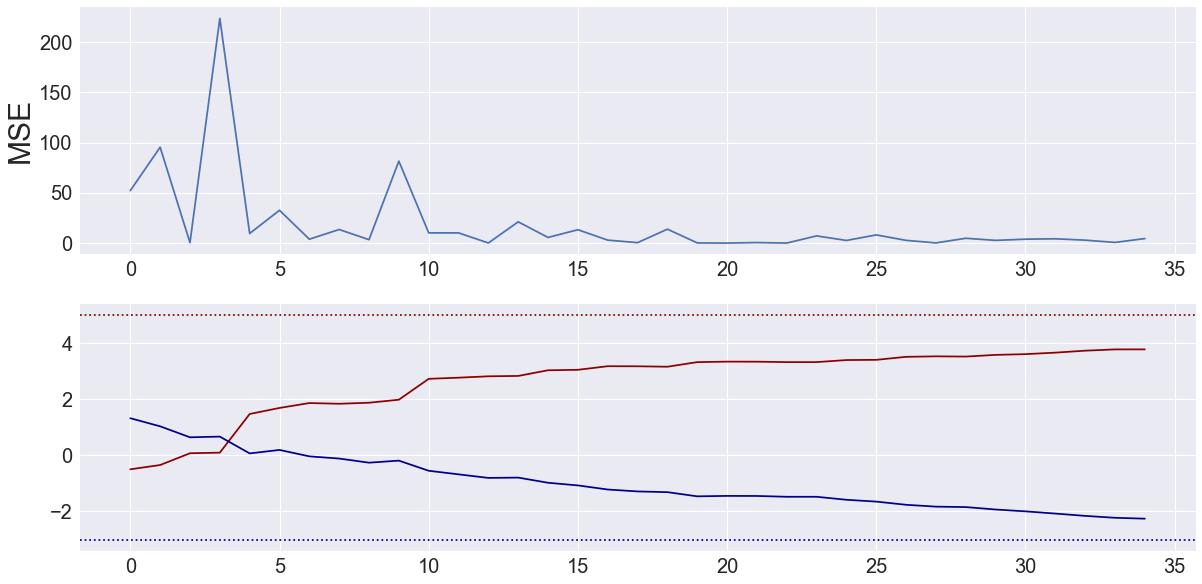

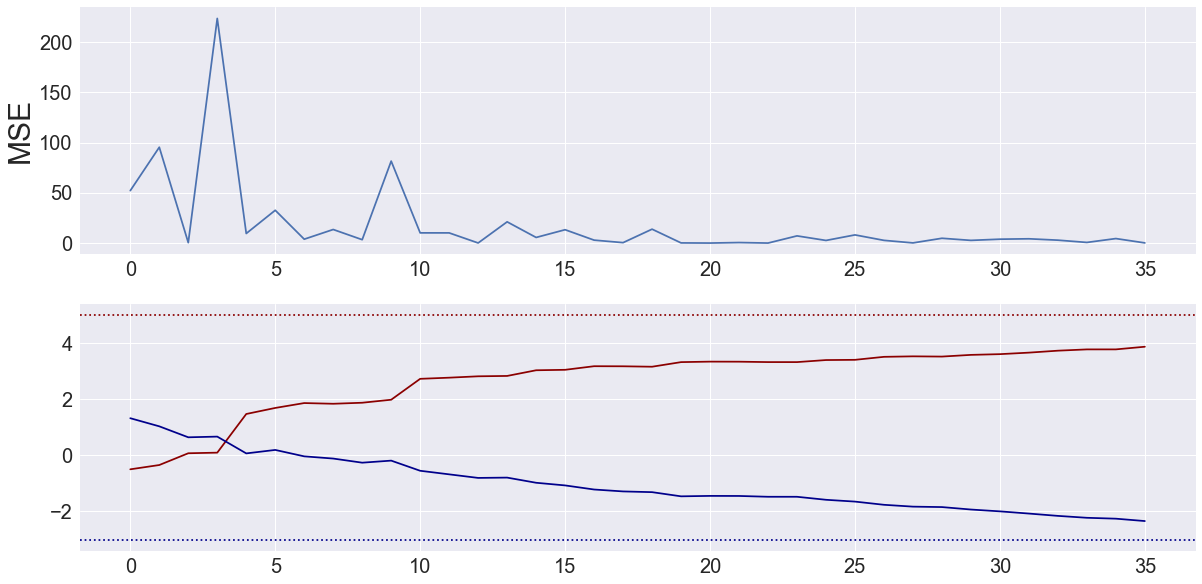

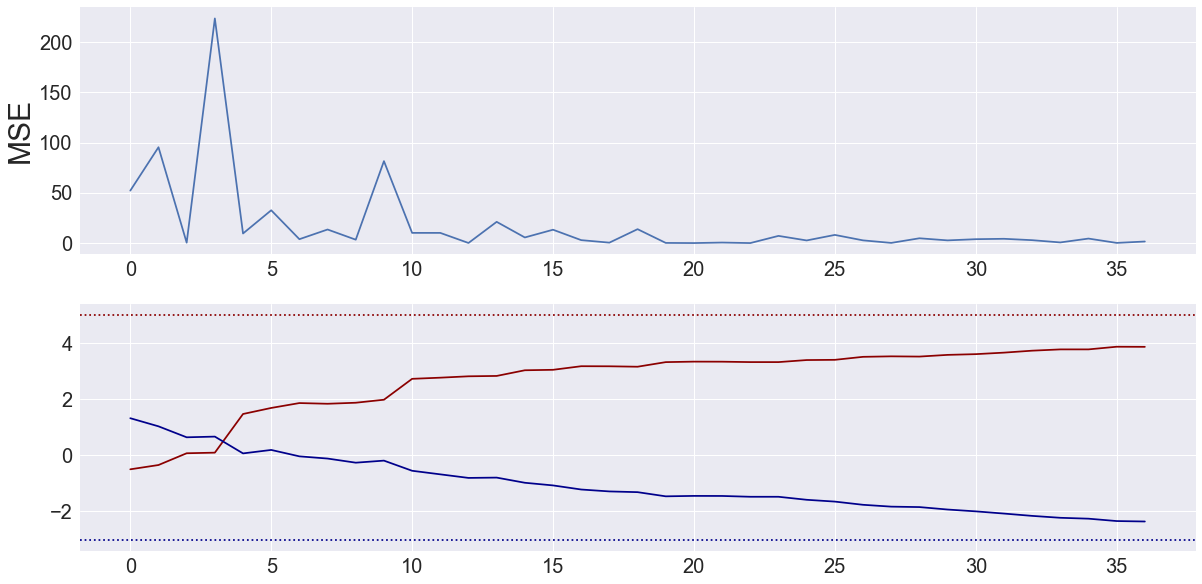

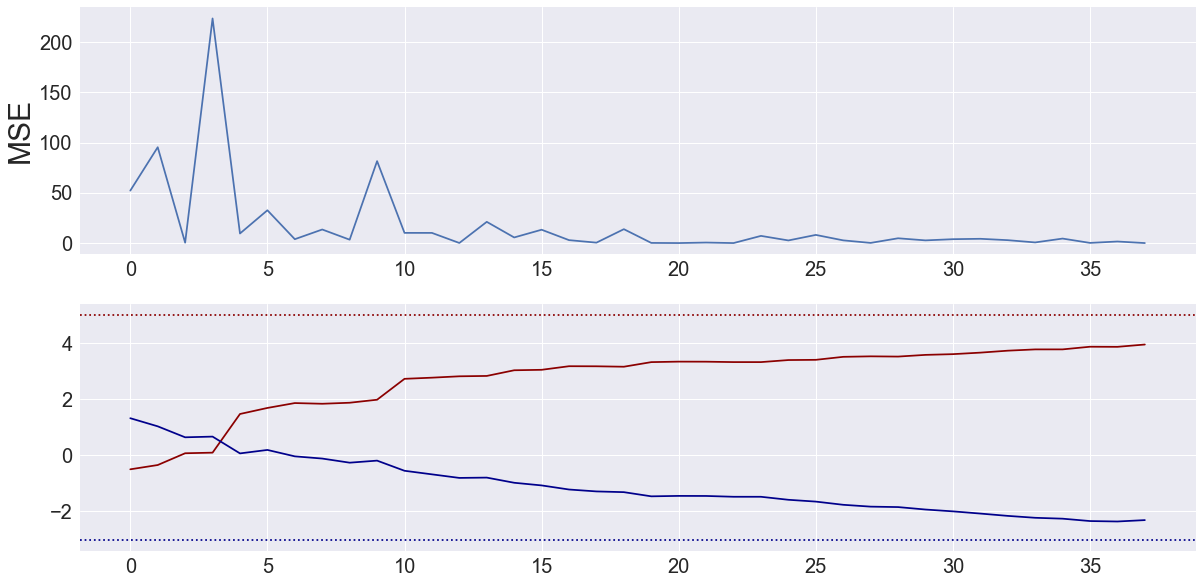

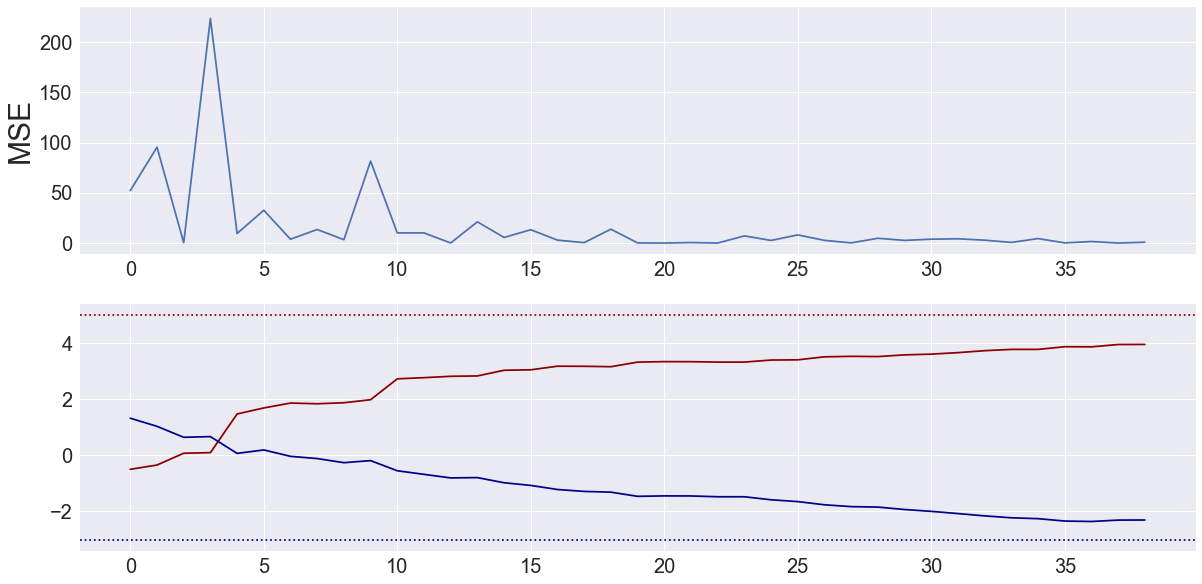

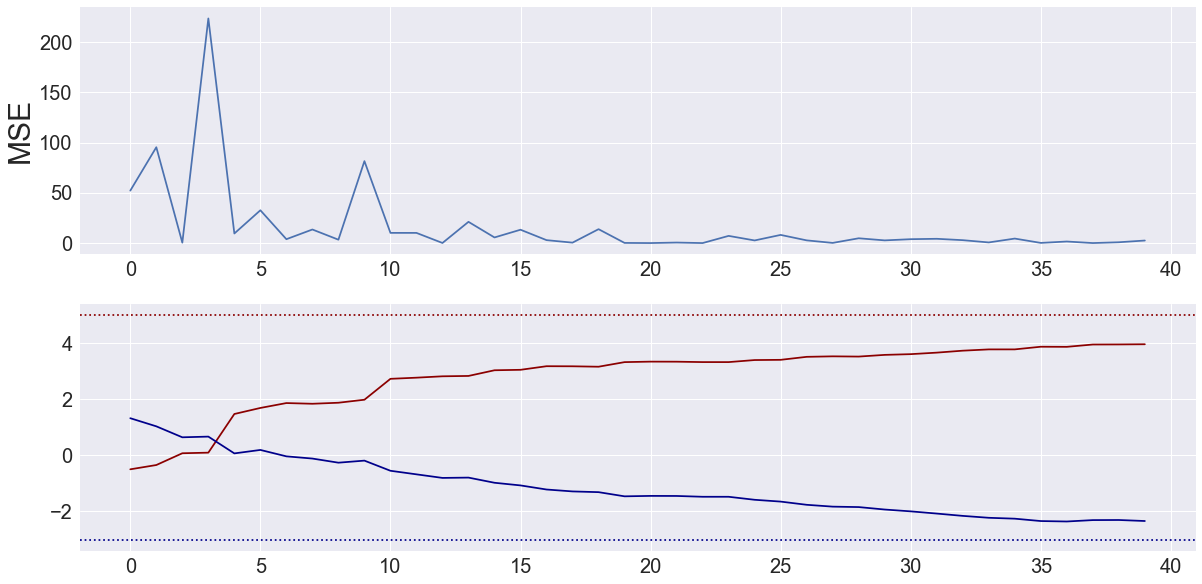

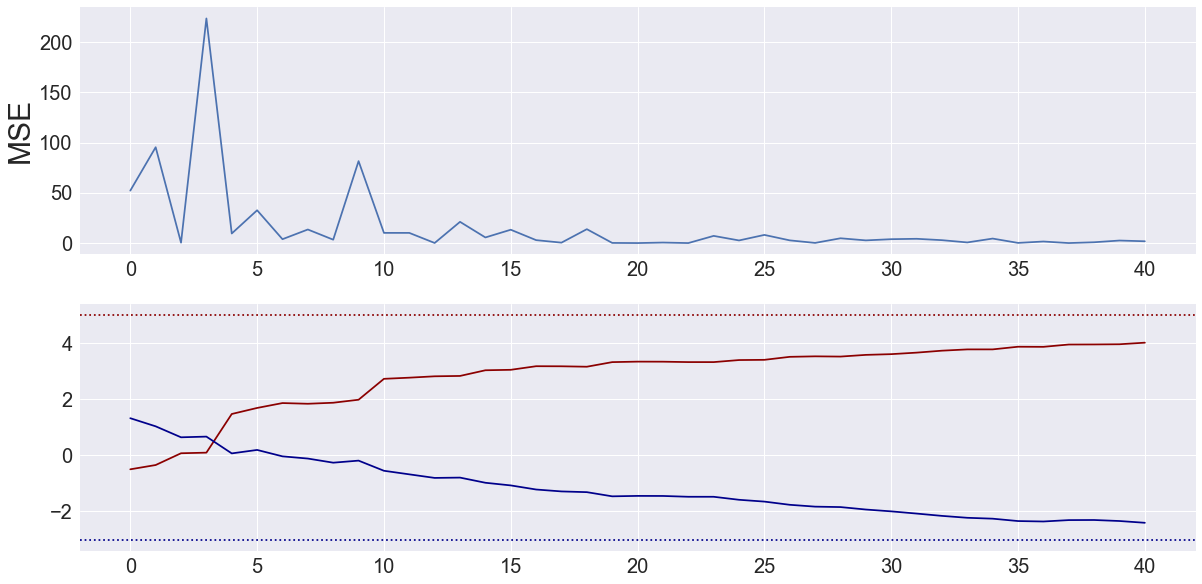

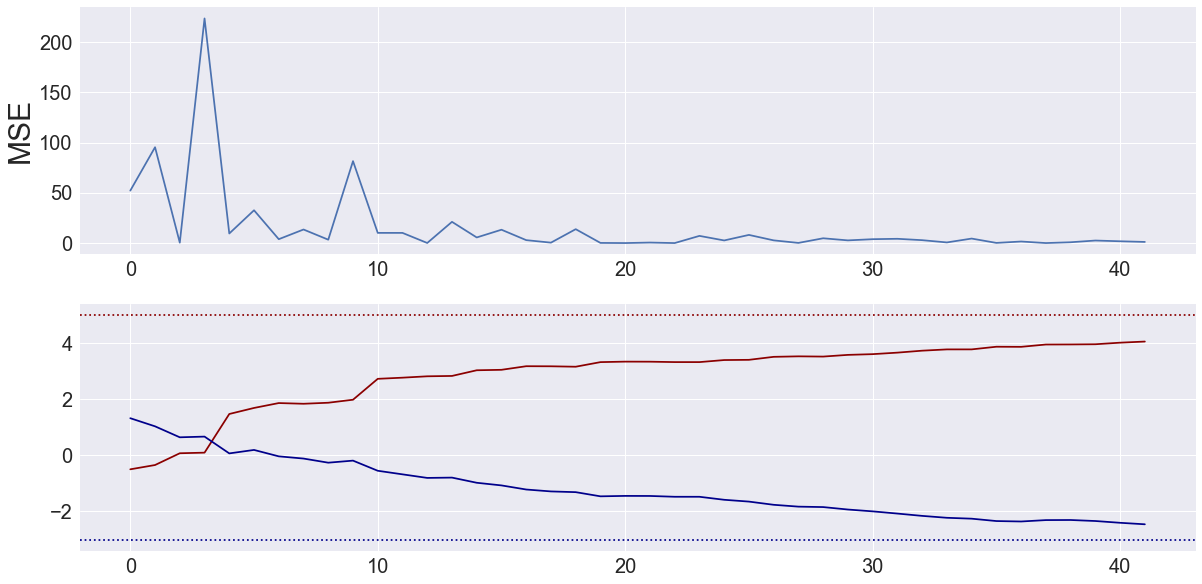

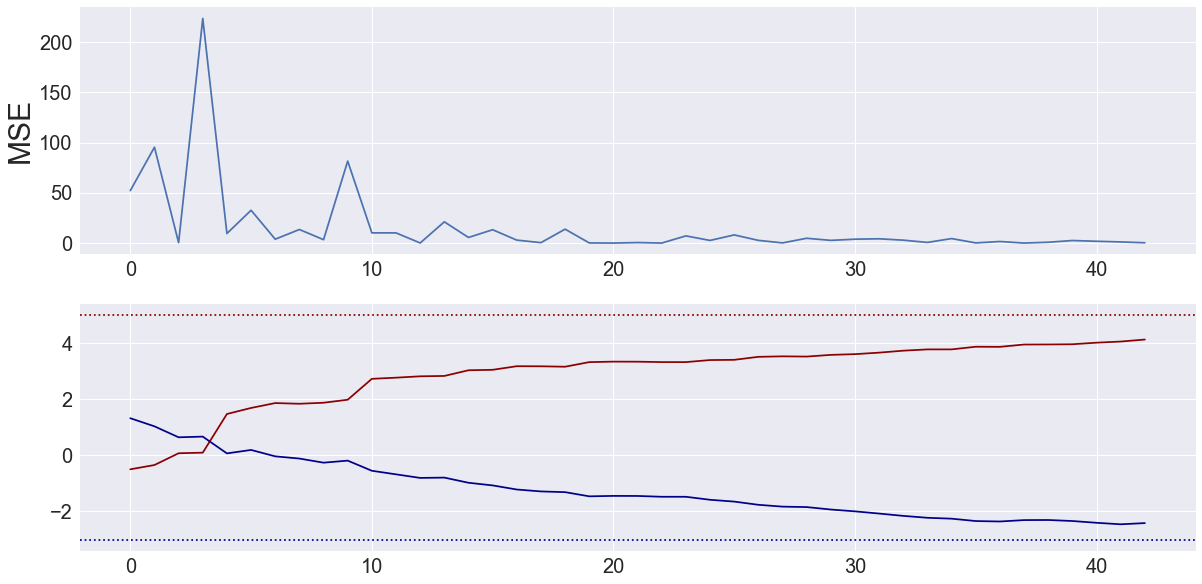

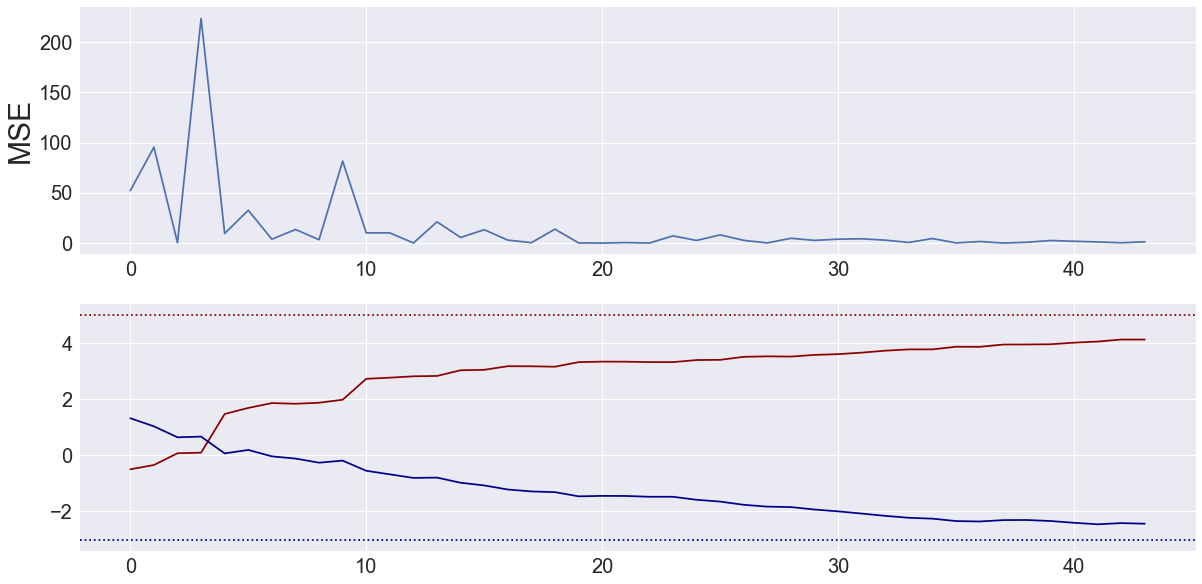

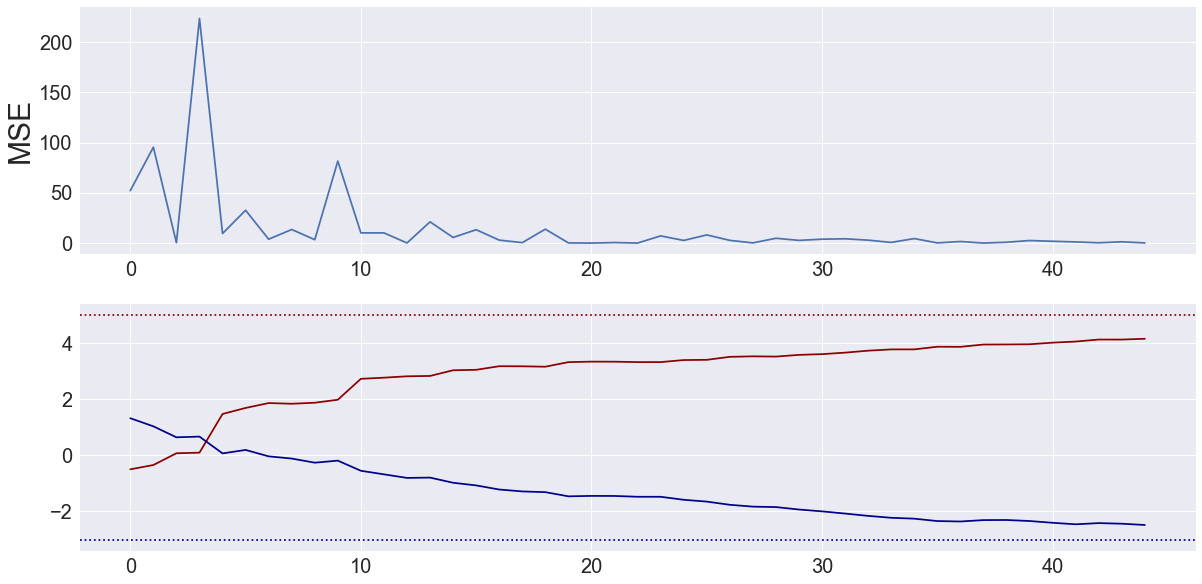

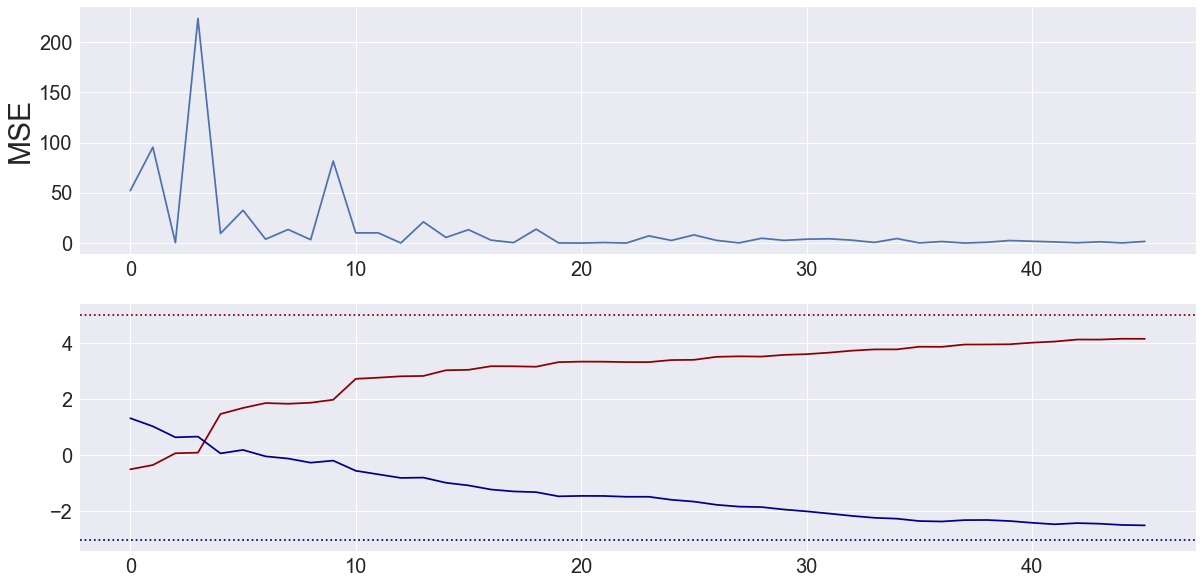

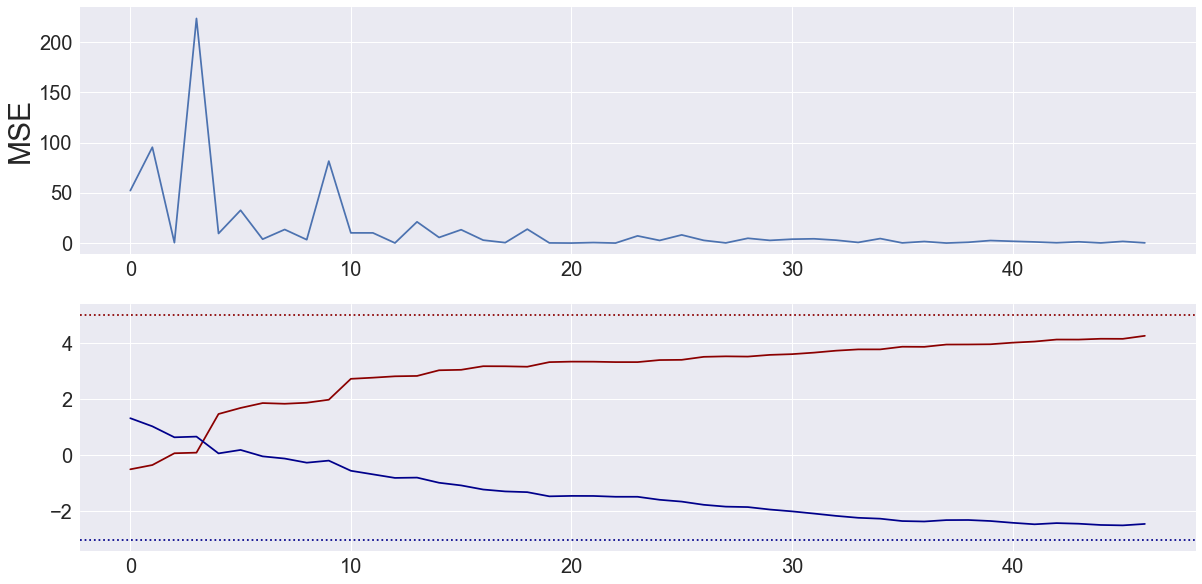

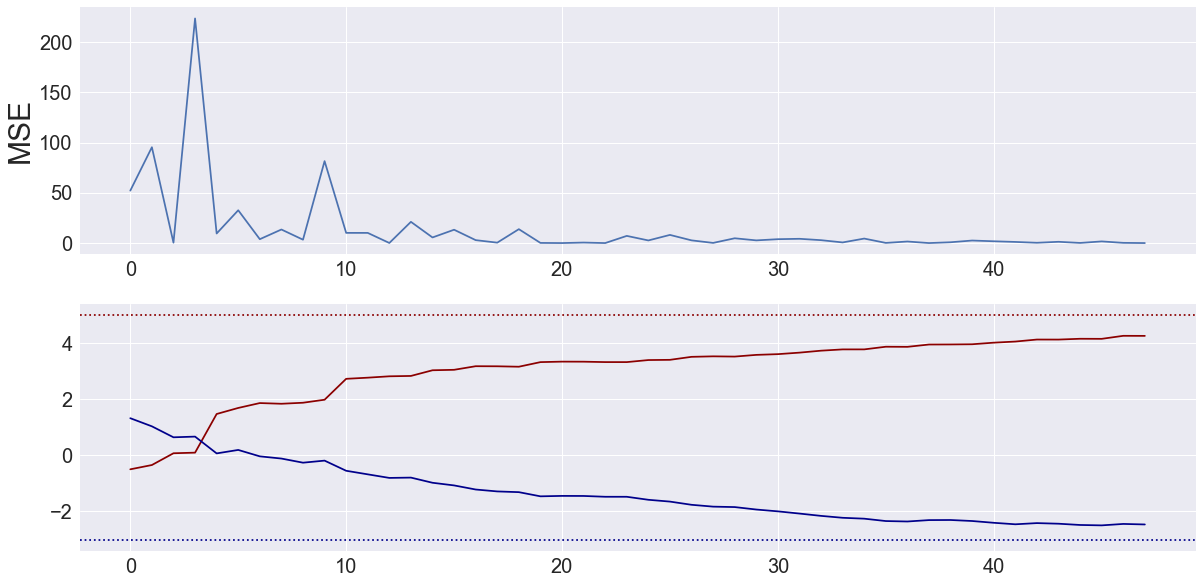

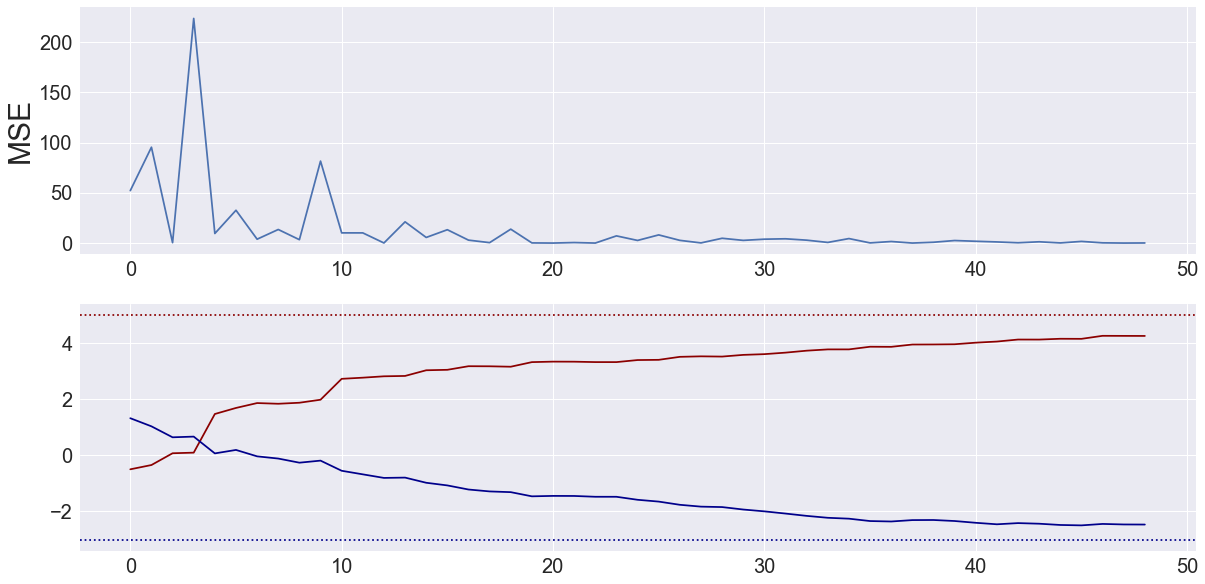

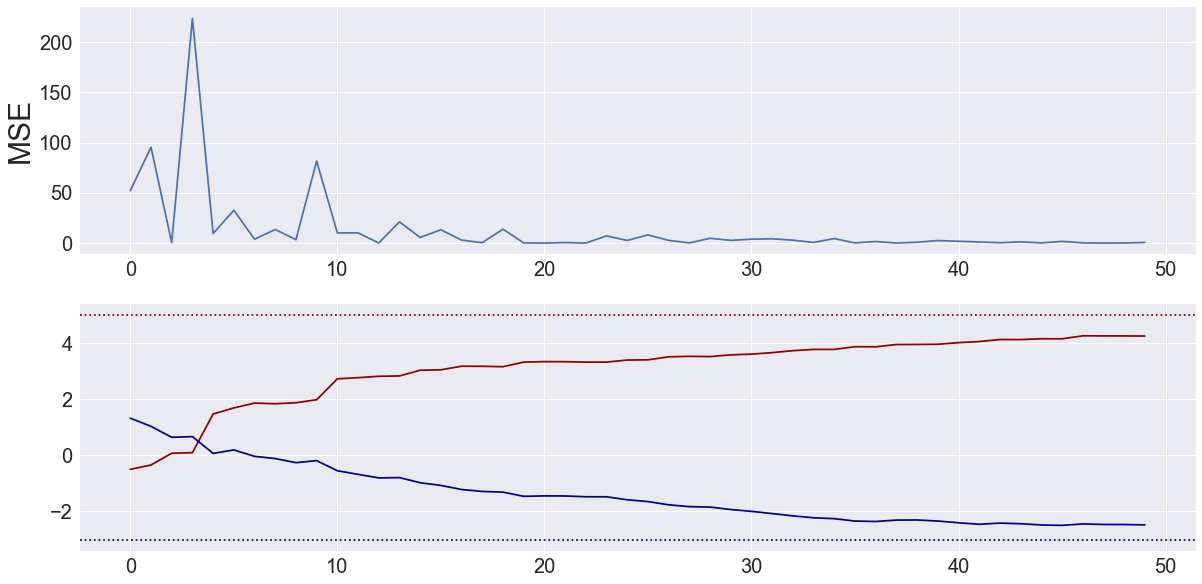

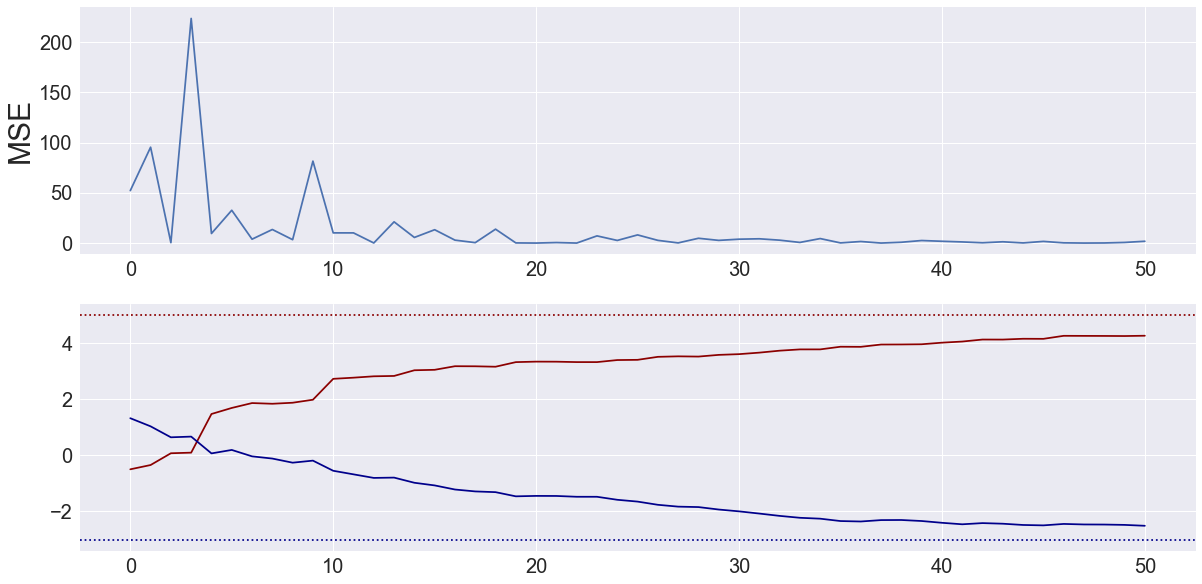

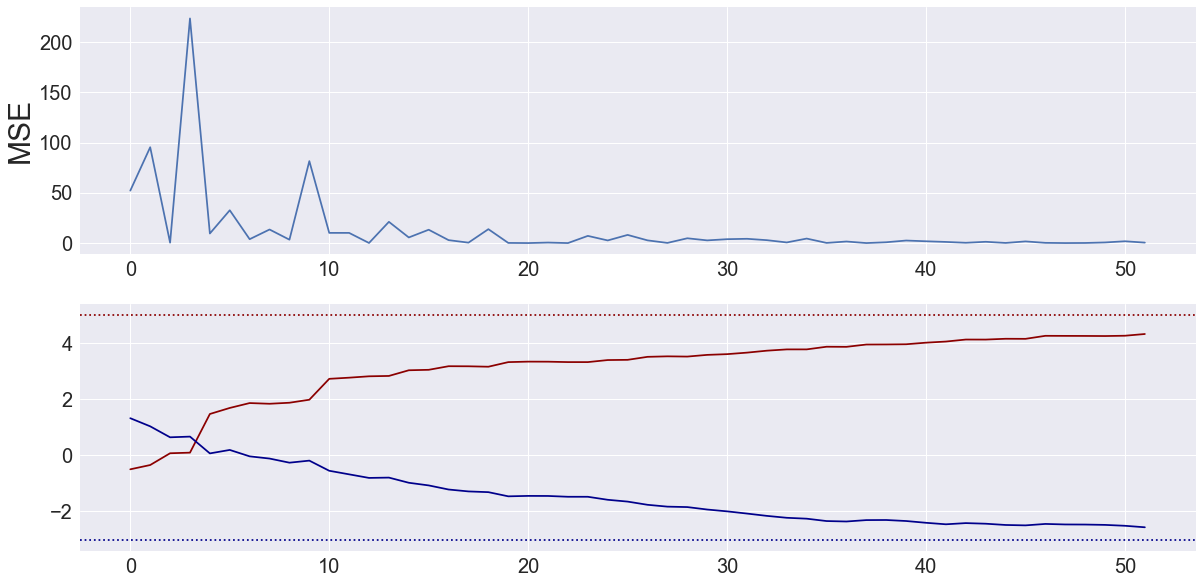

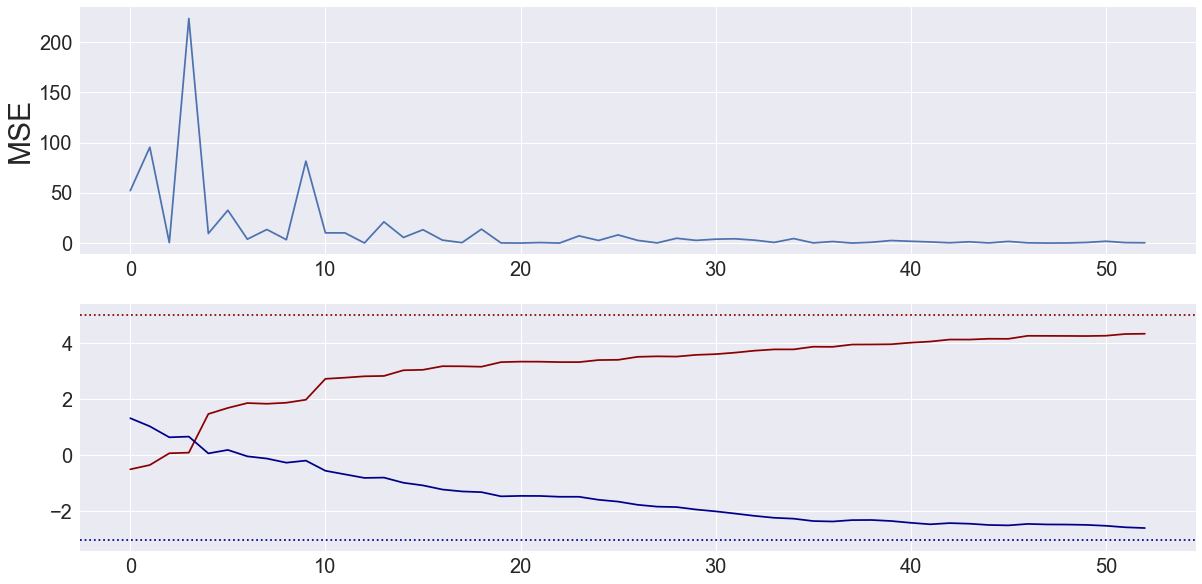

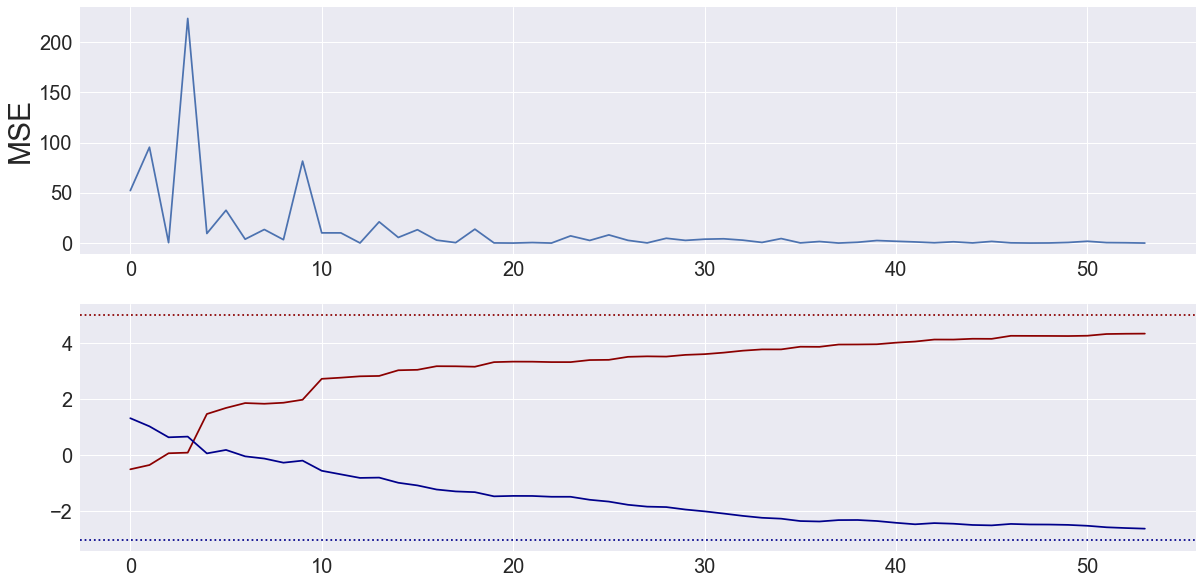

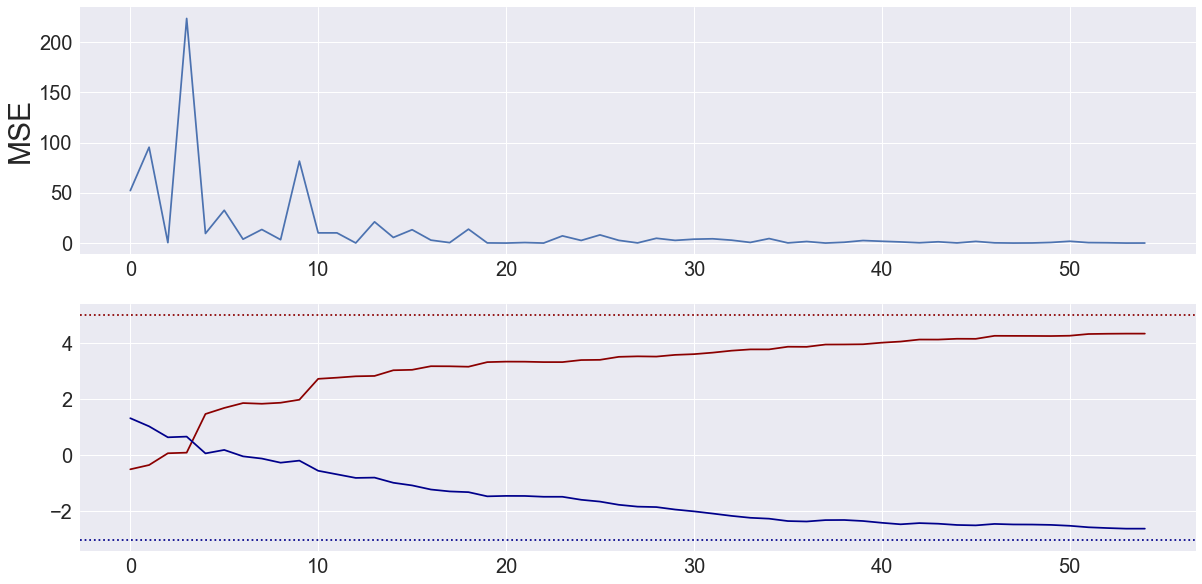

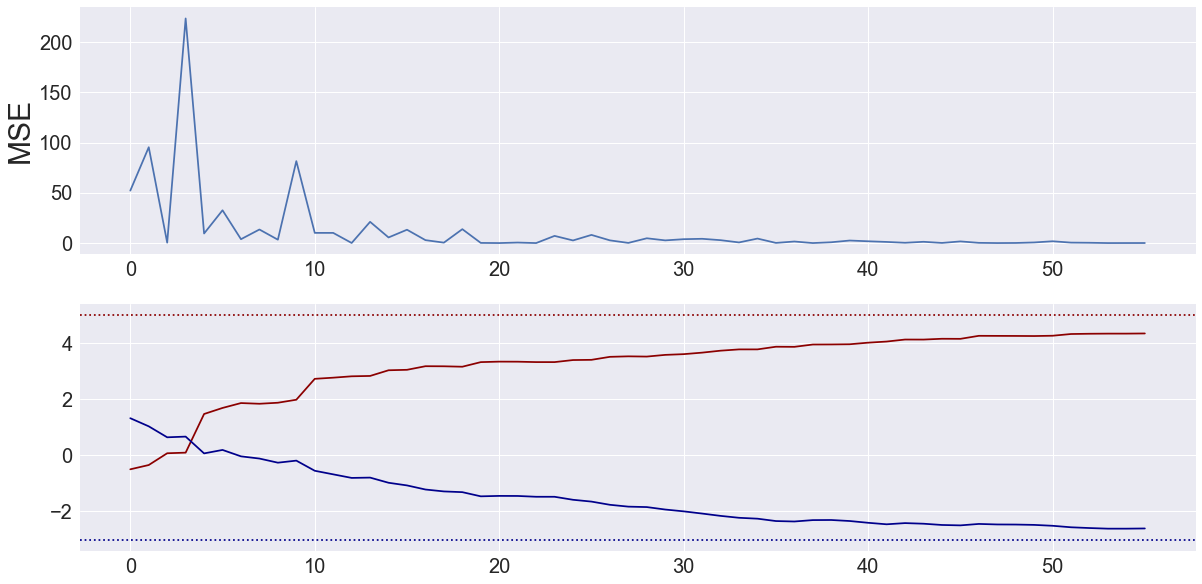

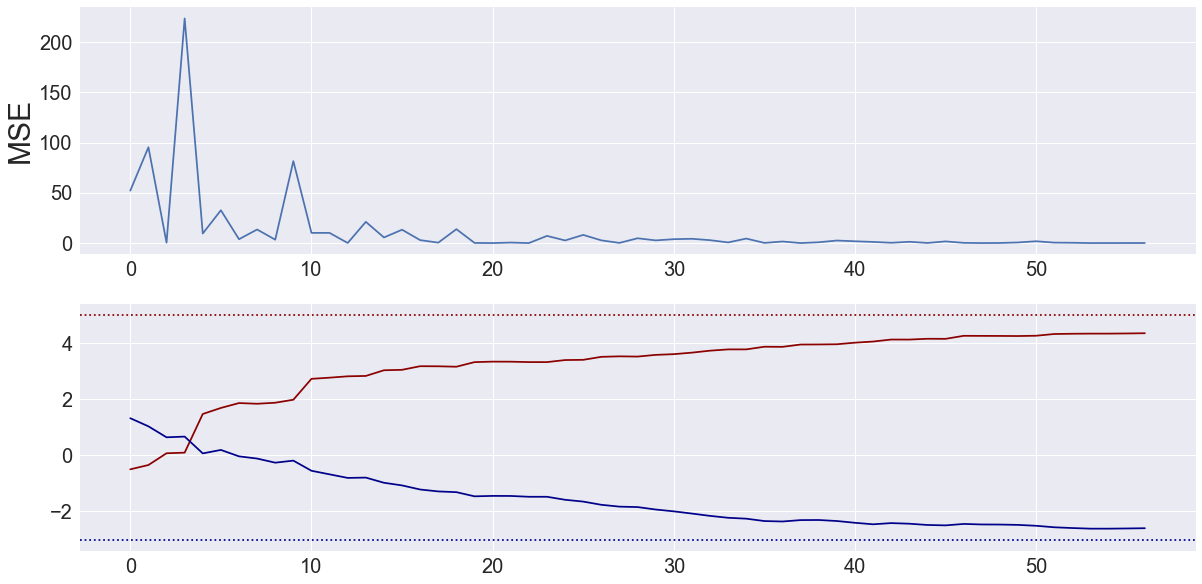

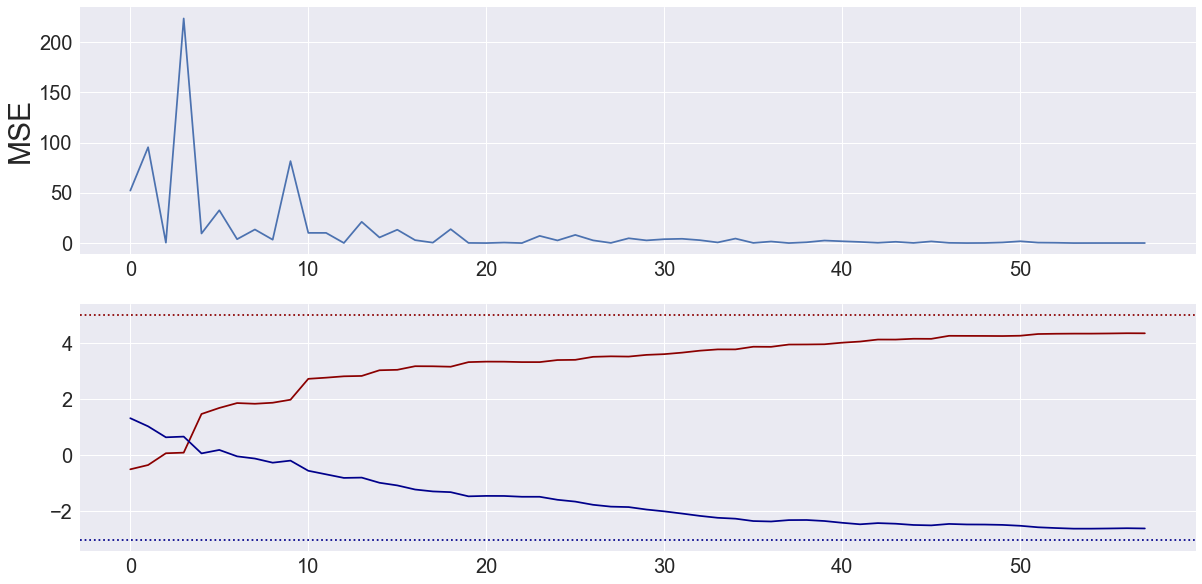

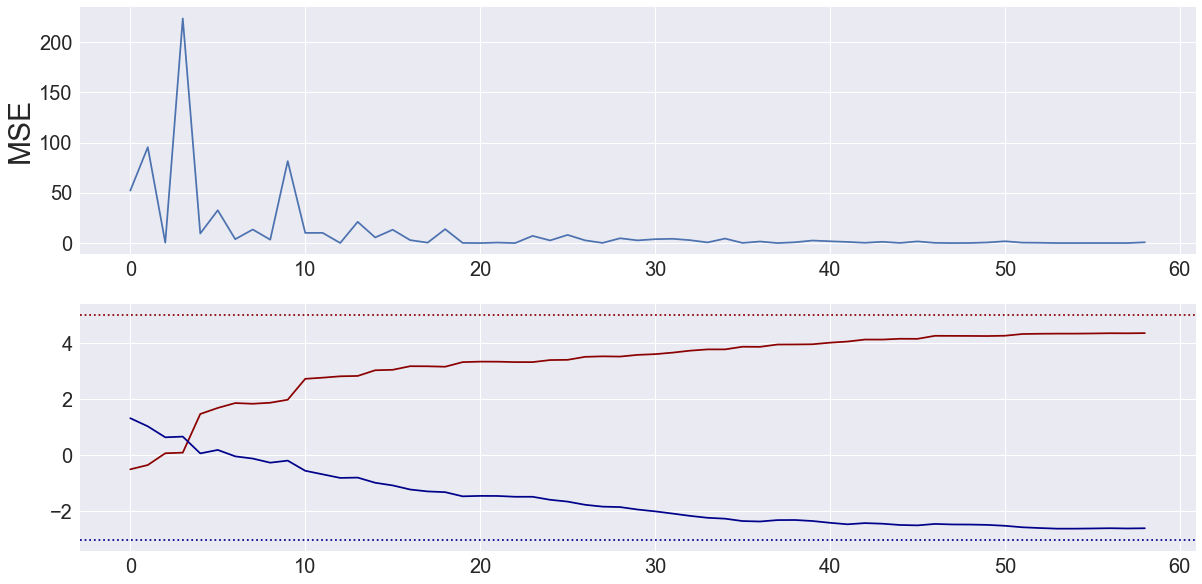

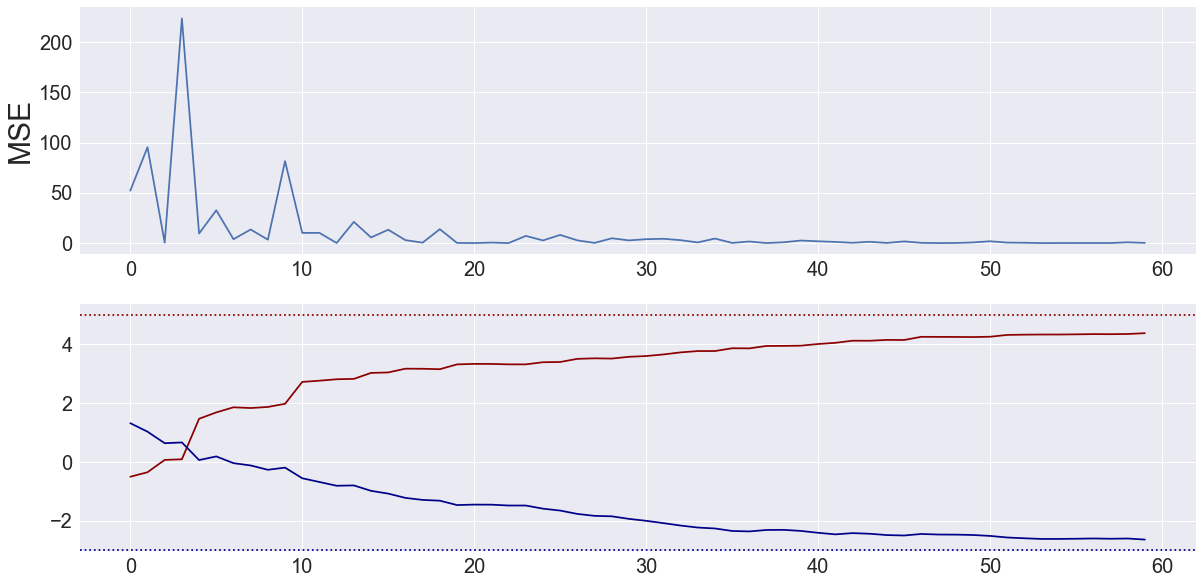

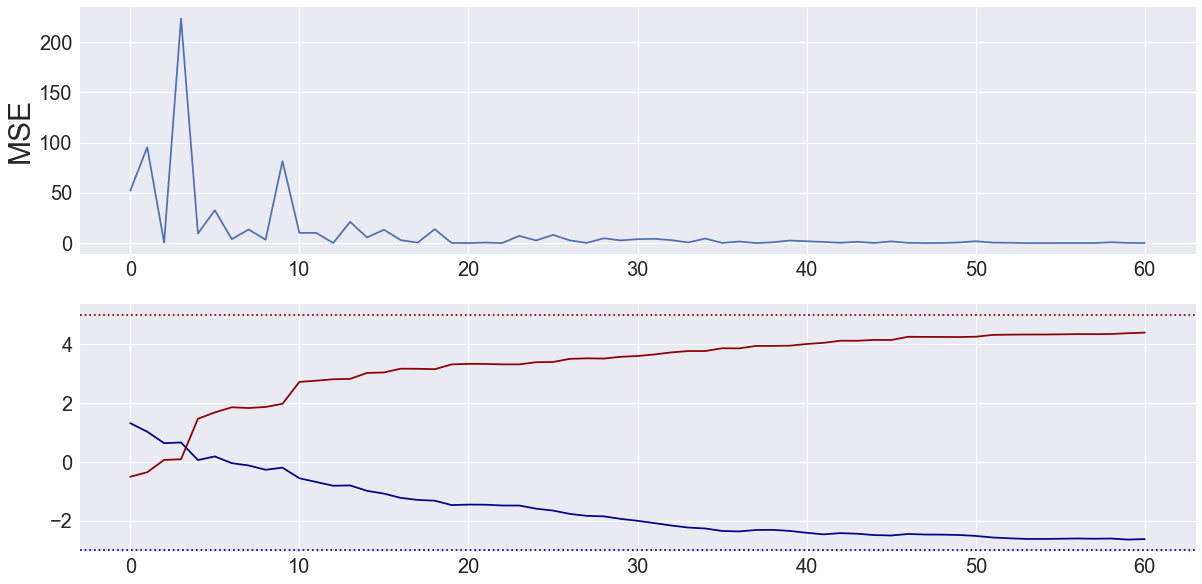

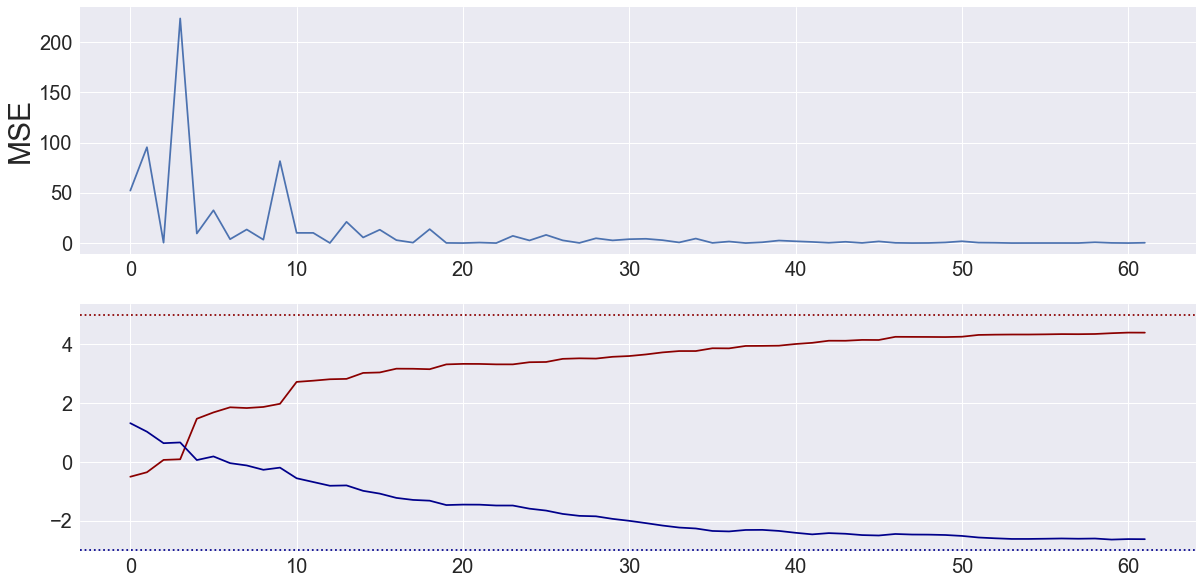

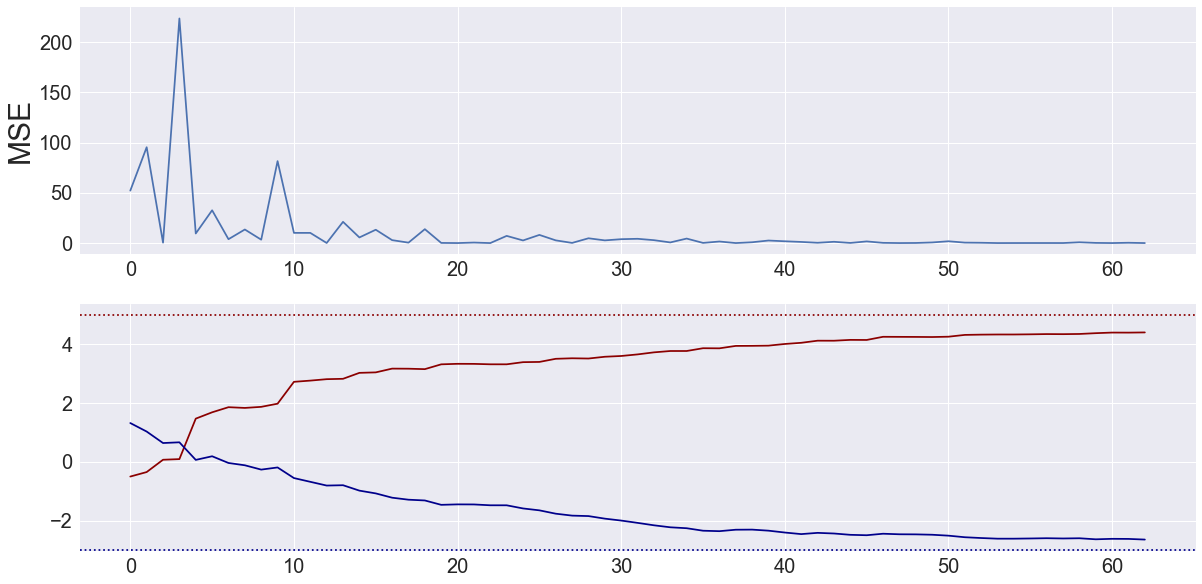

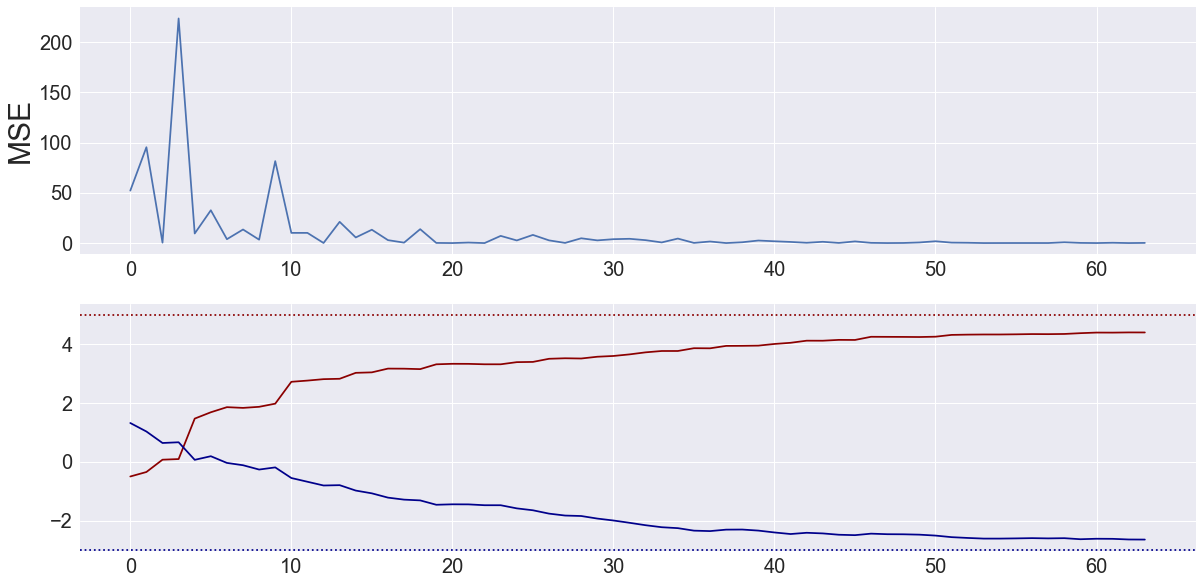

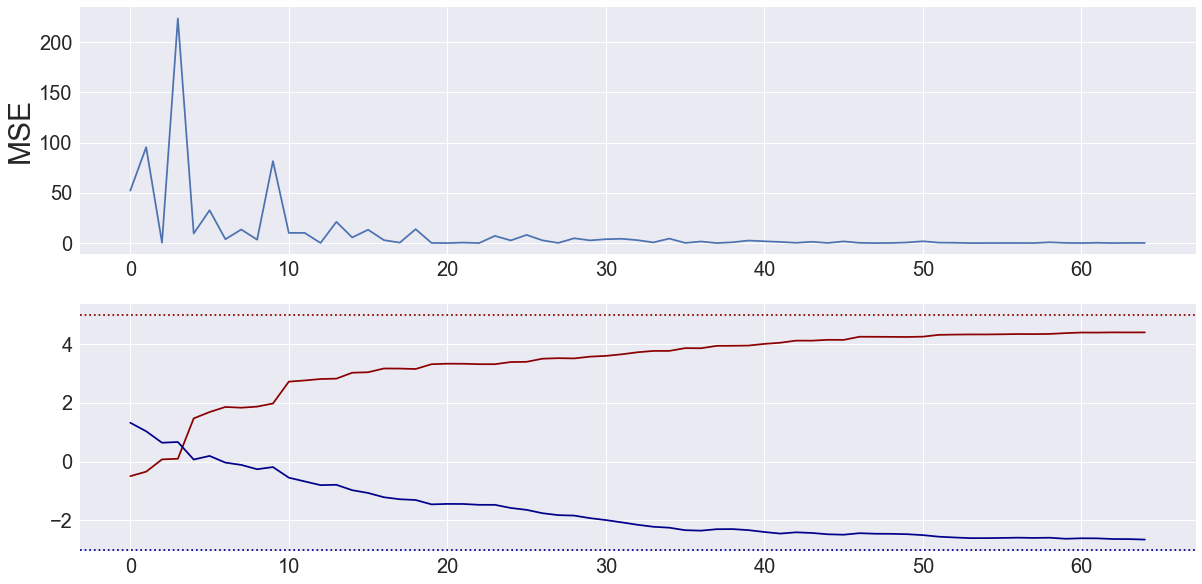

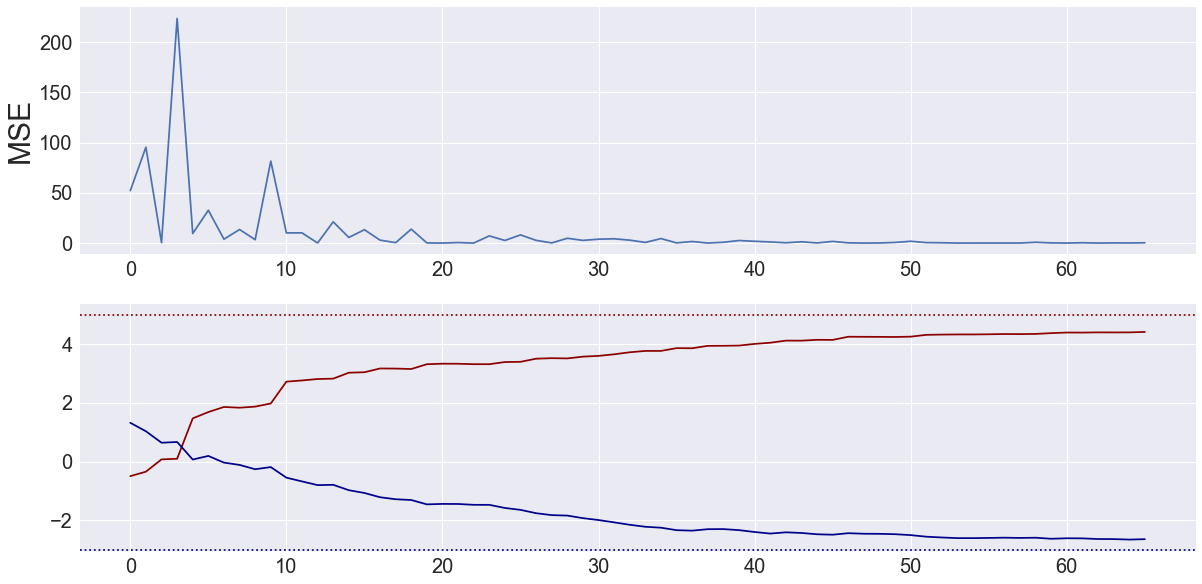

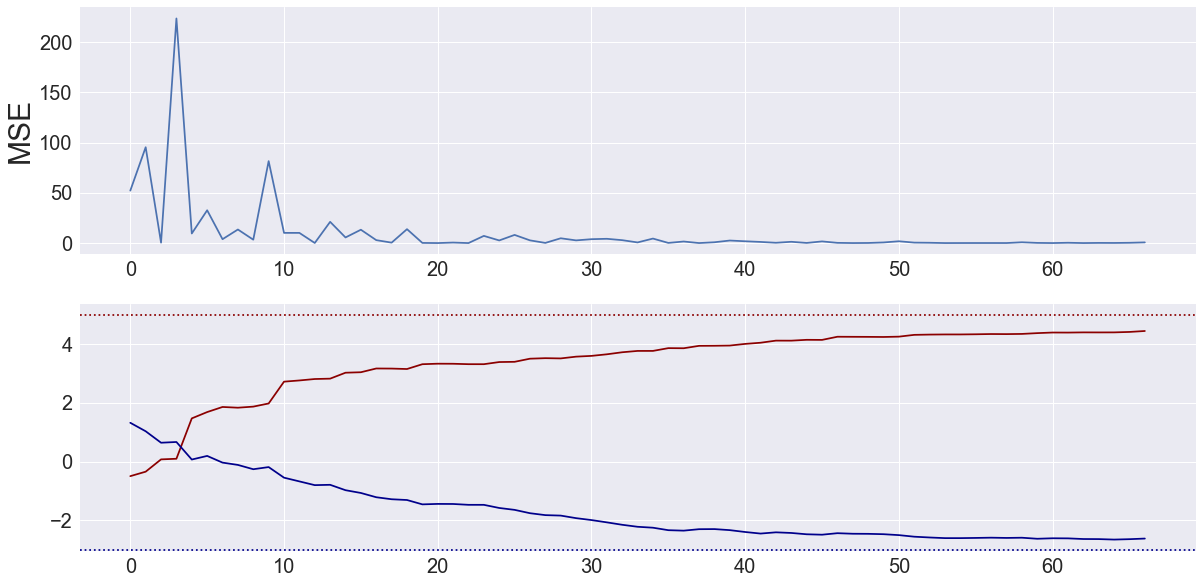

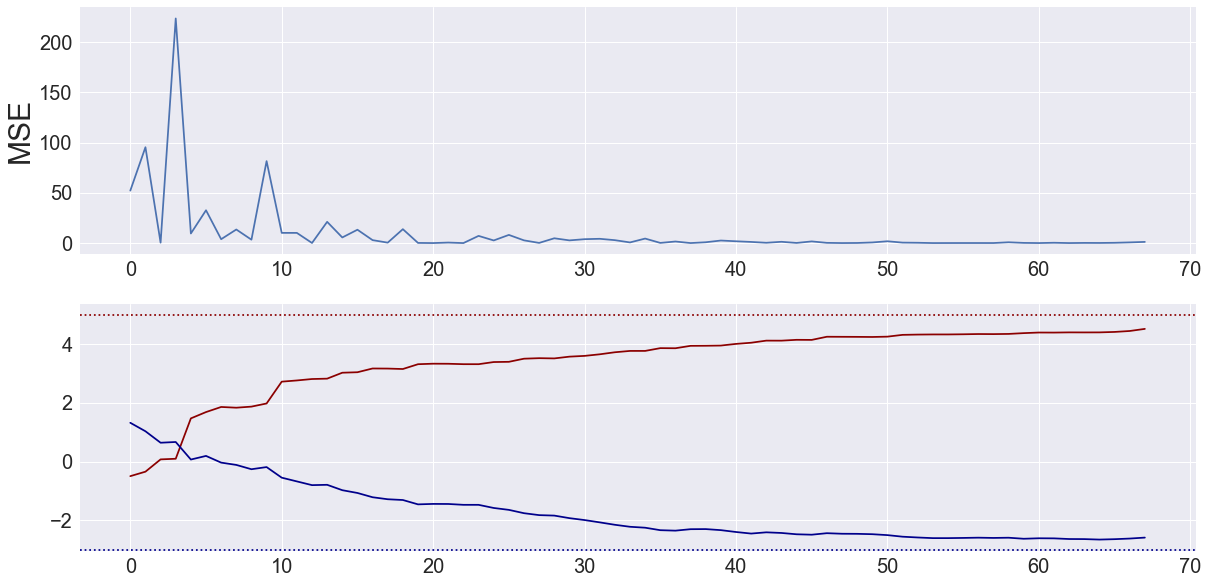

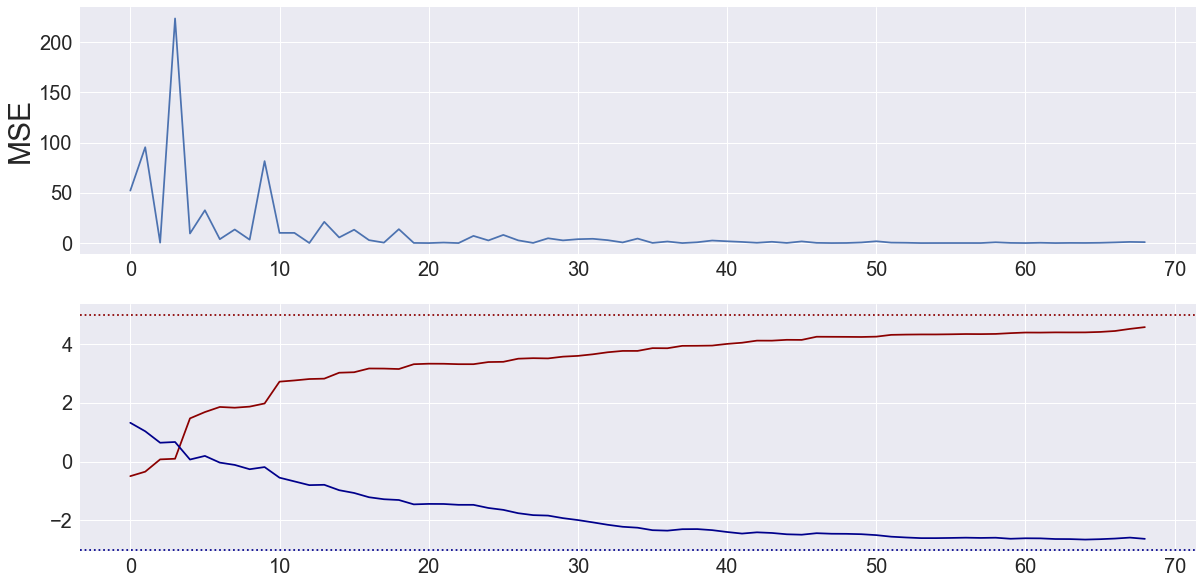

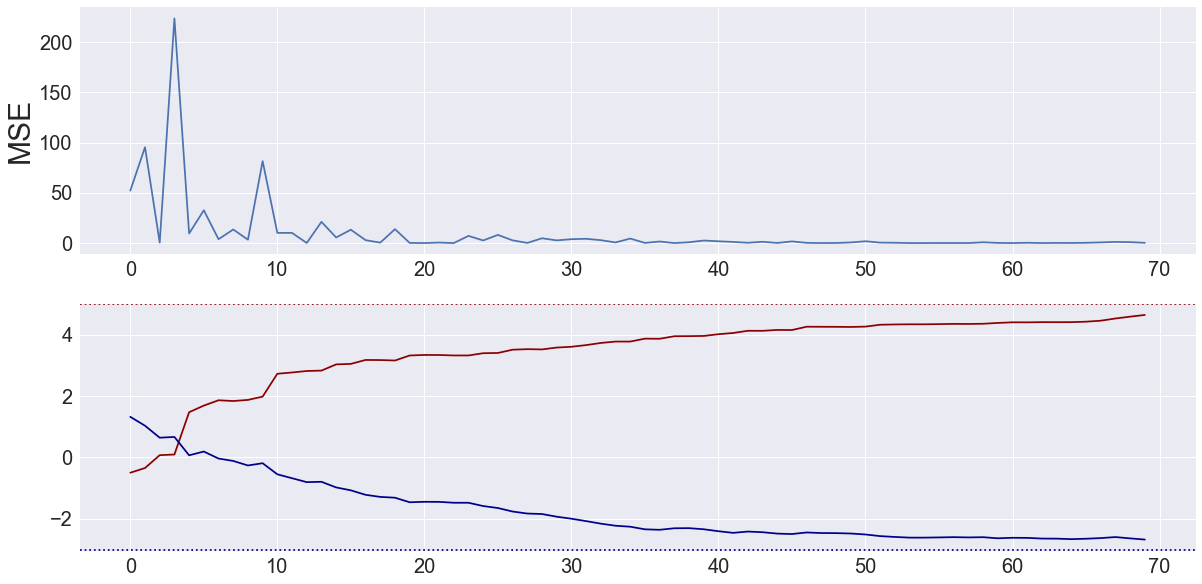

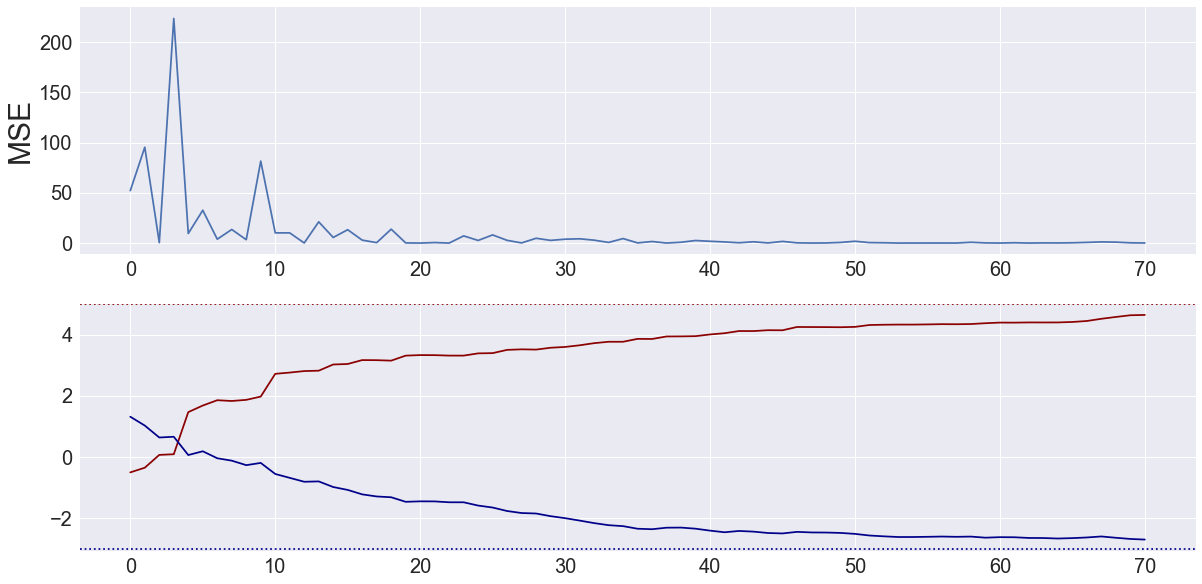

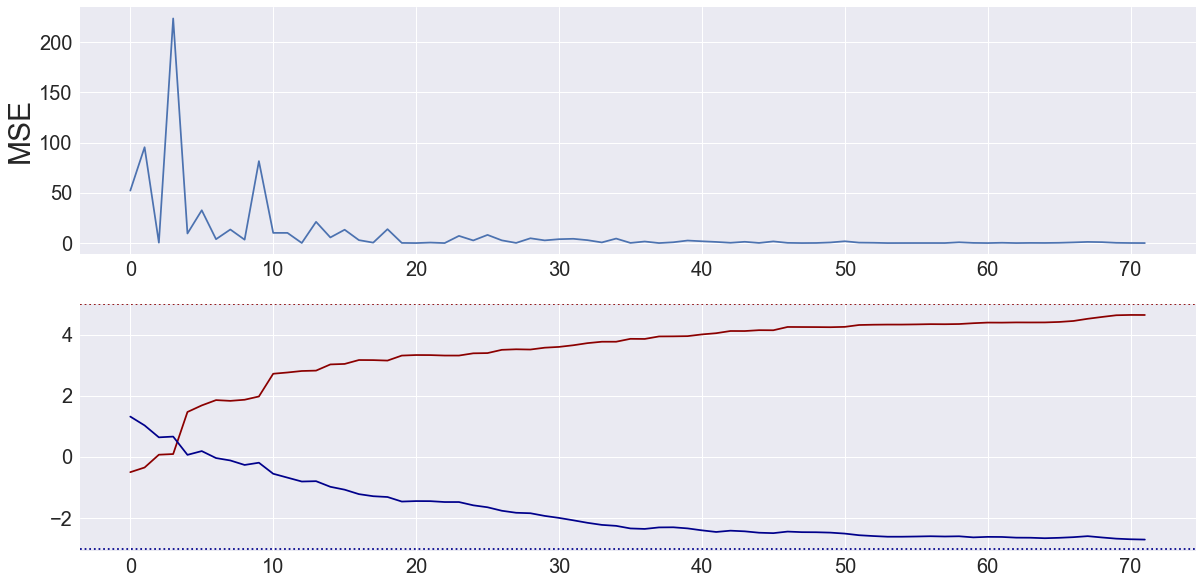

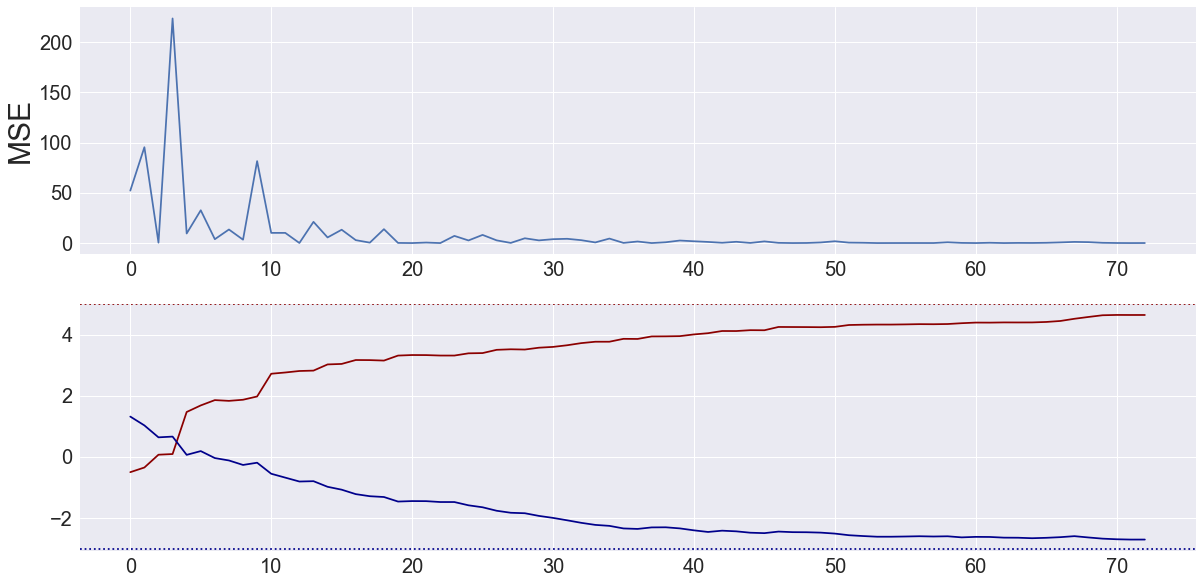

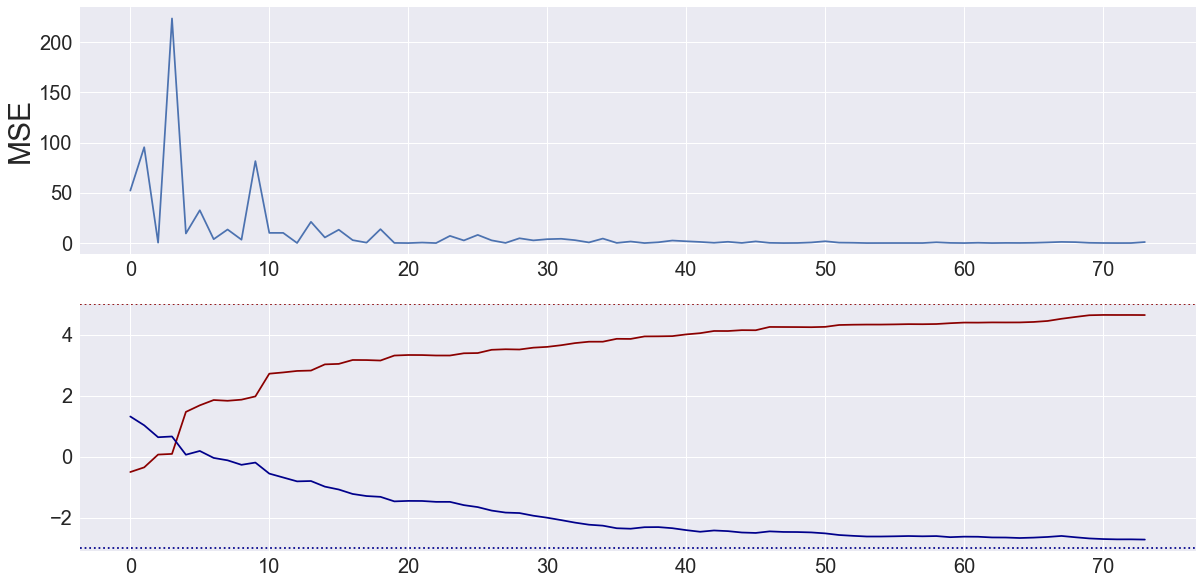

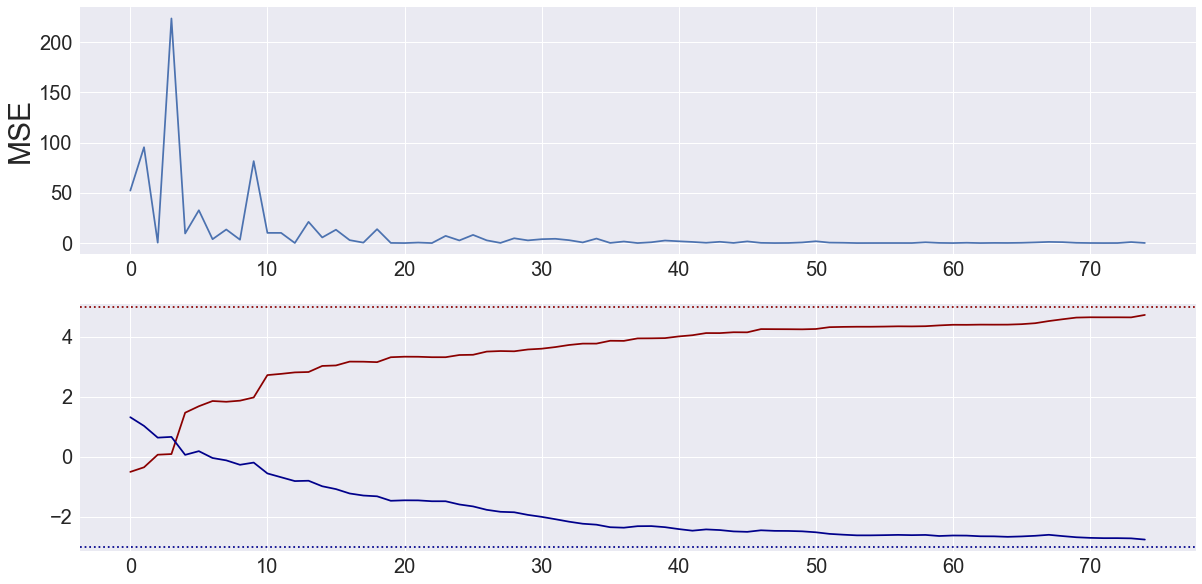

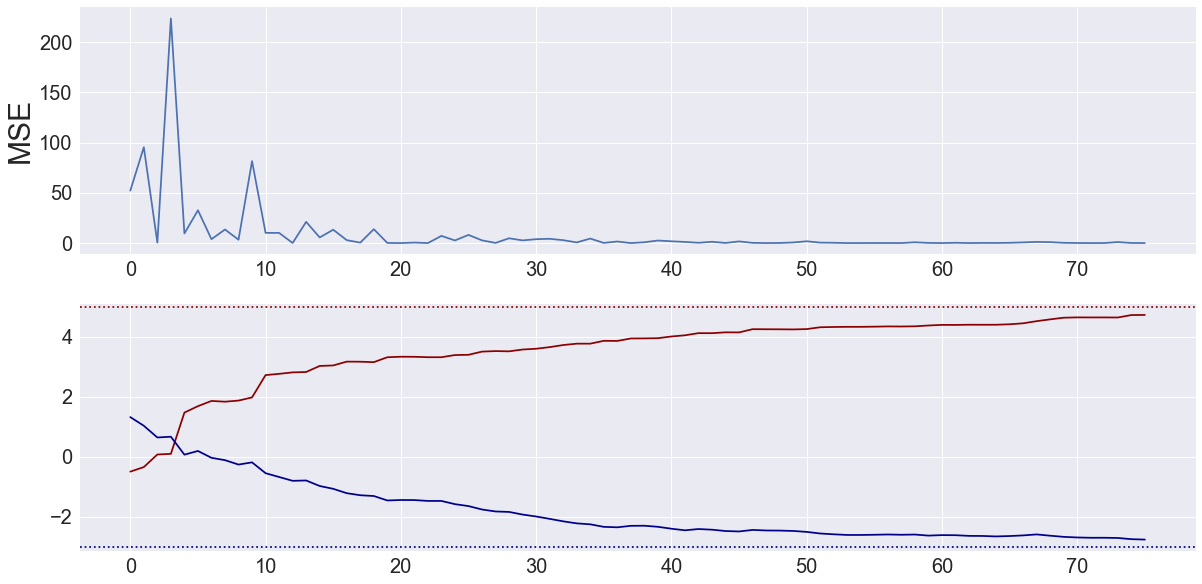

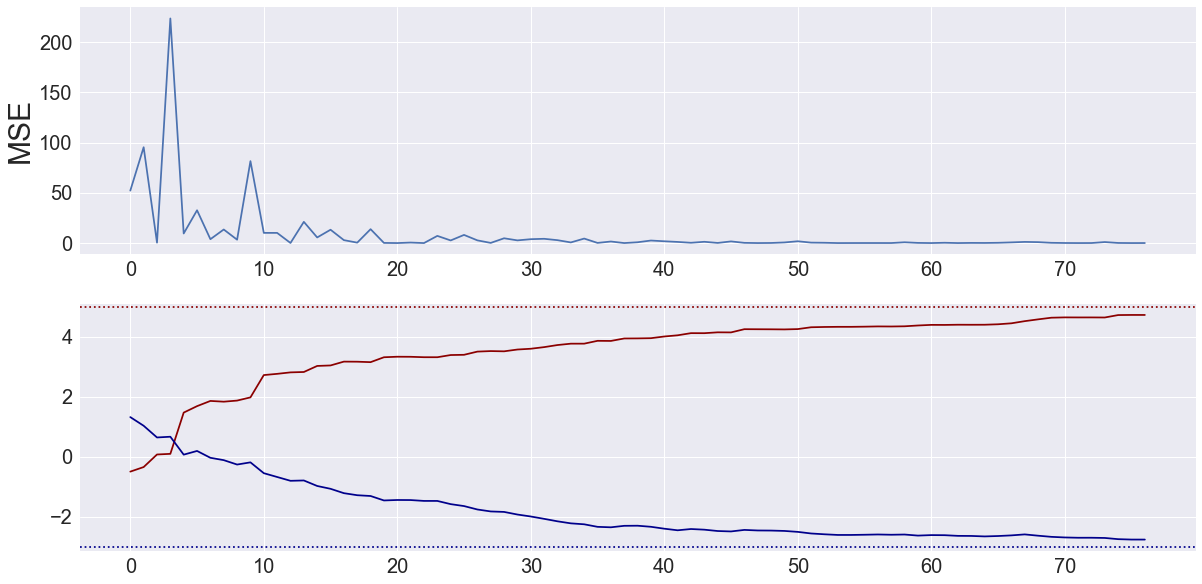

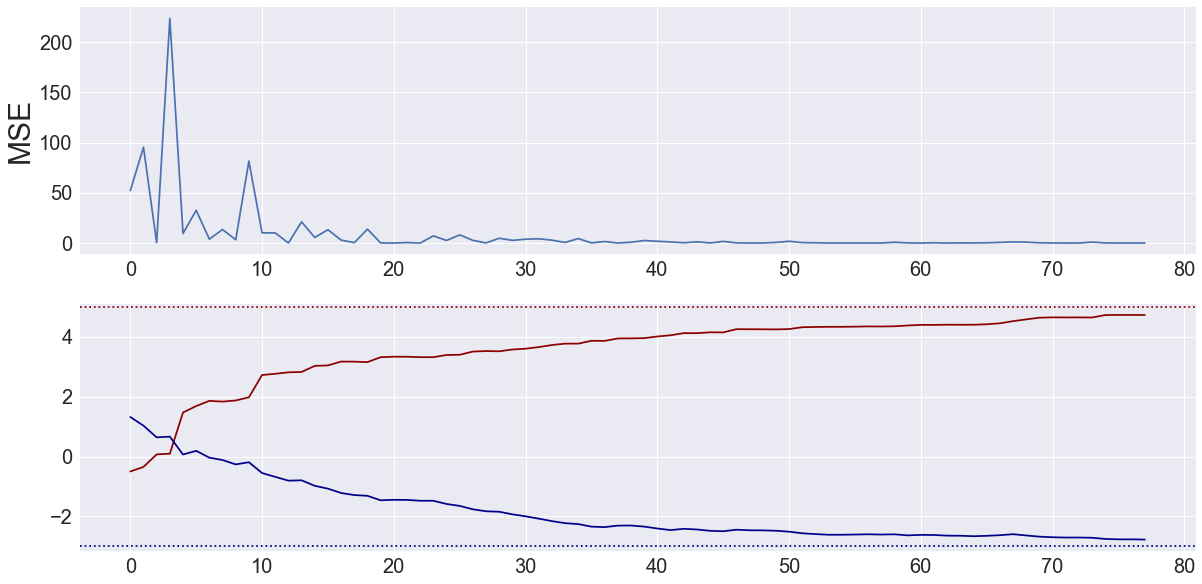

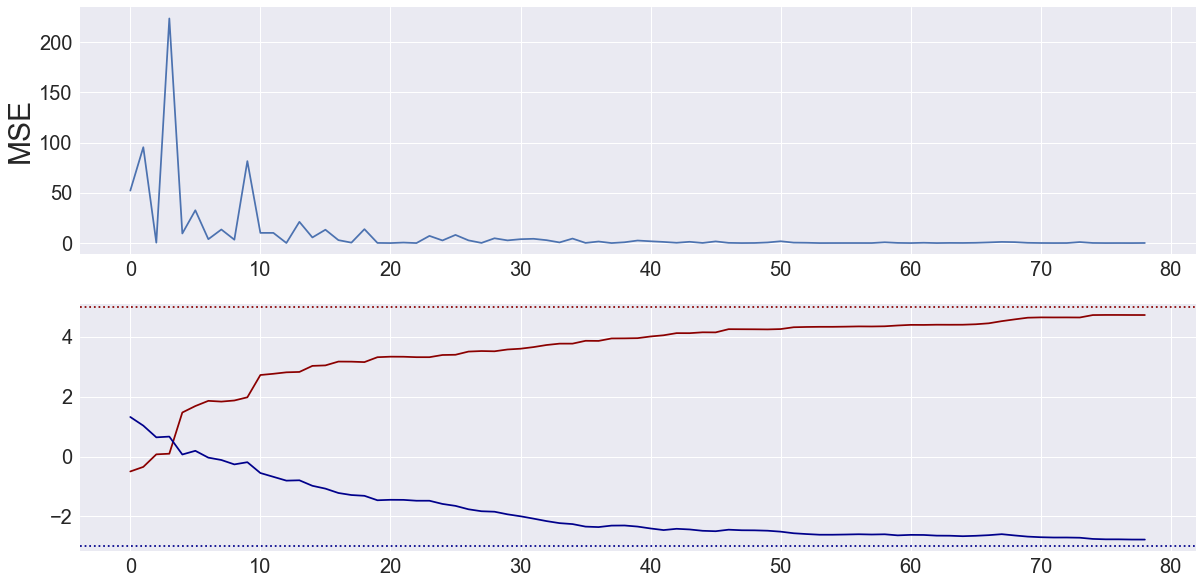

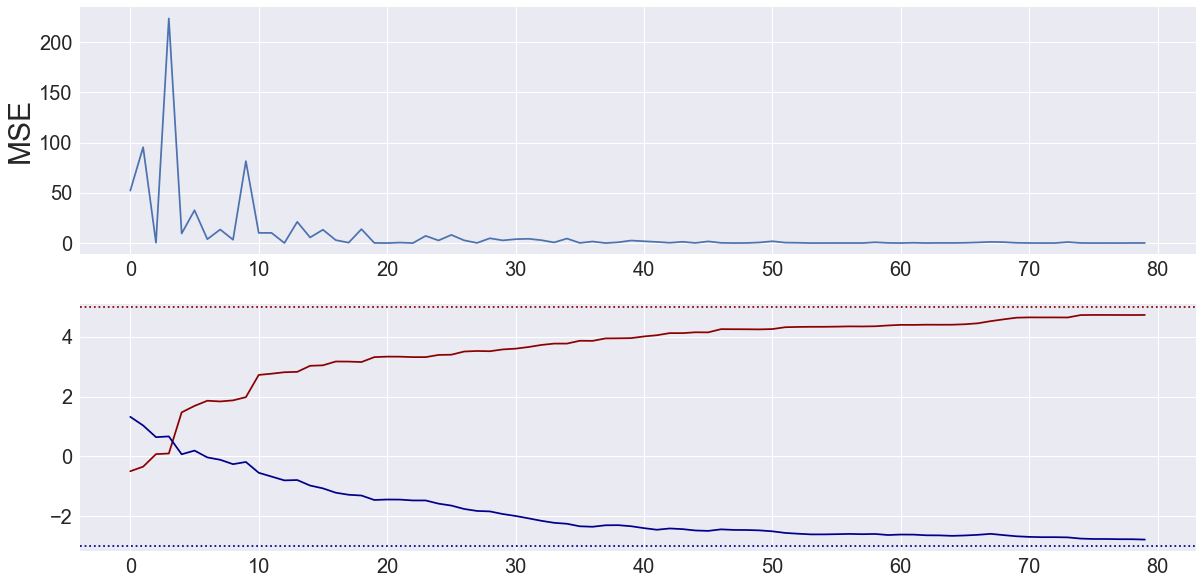

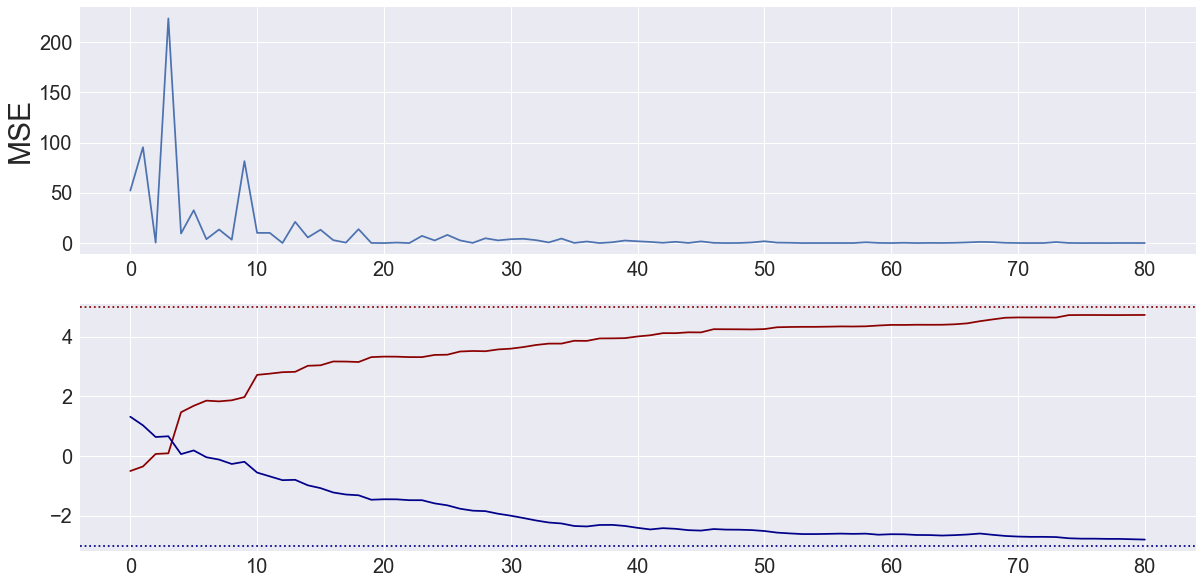

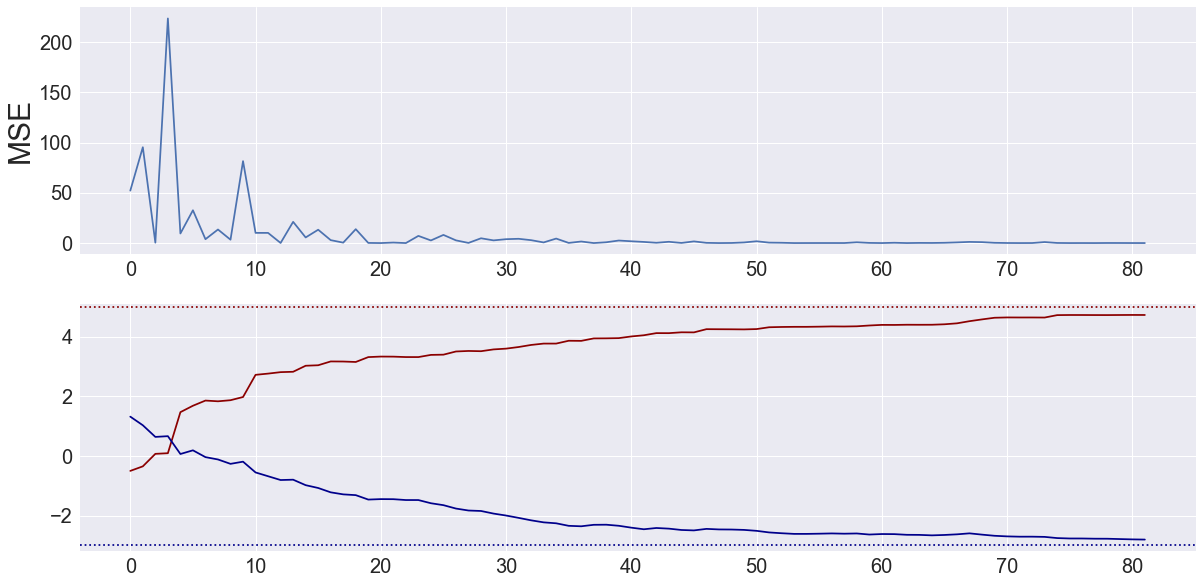

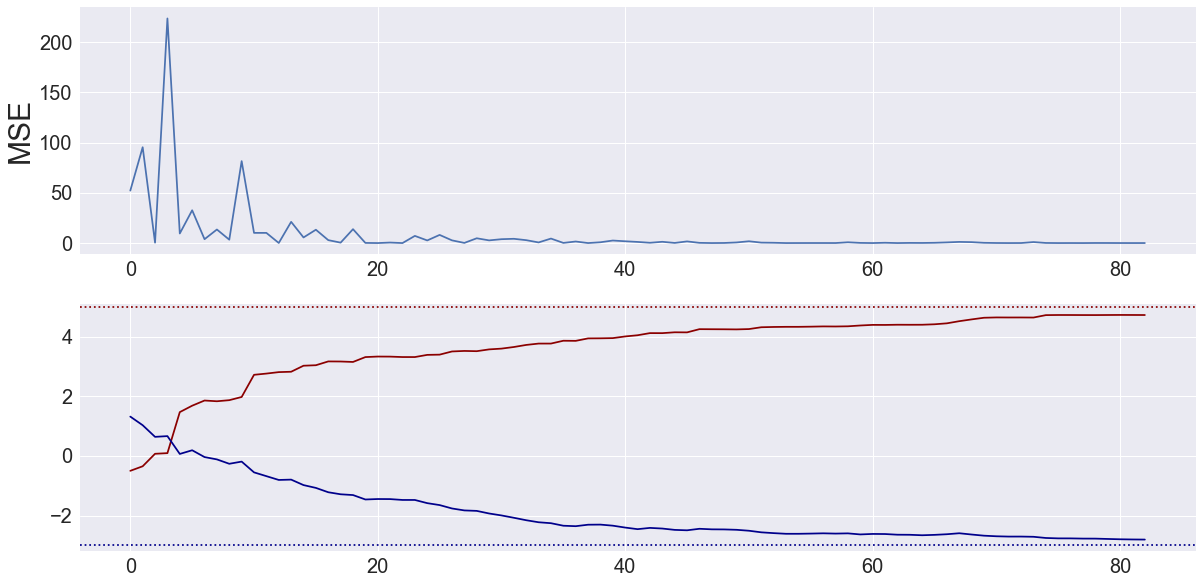

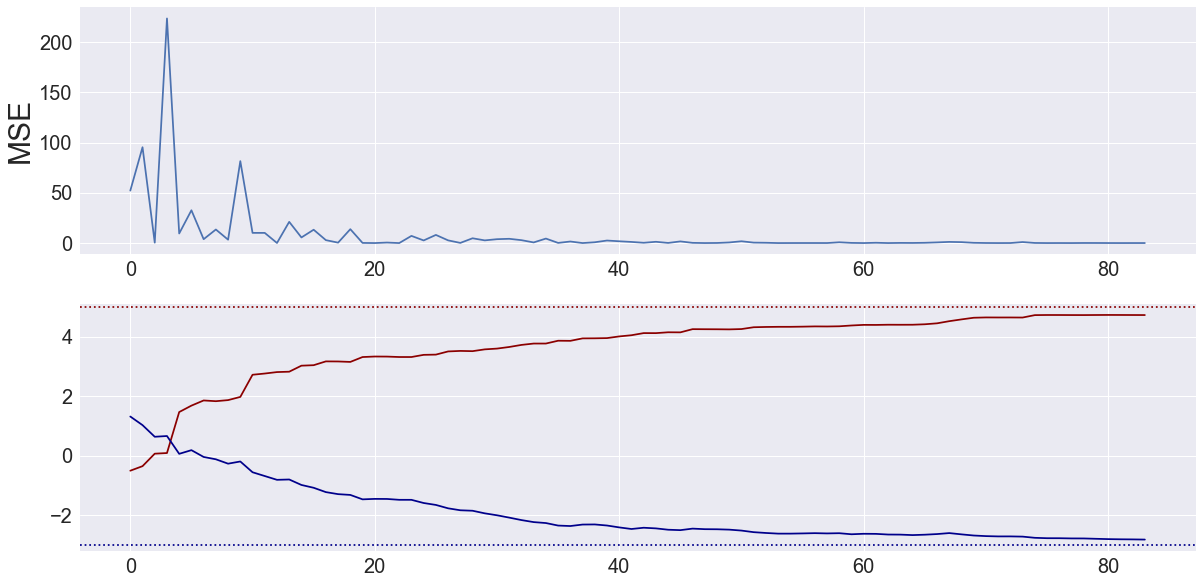

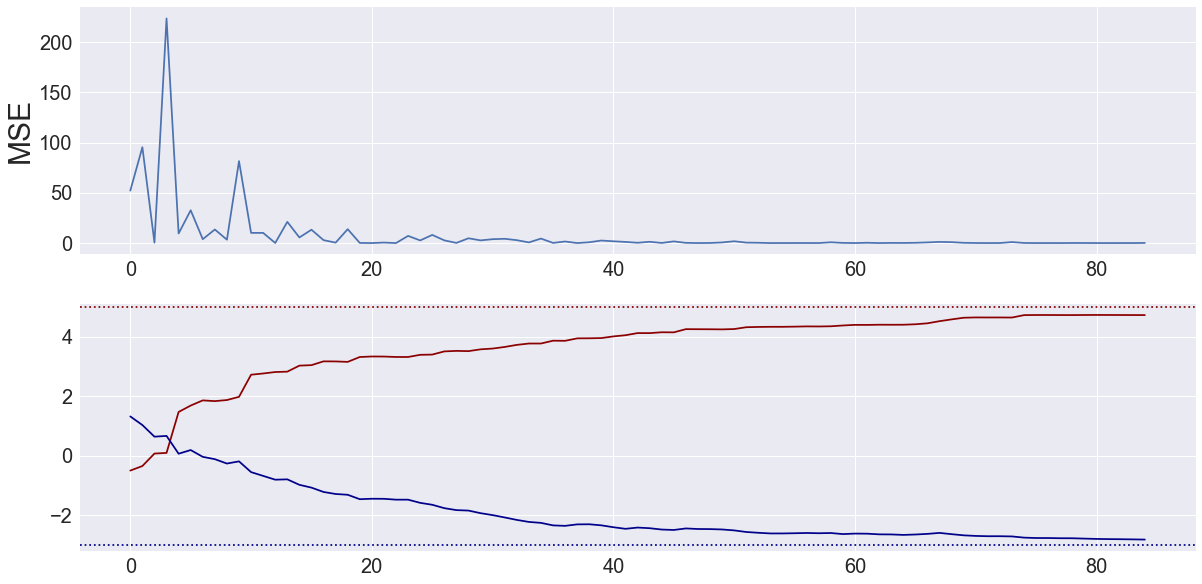

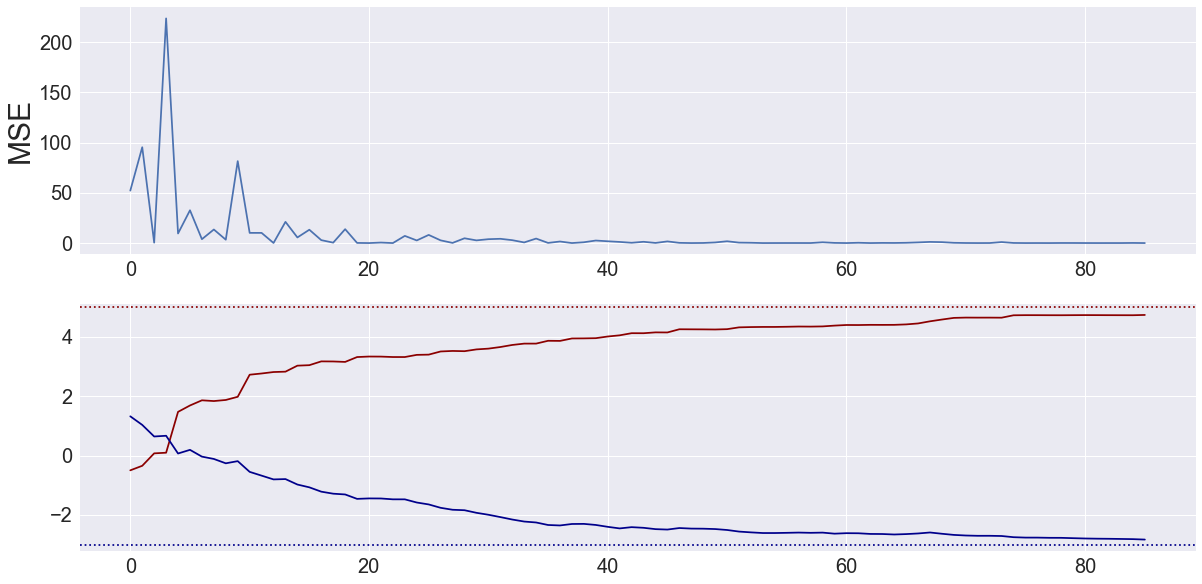

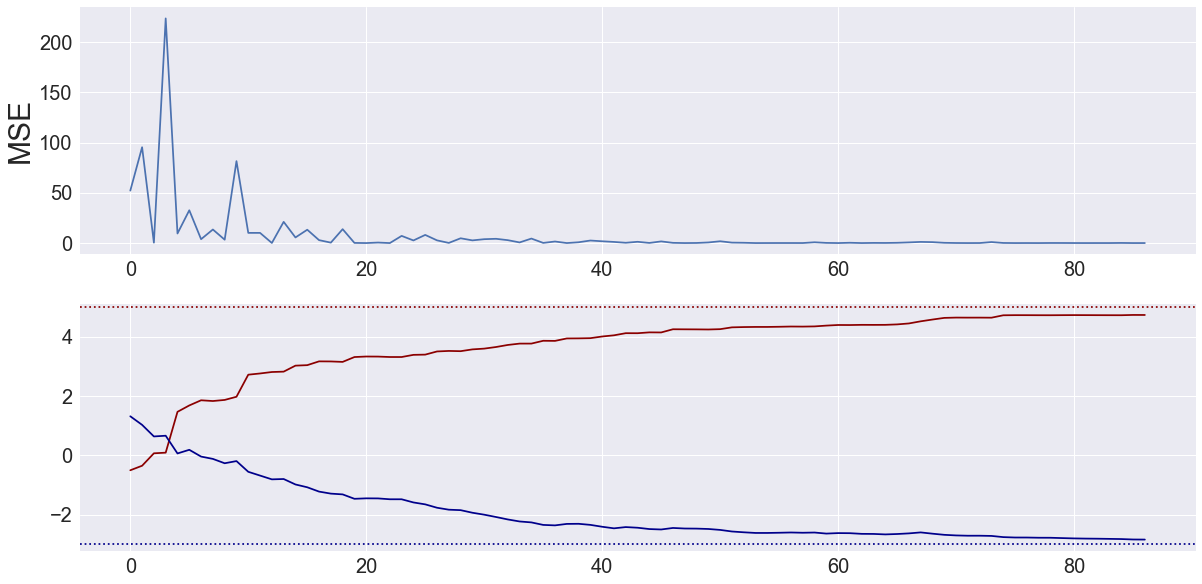

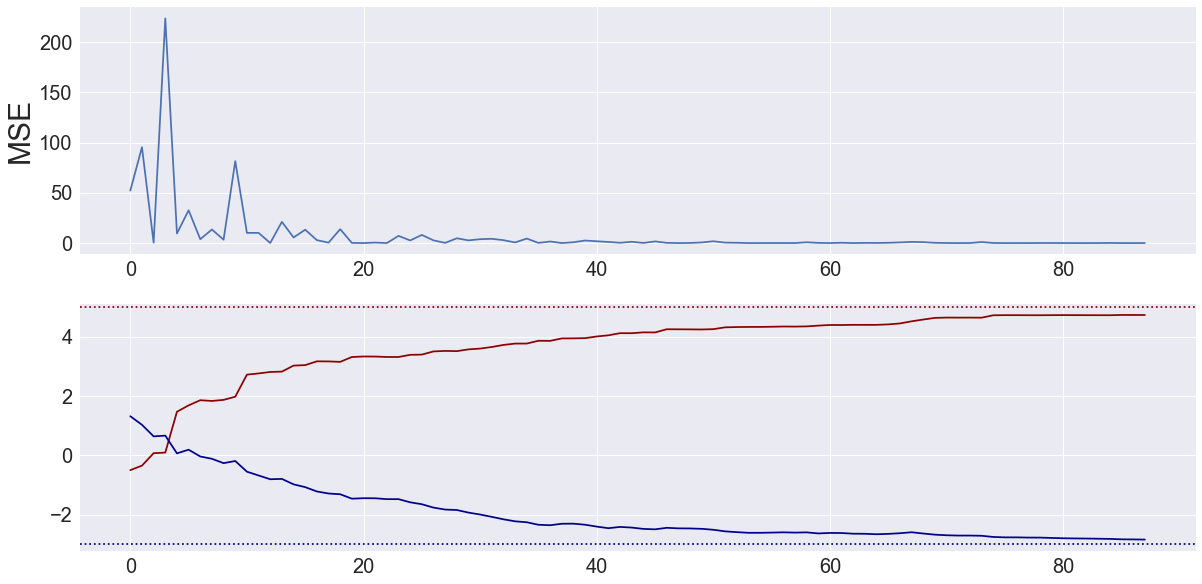

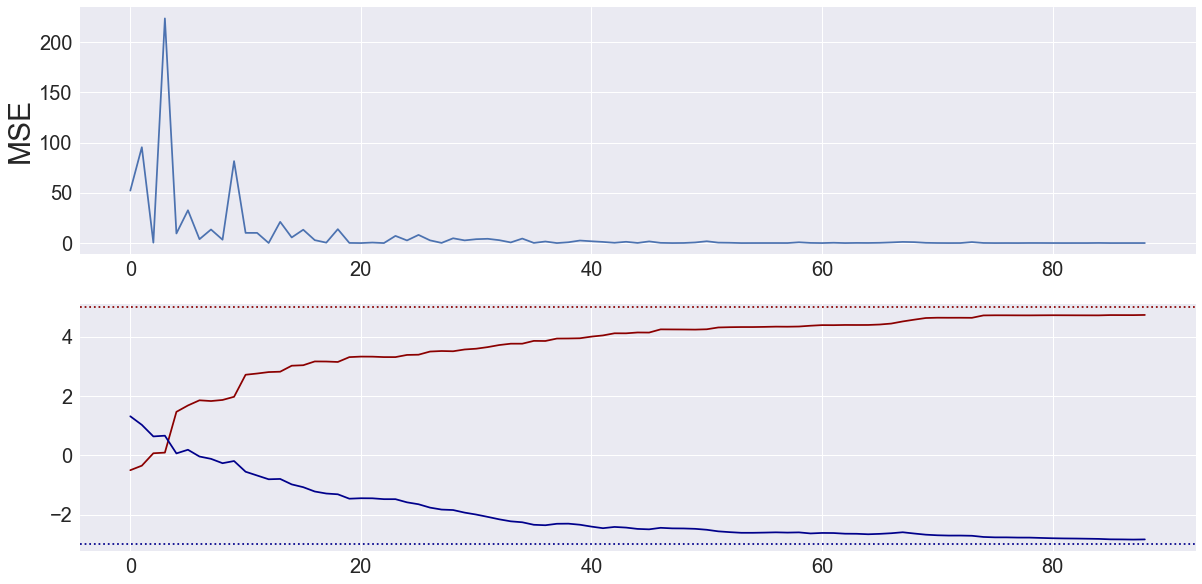

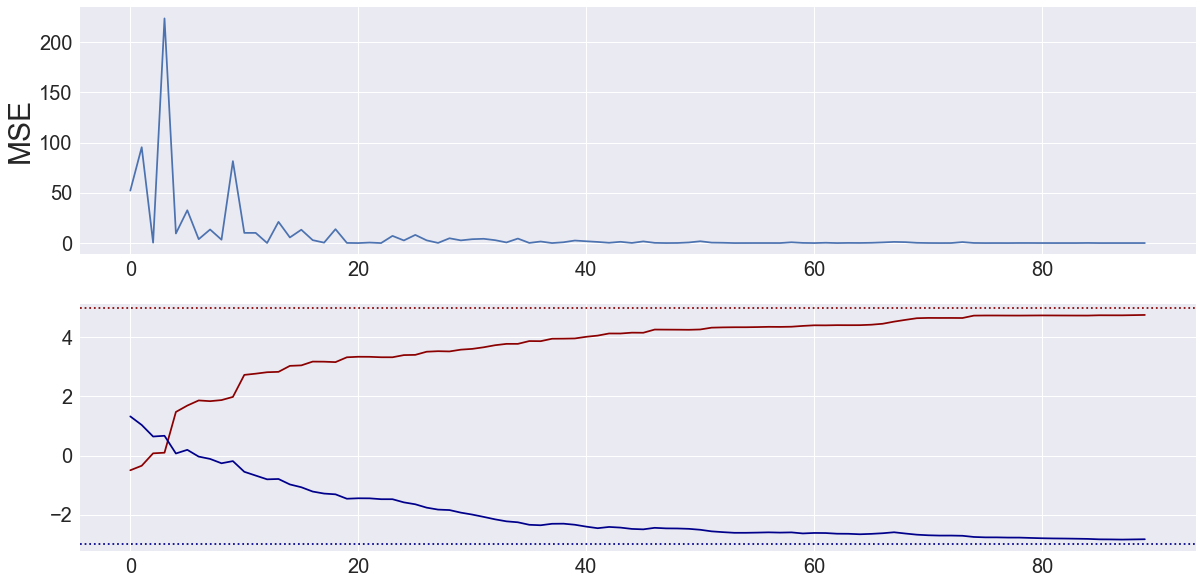

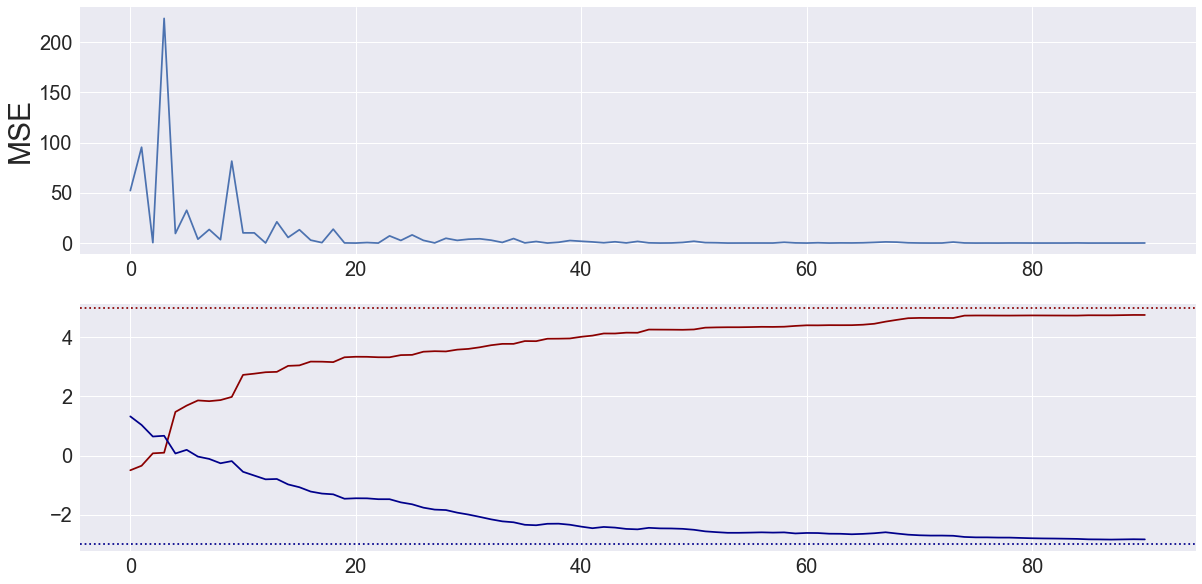

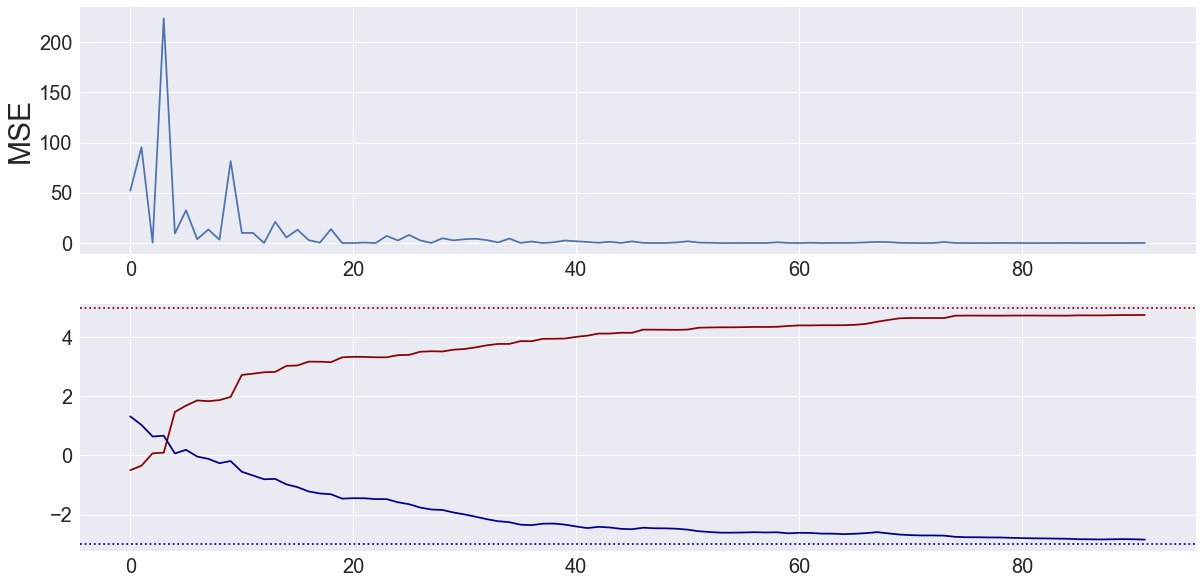

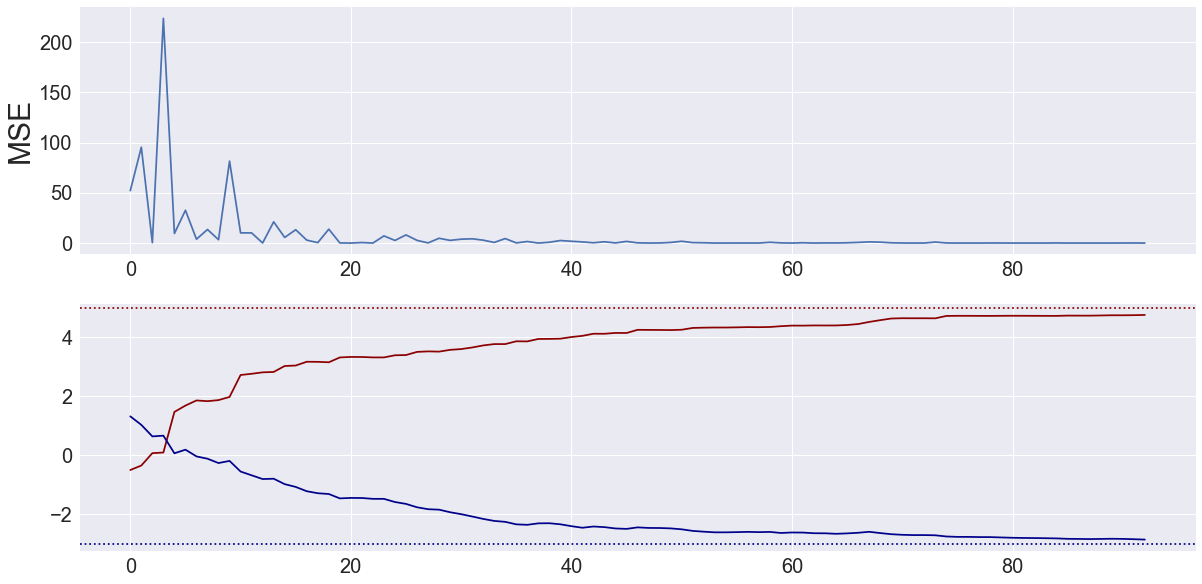

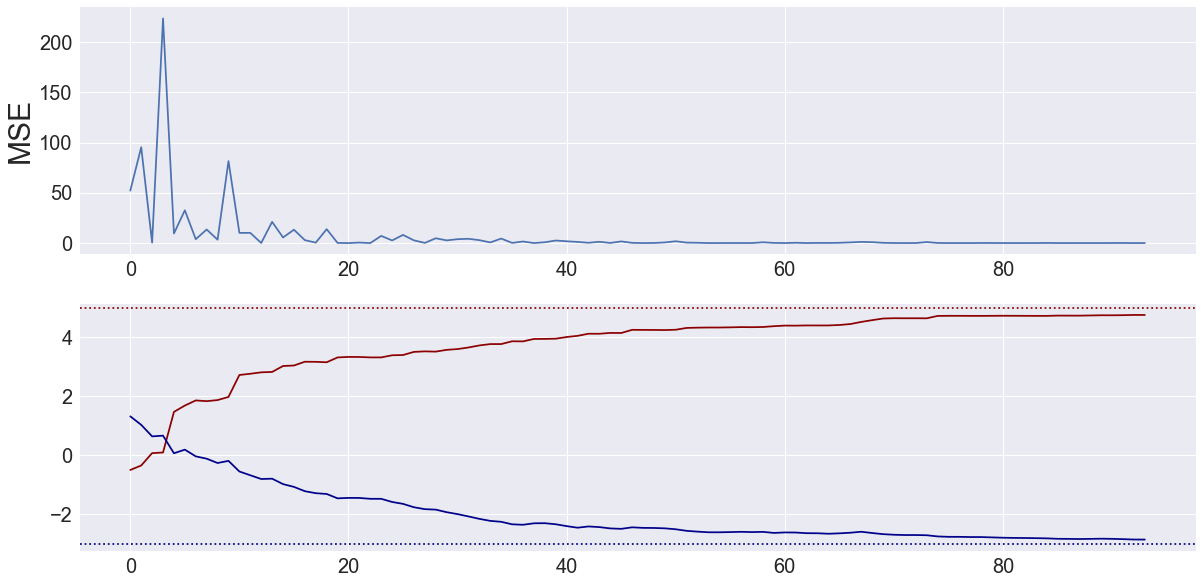

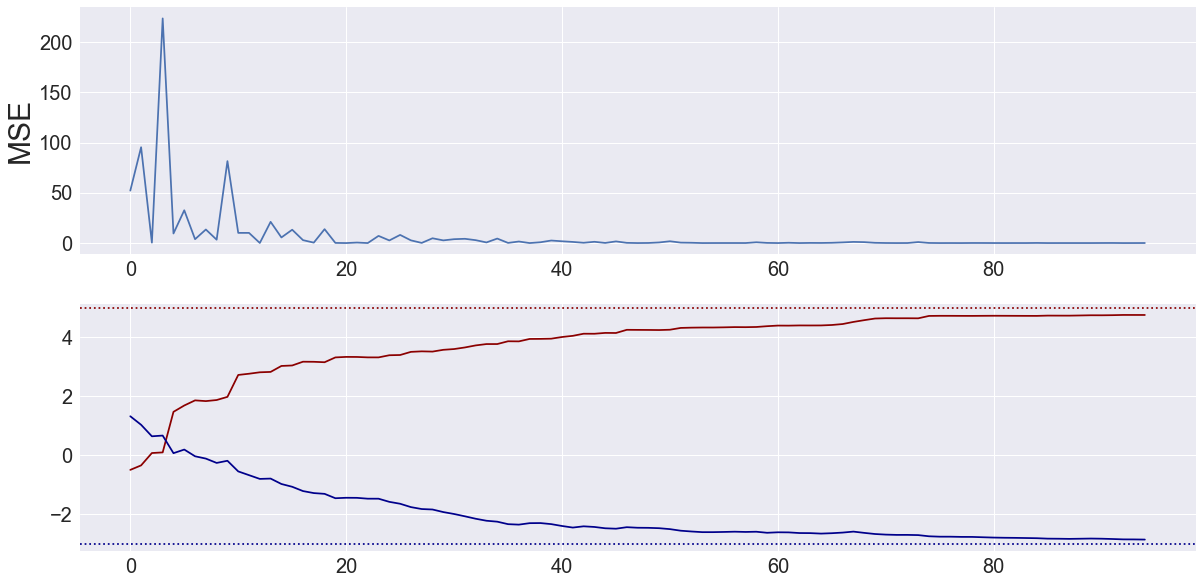

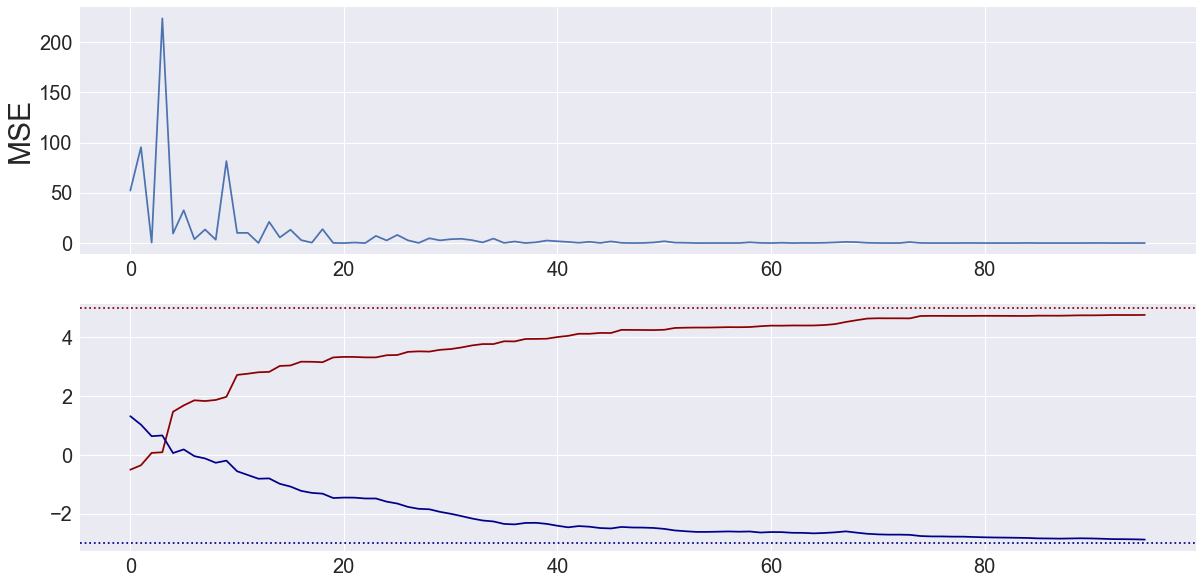

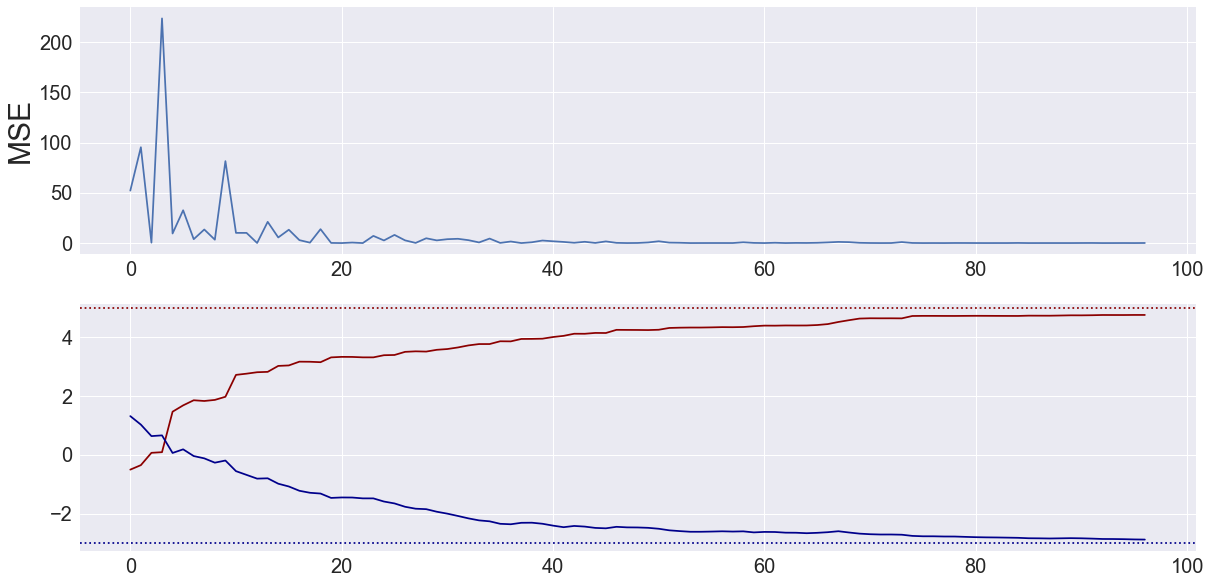

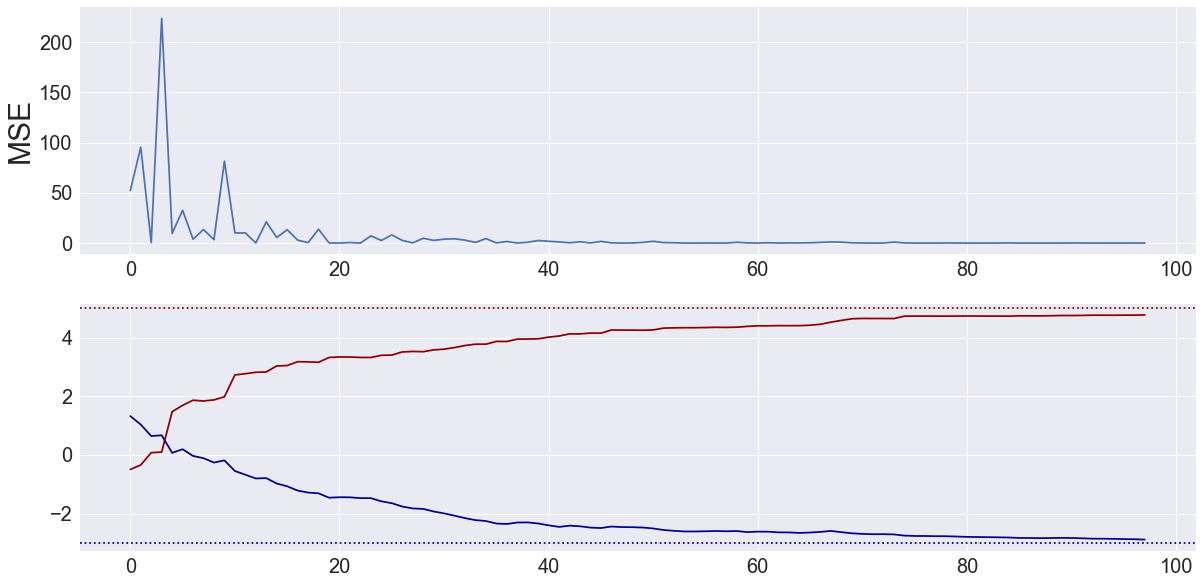

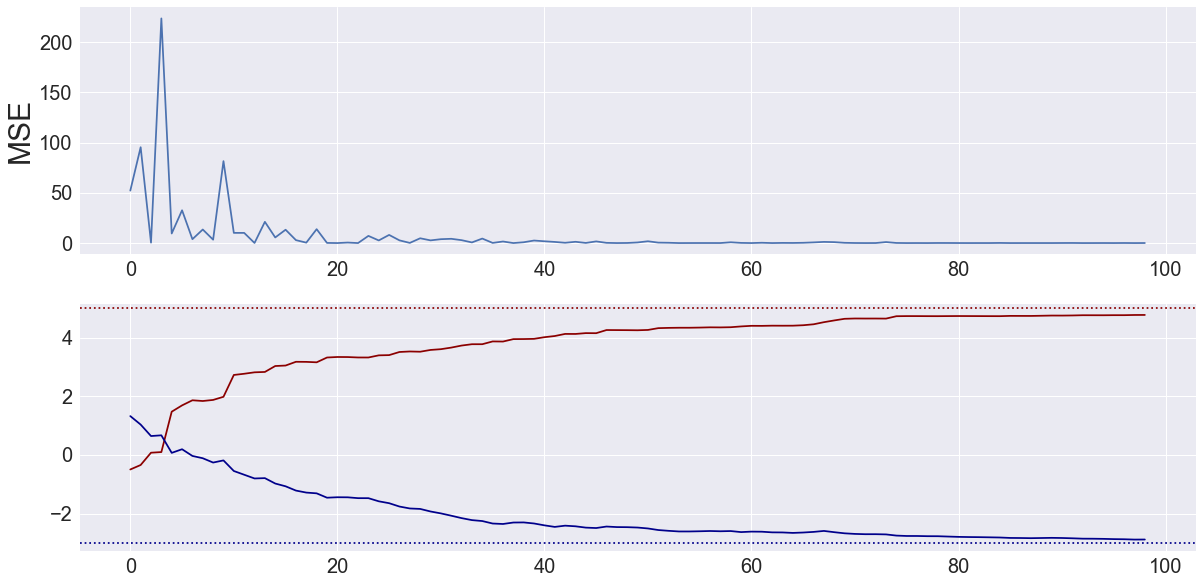

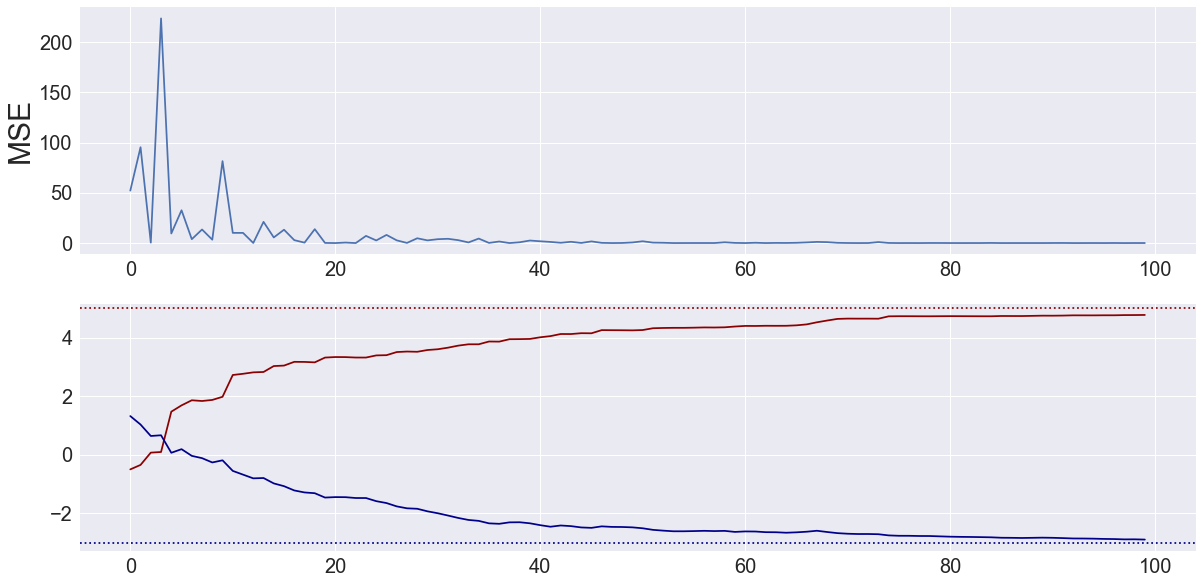

In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data = 100
lr = 0.01
t_w, t_b = 5, -3
w, b = np.random.uniform(-3, 3, 2) # initial weight, bias

# generate dataset
x_data = np.random.randn(n_data, )
y_data = t_w*x_data + t_b
# y_data = t_w*x_data + t_b + np.random.randn(n_data, )

# visualize dataset
cmap = plt.get_cmap('rainbow', lut=n_data)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)

ax.set_xlabel('X Data', fontsize=30)
ax.set_ylabel('Y Data', fontsize=30)
ax.tick_params(labelsize=20)

# set x range for visualization of model
x_range = np.array([x_data.min(), x_data.max()])

# train model and visualize updated model
J_track = list()
w_track, b_track = list(), list()
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)

    # visualize updated model
    y_range = w*x_range + b
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.5)

    # loss calculation
    pred = x*w + b
    J = (y - pred)**2
    J_track.append(J)

    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dw = x
    dpred_db = 1

    # backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    w = w - 2*lr*dJ_dw
    b = b - 2*lr*dJ_db

    # visualize loss
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    axes[0].plot(J_track)
    axes[1].plot(w_track, color='darkred')
    axes[1].plot(b_track, color='darkblue')

    axes[0].set_ylabel('MSE', fontsize=30)
    axes[0].tick_params(labelsize=20)

    axes[1].axhline(y=t_w, color='darkred', linestyle=':')
    axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
    axes[1].tick_params(labelsize=20)

MSE

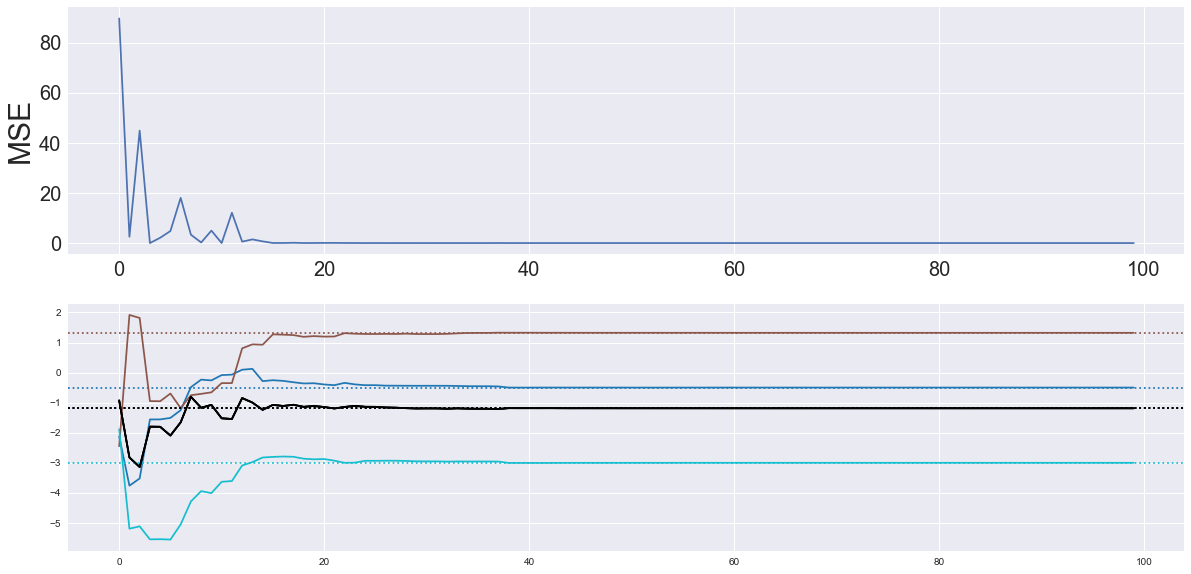

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data, n_feature = 100, 3
lr = 0.1
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, ))

# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b

J_track = list()
W_track, B_track = list(), list()

J_track = list()
W_track, b_track = list(), list()
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)

    # forward propagation
    pred = X @ W + b
    J = (y - pred)**2
    J_track.append(J)

    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dW = X.reshape(1, -1)
    dpred_b = 1

    # backpropagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db

    # paramter update
    # print(W.shape, dJ_dW.shape)
    # print(b.shape, dJ_db.shape)
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)


# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('tab10', lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
    axes[1].plot(w, color=cmap(w_idx))
    axes[1].axhline(y=t_b, color='black', linestyle=':')
    axes[1].plot(b_track, color='black')
    axes[0].tick_params(labelsize=20)



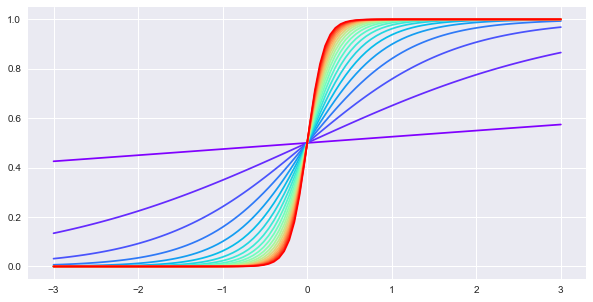

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
x = np.linspace(-3, 3, 100)

n_w = 20
w = 1
w_list = np.linspace(0.1, 10, n_w)
cmap = cm.get_cmap('rainbow', lut=n_w)

fig, ax = plt.subplots(figsize=(10, 5))
for w_idx, w in enumerate(w_list):
    z = x*w
    sigmoid = 1 / (1 + np.exp(-z))

    ax.plot(x, sigmoid, color=cmap(w_idx))


Logistic Regression (1 Feature)

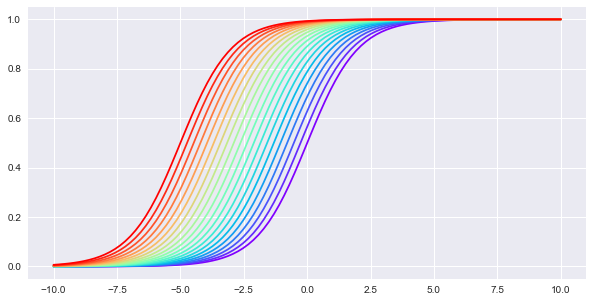

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
x = np.linspace(-10, 10, 100)

n_b =20
w = 1
b_list = np.linspace(0, 5, n_b)
cmap = cm.get_cmap('rainbow', lut=n_w)

fig, ax = plt.subplots(figsize=(10, 5))
for w_idx, b in enumerate(b_list):
    z = x*w + b
    sigmoid = 1 / (1 + np.exp(-z))

    ax.plot(x, sigmoid, color=cmap(w_idx))

Logistic Regression (n Features)

<ipython-input-4-5ebb74bc11eb>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (x_data > db).astype(np.int)


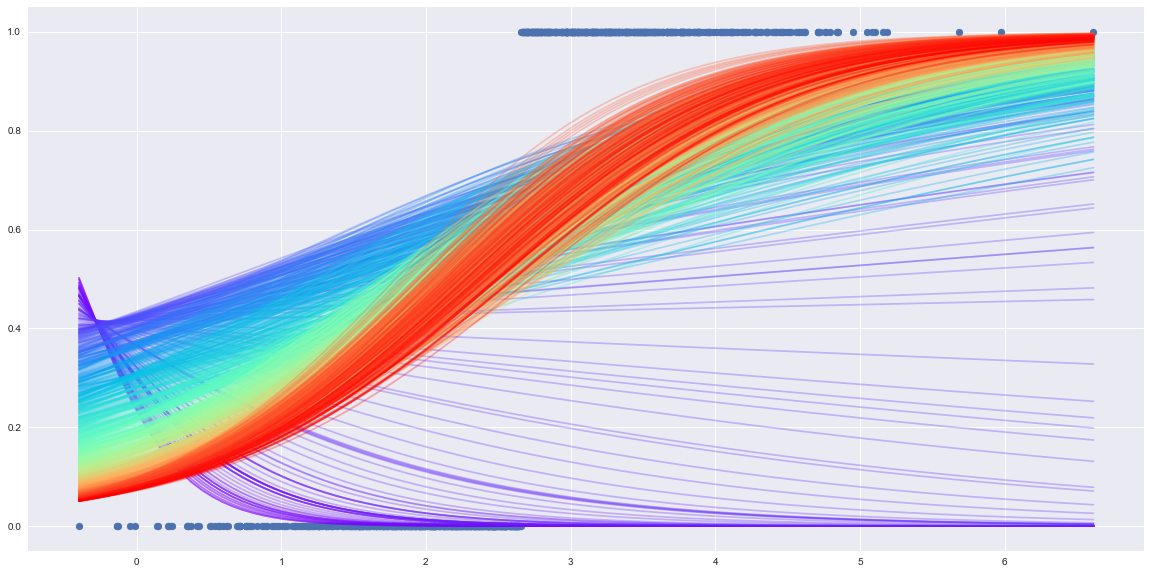

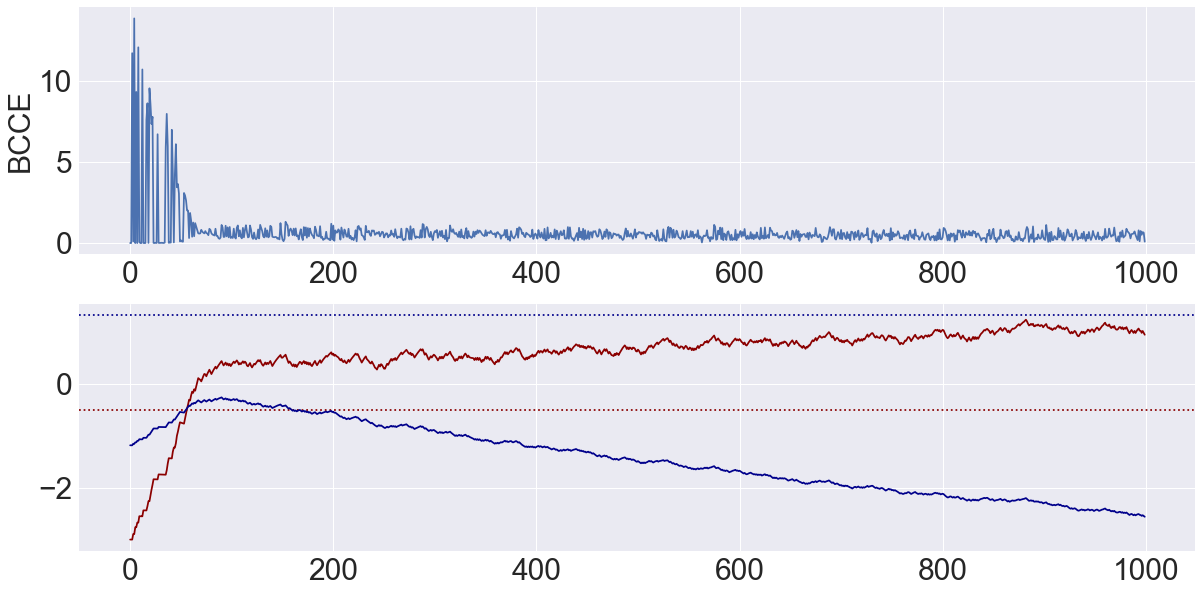

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

# set params
N = 1000
lr =0.03
t_w = np.random.uniform(-3, 3, (1, ))
t_b = np.random.uniform(-3, 3, (1, ))

w = np.random.uniform(-3, 3, (1, ))
b = np.random.uniform(-3, 3, (1, ))

# generate dataset
db = -t_b/t_w
x_data = np.random.normal(db, 1, size=(N, ))
y_data = x_data * t_w + t_b
y_data = (x_data > db).astype(np.int)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_data, y_data)

x_range = np.linspace(x_data.min(), x_data.max(), 100)
cmap = cm.get_cmap('rainbow', lut=N)
J_track = list()
w_track, b_track = list(), list()
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)

    # visualize updated model
    y_range = w*x_range + b
    y_range = 1/(1+ np.exp(-y_range))
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.3)

    #forward propagation
    z = x*w +b
    pred = 1/(1+ np.exp(-z))
    J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
    J_track.append(J)

    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))
    dpred_dz = pred*(1-pred)
    dz_dw = x
    dz_db = 1

    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dw = dJ_dz * dz_dw
    dJ_db = dJ_dz * dz_db
    
    # paramter update
    w = w - lr*dJ_dw
    b = b - lr*dJ_db

# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("BCCE", fontsize=30)
axes[0].tick_params(labelsize=30)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=30)

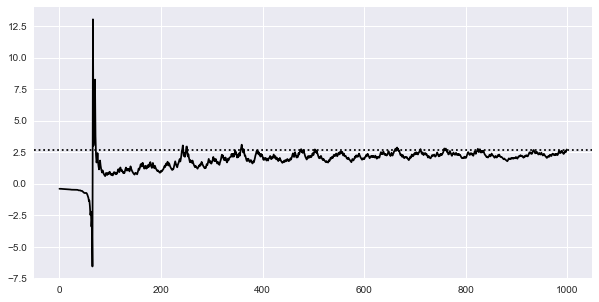

In [10]:
w_track = np.array(w_track)
b_track = np.array(b_track)

db_track = -b_track/w_track
db = -t_b/t_w 

fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(y=db, color='black', linestyle=':')
ax.plot(db_track, color='black')

<ipython-input-28-3a661d1bf24e>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data > 0.5).astype(np.int)
<ipython-input-28-3a661d1bf24e>:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

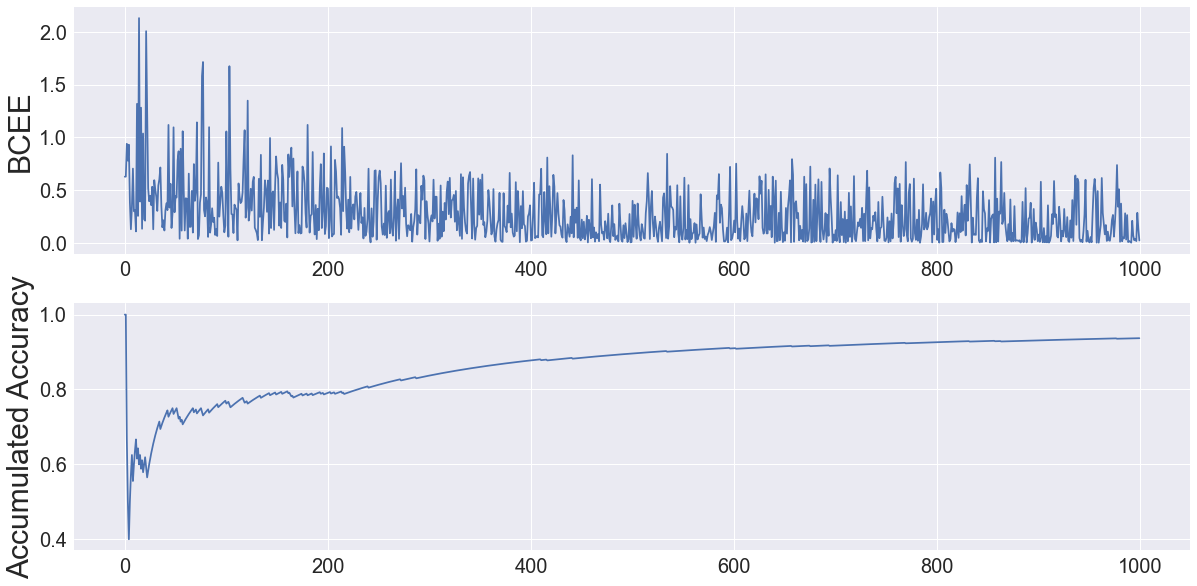

In [28]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data, n_feature = 1000, 3
lr = 0.03
t_W = np.random.uniform(-1, 1, (n_feature, 1)) # target weights
t_b = np.random.uniform(-1, 1, (1, )) # target bias
W = np.random.uniform(-1, 1, (n_feature, 1)) # initial weights
b = np.random.uniform(-1, 1, (1, )) # initial biass

# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1/(1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(np.int)
J_track, acc_track = list(), list()
n_correct = 0
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    # forward propagation
    z = X @ W + b
    pred = 1/(1+np.exp(-z))
    J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
    J_track.append(J.squeeze())

    # calculate accumulated accuracy
    pred_ = (pred > 0.5).astype(np.int)
    if pred_ == y:
        n_correct += 1
    acc_track.append(n_correct/(data_idx + 1))

    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))
    dpred_dz = pred*(1-pred)
    dz_dW = X.reshape(1, -1)
    dz_db = 1

    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dW = dJ_dz * dz_dW
    dJ_db = dJ_dz * dz_db

    # train model
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db

# visualize result
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel('BCEE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy', fontsize=30)
axes[1].tick_params(labelsize=20)